# Prédiction du prix d'une voiture en fonction de ses caractéristiques

## Problèmatique

Le projet consiste à obtenir un modèle capable de prédire le prix d'une voiture en fonction de ses caractéristiques.<br />

## Les données

Les données utilisées pour ce projet proviennent d'un dataset trouvé sur Kaggle.<br />
Source : https://www.kaggle.com/datasets/imgowthamg/car-price<br />
Le dataset a été téléchargé à la main au préalable, puis déposé dans le dossier resources.

## Modules

In [1]:
import nnz

w = nnz.Workspace()

## Analyse des données

In [38]:
w.clear_datasets()
w.add_dataset("cars", "./resources/CarPrice_Assignment.csv", t="csv")
data = w.get_dataset("cars")

#### Structure du dataset

In [39]:
data.getCountRowColumns()

{'rows': 205, 'columns': 26}

<div class="alert alert-info" >On constate que le dataset est composé de <b>205</b> observations et de <b>26</b> variables
</div>

#### Types des variables

In [4]:
data.getTypesVariables(type="count")

object     10
int64       8
float64     8
Name: count, dtype: int64

In [5]:
data.getTypesVariables(type="all")

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

<div class="alert alert-info" >On constate que le dataset est composé de :<br />
    - <b>10</b> variables qualitatives <br />
    - <b>16</b> variables quantitatives
</div>

#### Les valeurs manquantes

In [6]:
data.getRatioMissingValues(show_heatmap=False)

ratio  sum
car_ID              0.0    0
symboling           0.0    0
highwaympg          0.0    0
citympg             0.0    0
peakrpm             0.0    0
horsepower          0.0    0
compressionratio    0.0    0
stroke              0.0    0
boreratio           0.0    0
fuelsystem          0.0    0
enginesize          0.0    0
cylindernumber      0.0    0
enginetype          0.0    0
curbweight          0.0    0
carheight           0.0    0
carwidth            0.0    0
carlength           0.0    0
wheelbase           0.0    0
enginelocation      0.0    0
drivewheel          0.0    0
carbody             0.0    0
doornumber          0.0    0
aspiration          0.0    0
fueltype            0.0    0
CarName             0.0    0
price               0.0    0

<div class="alert alert-info" >On constate que le dataset ne comporte pas de valeur manquante.
</div>

#### Définitions des variables


- **car_ID** = Correspond à l'identifiant unique du véhicule<br />
- **symboling** = Correspond au niveau de risque d'assurance d'une voiture. 3 = Très risqué, -3 = Quasi aucun risque.<br />
- **CarName** = Correspond au nom du véhicule<br />
- **fueltype** = Correspond au type de carburant utilisé par le véhicule<br />
- **aspiration** = Correspond au type d'aspiration du véhicule<br />
- **doornumber** = Correspond au nombre de porte que possède le véhicule<br />
- **carbody** = Correspond au type de toit que possède la carrosserie de la voiture<br />
- **drivewheel** = Correspond au type de roue motrice du véhicule<br />
- **enginelocation** = Correspond à la position du moteur dans le véhicule<br />
- **wheelbase** = Correspond à l'empattement du véhicule<br />
- **carlength** = Correspond à la longueur du véhicule<br />
- **carwidth** = Correspond à la largeur du véhicule<br />
- **carheight** = Correspond à la hauteur du véhicule<br />
- **curbweight** = Correspond au poids à vide du véhicule<br />
- **enginetype** = Correspond au type de moteur<br />
- **cylindernumber** = Correspond au nombre de cyclindre du moteur de la voiture<br />
- **enginesize** = Correspond à la taille du moteur<br />
- **fuelsystem** = Correspond au systeme de carburant<br />
- **boreration** = Correspond au rapport d'alésage (largeur du cyclindre)<br />
- **stroke** = Correspond à la distance parcourue par le piston lors de chaque cycle.<br />
- **compressionratio** = Correspond au ratio de compression du piston<br />
- **horsepower** = Correspond à la puissance en cheaveaux<br />
- **peakrpm** = Correspond au régime en tours par minute<br />
- **citympg** = Correspond aux miles par gallon (mpg), est la distance en ville, mesurée en miles, qu'une voiture peut parcourir par gallon de carburant.<br />
- **highwaympg** = Correspond aux miles par gallon (mpg), est la distance sur autoroute, mesurée en miles, qu'une voiture peut parcourir par gallon de carburant.<br />
- **price** = Correspond au price de vente du véhicule.<br />
    <br />

#### Duplication des observations

In [7]:
data.getCountDuplicatedRows()

0

In [8]:
data.showDuplicatedRowByVariable(column=['car_ID'])

<b>Colonne : ['car_ID']</b>

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []




<div class="alert alert-info" >On constate que le dataset ne comporte pas de valeur dupliquée.
</div>

#### Nombre de valeur unique par variable

In [9]:
data.getUniqueValueByVariable()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

#### Description statistique

In [10]:
data.desc()

car_ID   symboling        CarName fueltype aspiration doornumber  \
count   205.000000  205.000000            205      205        205        205   
unique         NaN         NaN            147        2          2          2   
top            NaN         NaN  toyota corona      gas        std       four   
freq           NaN         NaN              6      185        168        115   
mean    103.000000    0.834146            NaN      NaN        NaN        NaN   
std      59.322565    1.245307            NaN      NaN        NaN        NaN   
min       1.000000   -2.000000            NaN      NaN        NaN        NaN   
25%      52.000000    0.000000            NaN      NaN        NaN        NaN   
50%     103.000000    1.000000            NaN      NaN        NaN        NaN   
75%     154.000000    2.000000            NaN      NaN        NaN        NaN   
max     205.000000    3.000000            NaN      NaN        NaN        NaN   

       carbody drivewheel enginelocation   wheelbase   carlength    carwidth  \
count      205        205            205  205.000000  205.000000  205.000000   
unique       5          3              2         NaN         NaN         NaN   
top      sedan        fwd          front         NaN         NaN         NaN   
freq        96        120            202         NaN         NaN         NaN   
mean       NaN        NaN            NaN   98.756585  174.049268   65.907805   
std        NaN        NaN            NaN    6.021776   12.337289    2.145204   
min        NaN        NaN            NaN   86.600000  141.100000   60.300000   
25%        NaN        NaN            NaN   94.500000  166.300000   64.100000   
50%        NaN        NaN            NaN   97.000000  173.200000   65.500000   
75%        NaN        NaN            NaN  102.400000  183.100000   66.900000   
max        NaN        NaN            NaN  120.900000  208.100000   72.300000   

         carheight   curbweight enginetype cylindernumber  enginesize  \
count   205.000000   205.000000        205            205  205.000000   
unique         NaN          NaN          7              7         NaN   
top            NaN          NaN        ohc           four         NaN   
freq           NaN          NaN        148            159         NaN   
mean     53.724878  2555.565854        NaN            NaN  126.907317   
std       2.443522   520.680204        NaN            NaN   41.642693   
min      47.800000  1488.000000        NaN            NaN   61.000000   
25%      52.000000  2145.000000        NaN            NaN   97.000000   
50%      54.100000  2414.000000        NaN            NaN  120.000000   
75%      55.500000  2935.000000        NaN            NaN  141.000000   
max      59.800000  4066.000000        NaN            NaN  326.000000   

       fuelsystem   boreratio      stroke  compressionratio  horsepower  \
count         205  205.000000  205.000000        205.000000  205.000000   
unique          8         NaN         NaN               NaN         NaN   
top          mpfi         NaN         NaN               NaN         NaN   
freq           94         NaN         NaN               NaN         NaN   
mean          NaN    3.329756    3.255415         10.142537  104.117073   
std           NaN    0.270844    0.313597          3.972040   39.544167   
min           NaN    2.540000    2.070000          7.000000   48.000000   
25%           NaN    3.150000    3.110000          8.600000   70.000000   
50%           NaN    3.310000    3.290000          9.000000   95.000000   
75%           NaN    3.580000    3.410000          9.400000  116.000000   
max           NaN    3.940000    4.170000         23.000000  288.000000   

            peakrpm     citympg  highwaympg         price  
count    205.000000  205.000000  205.000000    205.000000  
unique          NaN         NaN         NaN           NaN  
top             NaN         NaN         NaN           NaN  
freq            NaN         NaN         NaN           NaN  
mean    5125

#### Distribution des variables

In [11]:
variable_qualitatives = ["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"]
variable_quantitatives = ["car_ID","symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg"]
target = ["price"]

#### Récupération des modalités pour chaque variable qualitative

In [12]:
data.showAllModalities(columns=variable_qualitatives)

Variable CarName : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk'

<div class="alert alert-info" >On constate que la variable <b>CarName</b> possède beaucoups de modalités.</div>

#### Lexique des modalités

<ul>
    <li><b>enginetype</b>
        <ul>
            <li>dohc : Double Over Head Camshaft, moteur à double arbre à cames en tête</li>
            <li>ohcv : OverHead Camshaft V...</li>
            <li>ohc : OverHead Camshaft, moteur à arbre à cames en tête</li>
            <li>l : LineEngine</li>
            <li>rotor : Wankel engine</li>
            <li>ohcf : ... </li>
            <li>dohcv : ...</li>
        </ul>
    </li>
</ul>

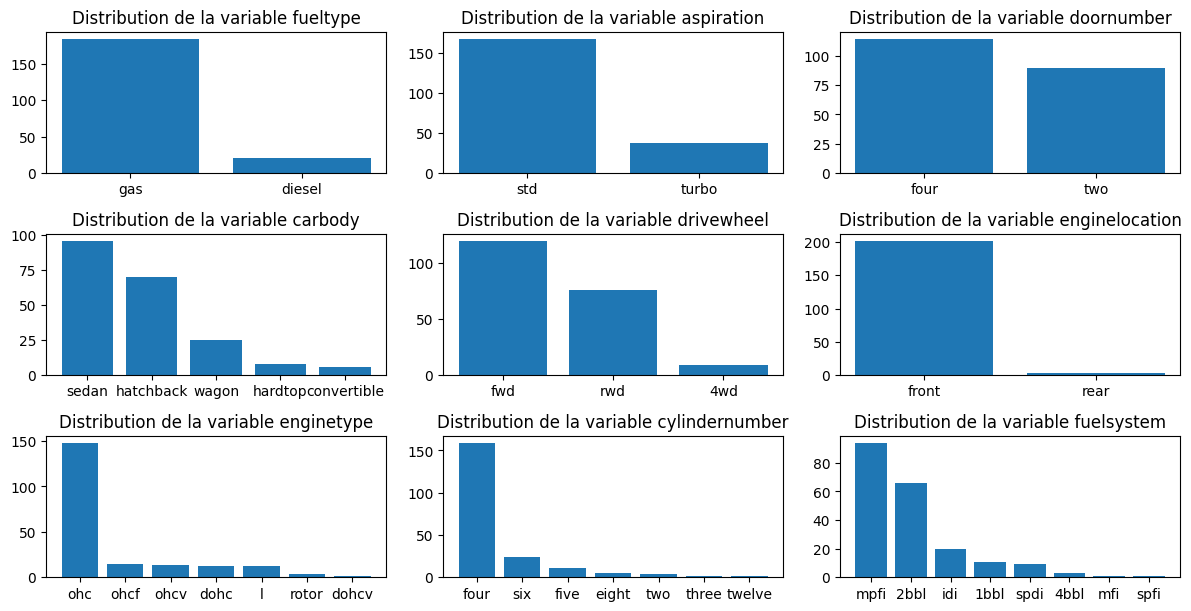

In [13]:
data.showGridDistributionVariableQualitative(columns=variable_qualitatives, excludes=['CarName'])

<div class="alert alert-info" >On constate que notre dataset possède une majorité de véhicule 
    <ul>
        <li>alimenté au pétrole</li>
        <li>avec aspiration standard</li>
        <li>avec une position du moteur à l'avant</li>
        <li>avec un moteur de type OHC</li>
        <li>avec 4 cylindres</li>
        <li>avec une traction avant</li>
    </ul>
</div>

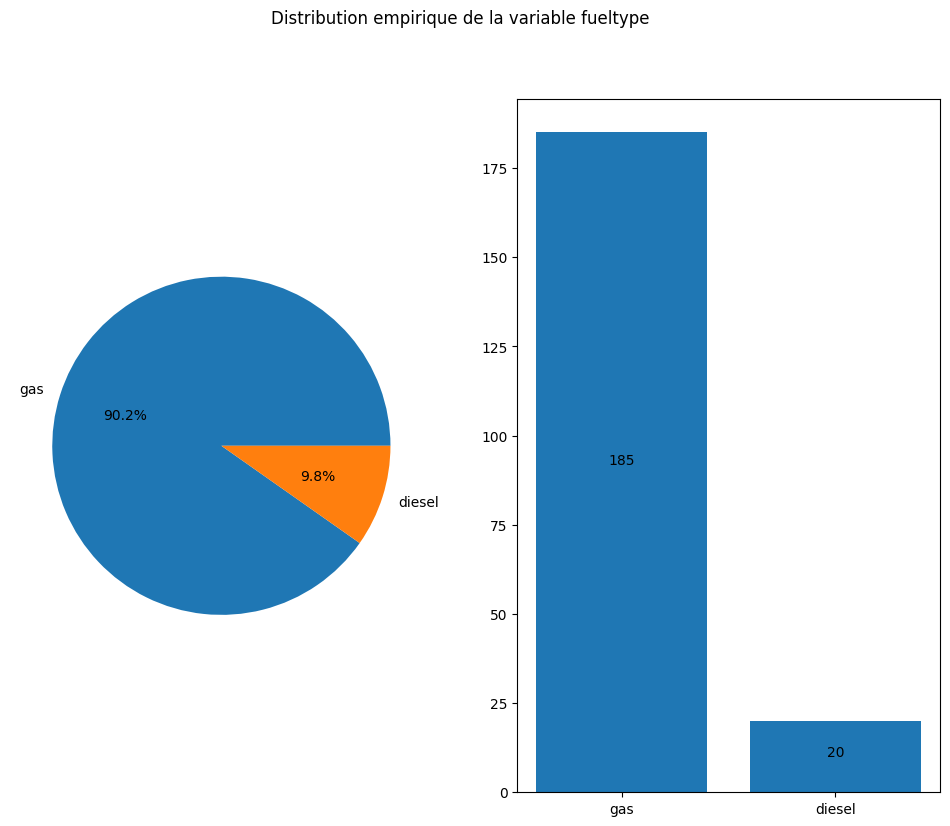

  fueltype    n         f         F
0      gas  185  0.902439  0.902439
1   diesel   20  0.097561  1.000000


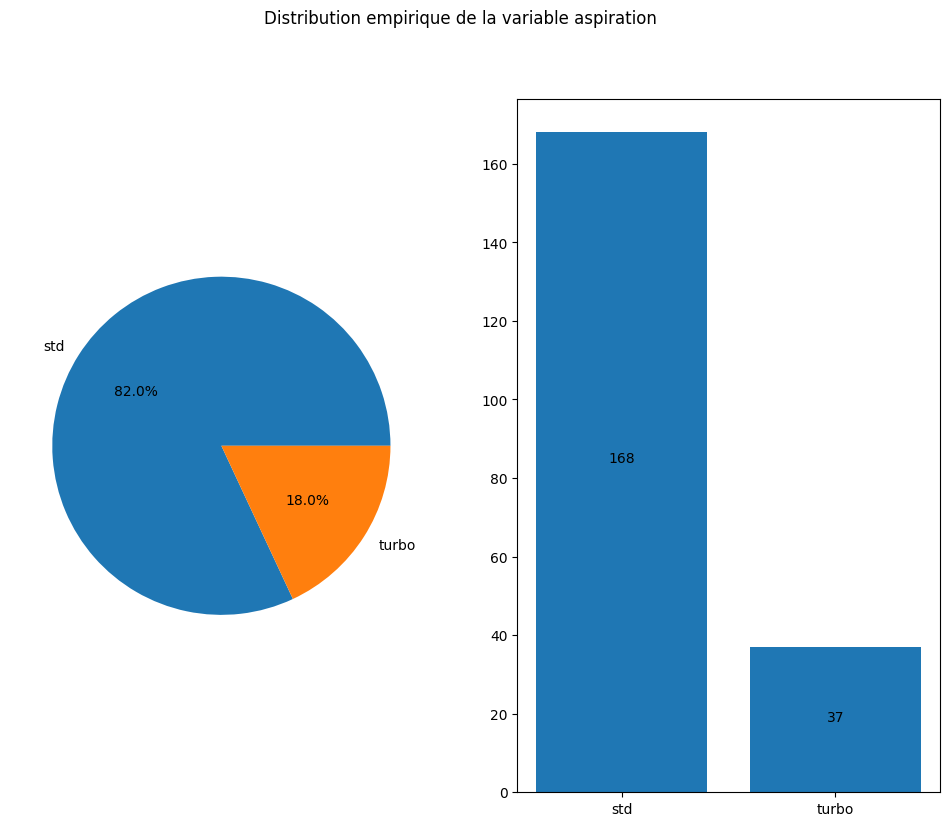

  aspiration    n         f         F
0        std  168  0.819512  0.819512
1      turbo   37  0.180488  1.000000


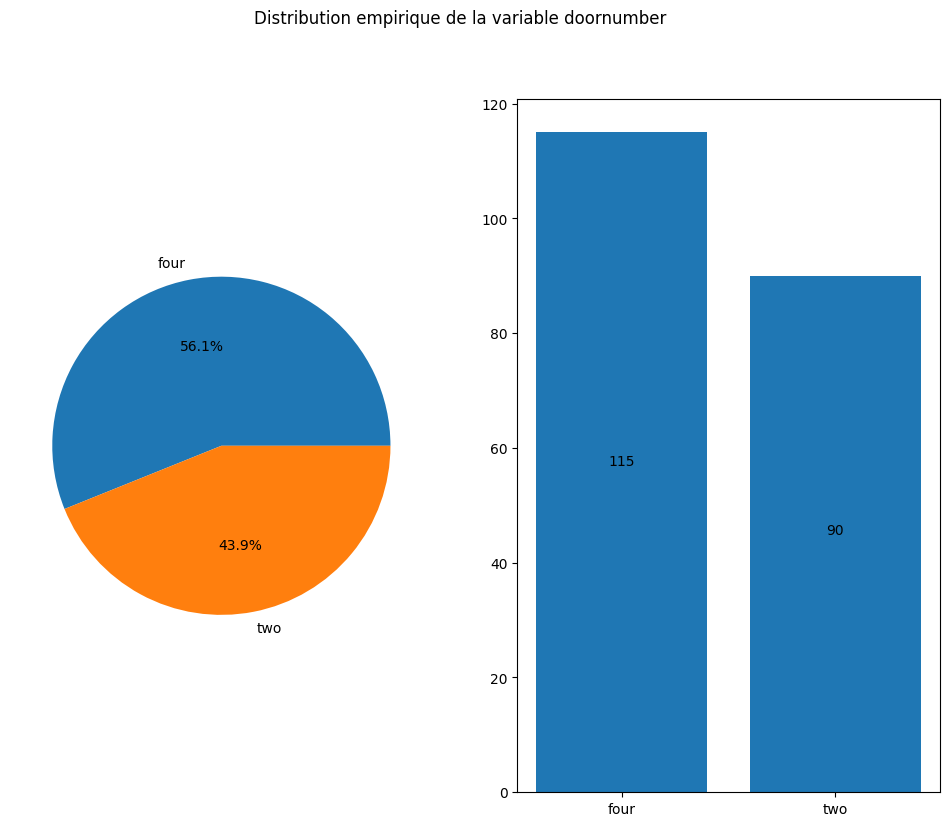

  doornumber    n         f         F
0       four  115  0.560976  0.560976
1        two   90  0.439024  1.000000


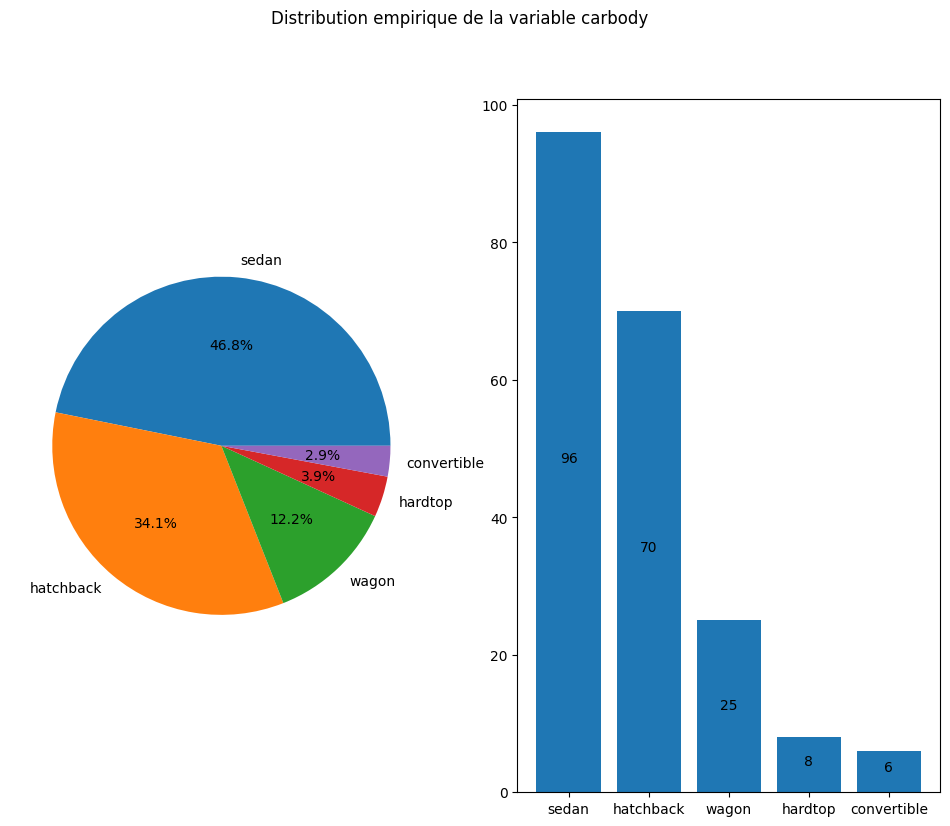

       carbody   n         f         F
0        sedan  96  0.468293  0.468293
1    hatchback  70  0.341463  0.809756
2        wagon  25  0.121951  0.931707
3      hardtop   8  0.039024  0.970732
4  convertible   6  0.029268  1.000000


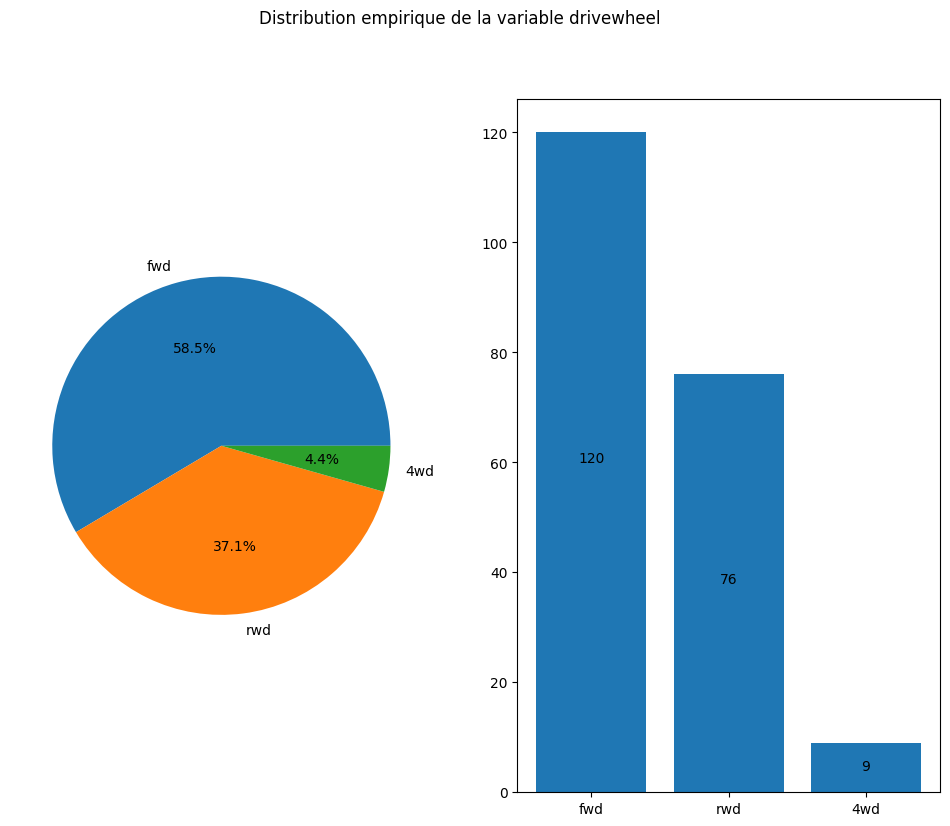

  drivewheel    n         f         F
0        fwd  120  0.585366  0.585366
1        rwd   76  0.370732  0.956098
2        4wd    9  0.043902  1.000000


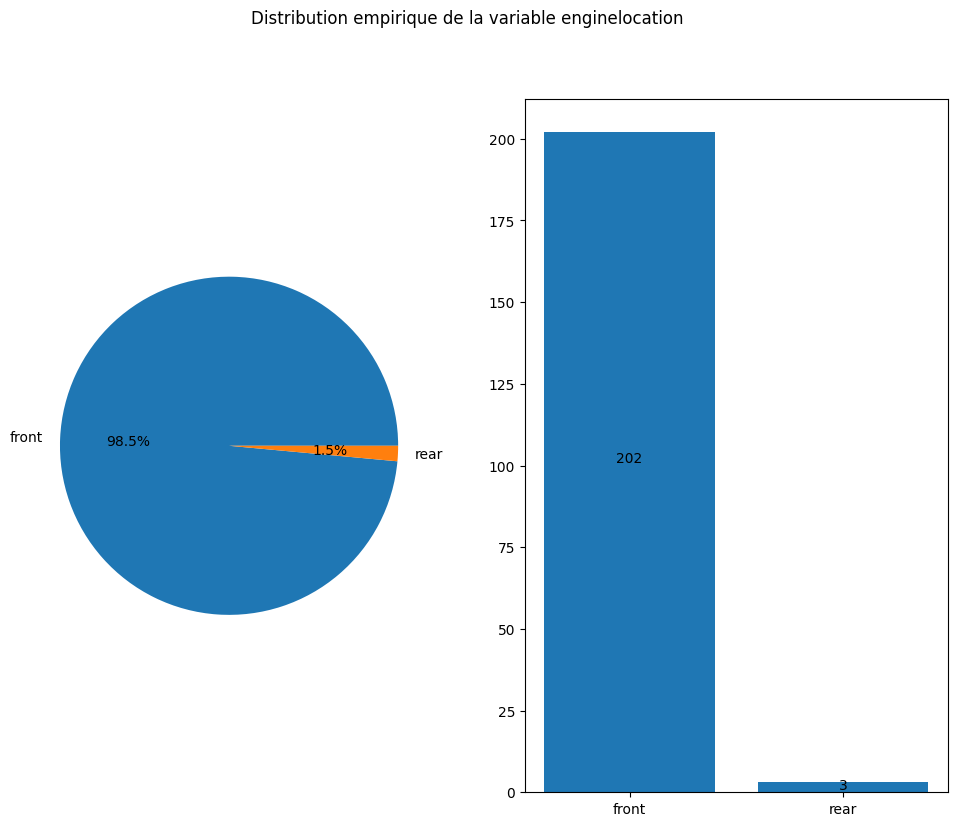

  enginelocation    n         f         F
0          front  202  0.985366  0.985366
1           rear    3  0.014634  1.000000


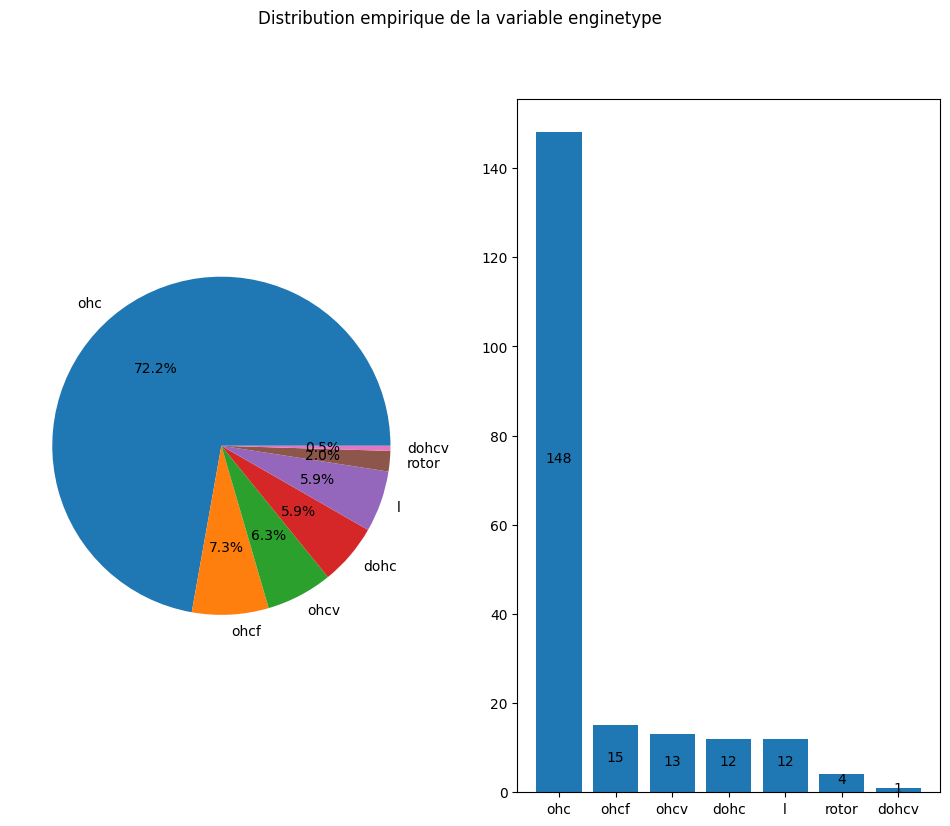

  enginetype    n         f         F
0        ohc  148  0.721951  0.721951
1       ohcf   15  0.073171  0.795122
2       ohcv   13  0.063415  0.858537
3       dohc   12  0.058537  0.917073
4          l   12  0.058537  0.975610
5      rotor    4  0.019512  0.995122
6      dohcv    1  0.004878  1.000000


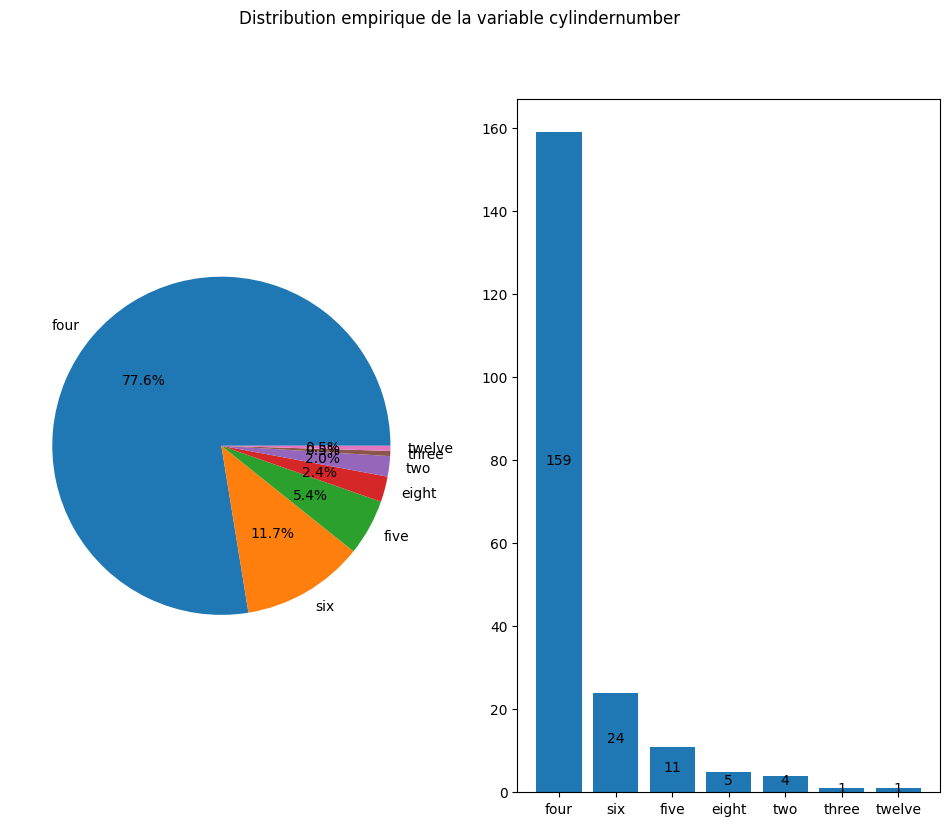

  cylindernumber    n         f         F
0           four  159  0.775610  0.775610
1            six   24  0.117073  0.892683
2           five   11  0.053659  0.946341
3          eight    5  0.024390  0.970732
4            two    4  0.019512  0.990244
5          three    1  0.004878  0.995122
6         twelve    1  0.004878  1.000000


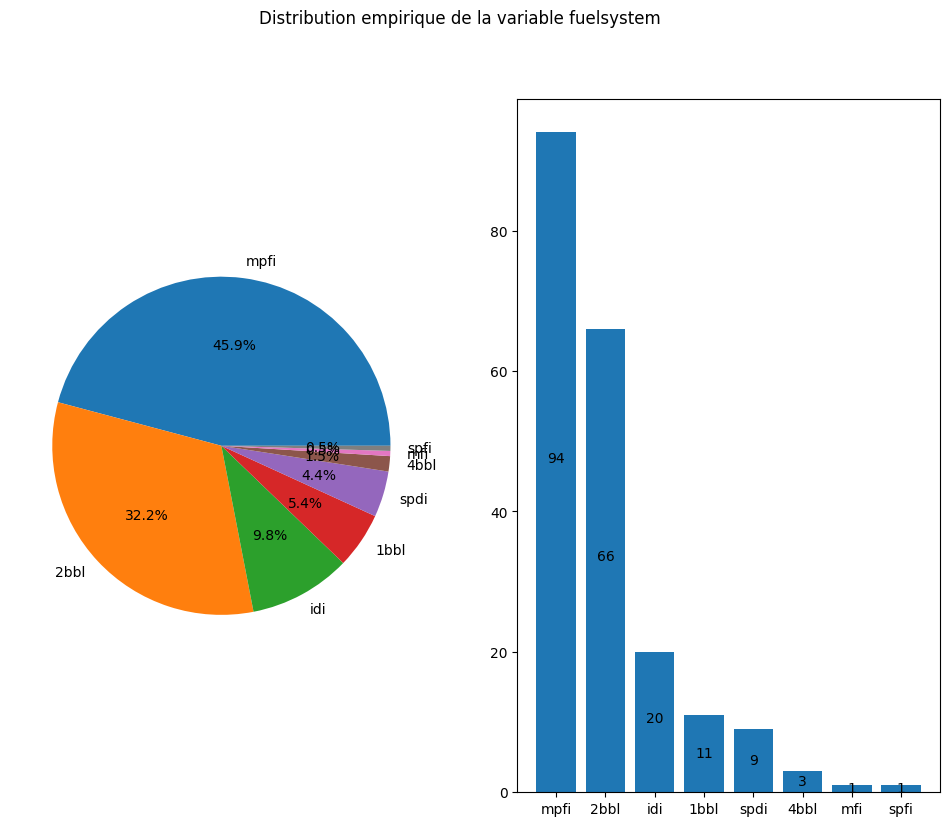

  fuelsystem   n         f         F
0       mpfi  94  0.458537  0.458537
1       2bbl  66  0.321951  0.780488
2        idi  20  0.097561  0.878049
3       1bbl  11  0.053659  0.931707
4       spdi   9  0.043902  0.975610
5       4bbl   3  0.014634  0.990244
6        mfi   1  0.004878  0.995122
7       spfi   1  0.004878  1.000000


In [14]:
data.showDistributionVariableQualitative(columns=variable_qualitatives, excludes=['CarName'], show_table=True)

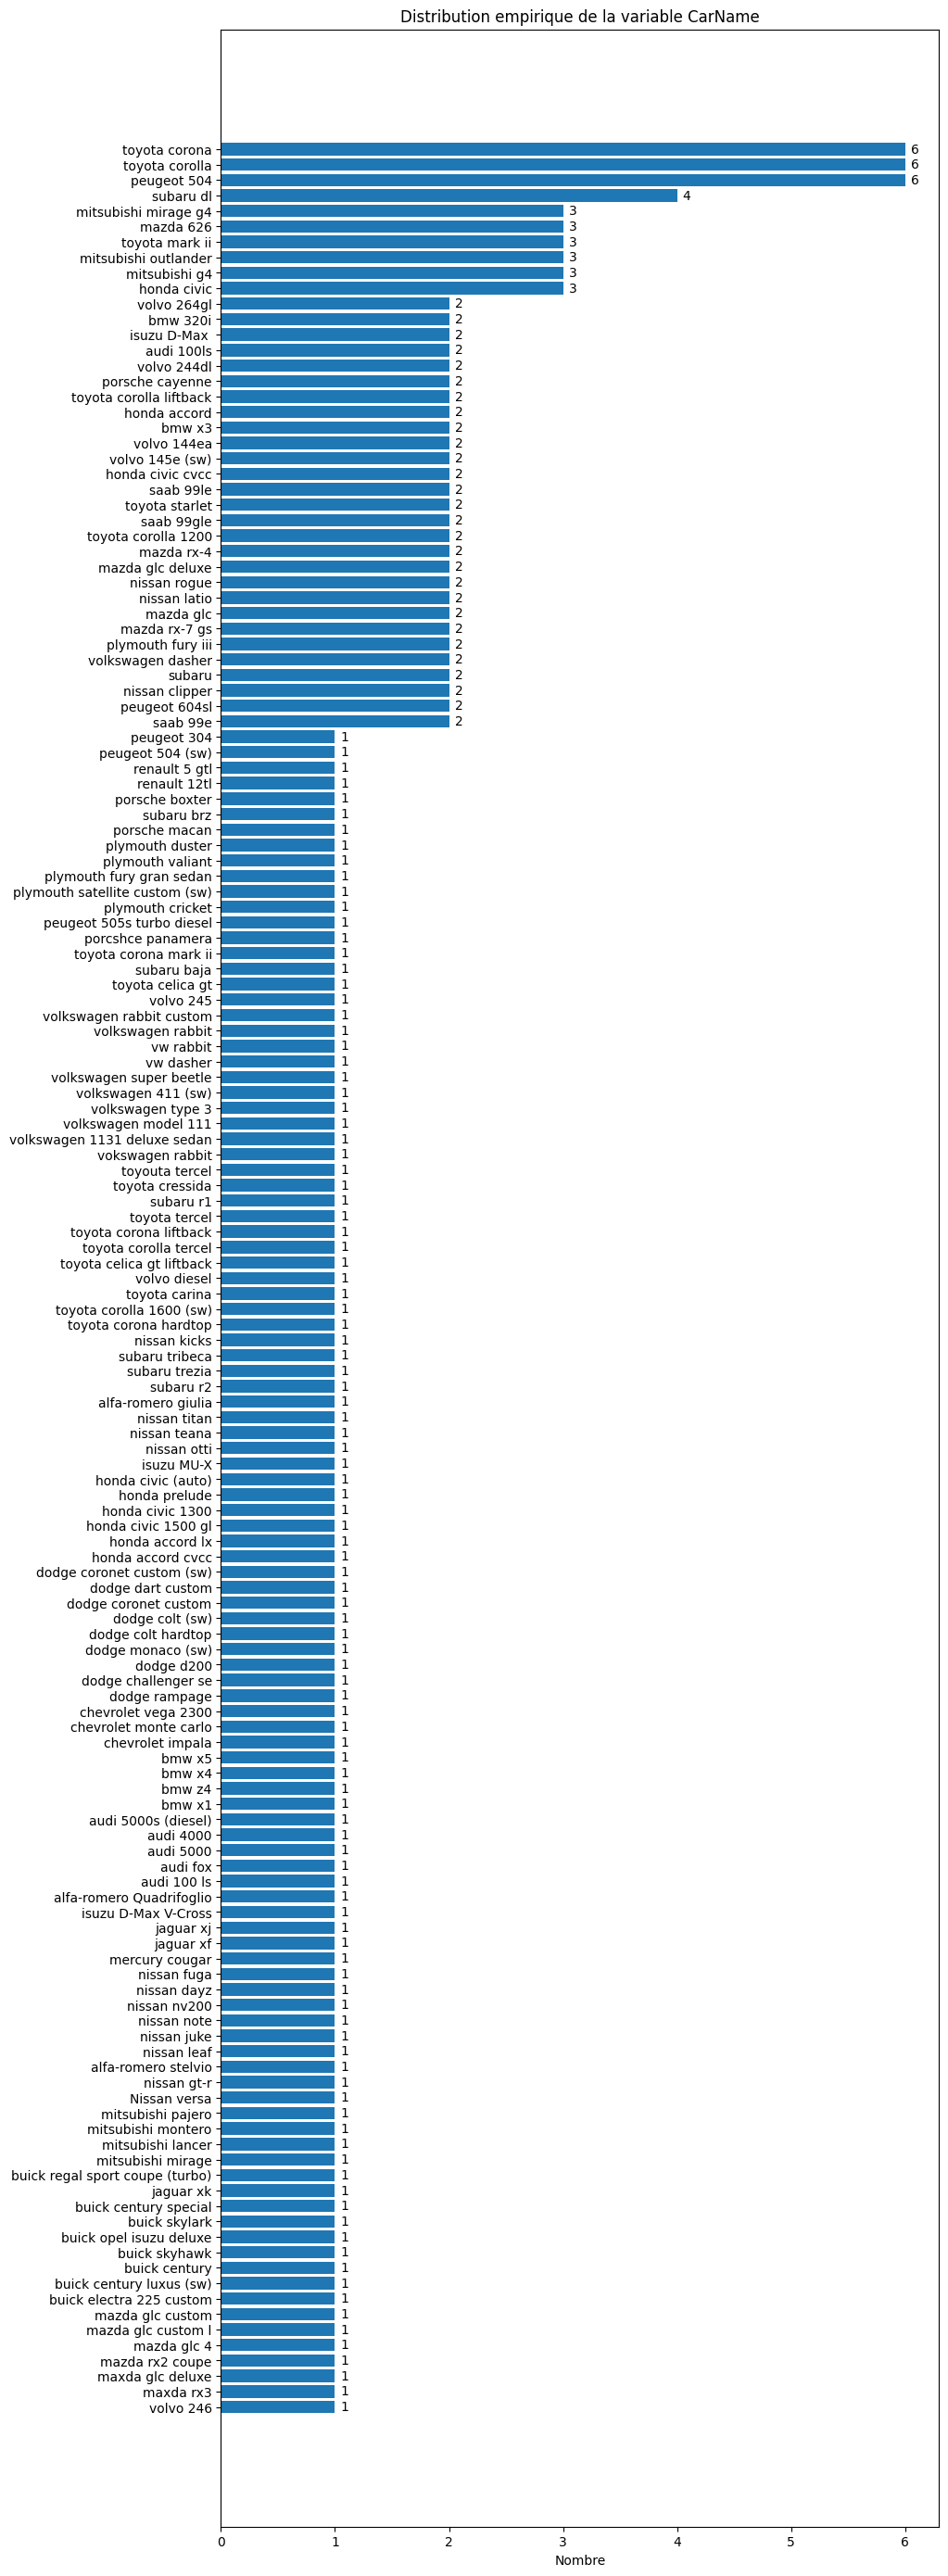

                  CarName  n         f         F
0           toyota corona  6  0.029268  0.029268
1          toyota corolla  6  0.029268  0.058537
2             peugeot 504  6  0.029268  0.087805
3               subaru dl  4  0.019512  0.107317
4    mitsubishi mirage g4  3  0.014634  0.121951
..                    ... ..       ...       ...
142           mazda glc 4  1  0.004878  0.980488
143       mazda rx2 coupe  1  0.004878  0.985366
144      maxda glc deluxe  1  0.004878  0.990244
145             maxda rx3  1  0.004878  0.995122
146             volvo 246  1  0.004878  1.000000

[147 rows x 4 columns]


In [15]:
data.showDistributionVariableQualitativeHorizontal(columns=['CarName'], show_table=True, figsize=(10,35), limit_table=10)

<div class="alert alert-info" >Il y a pratiquement aucune redondance des modèles de véhicules.</div>

#### Représentation des variables quantitatives

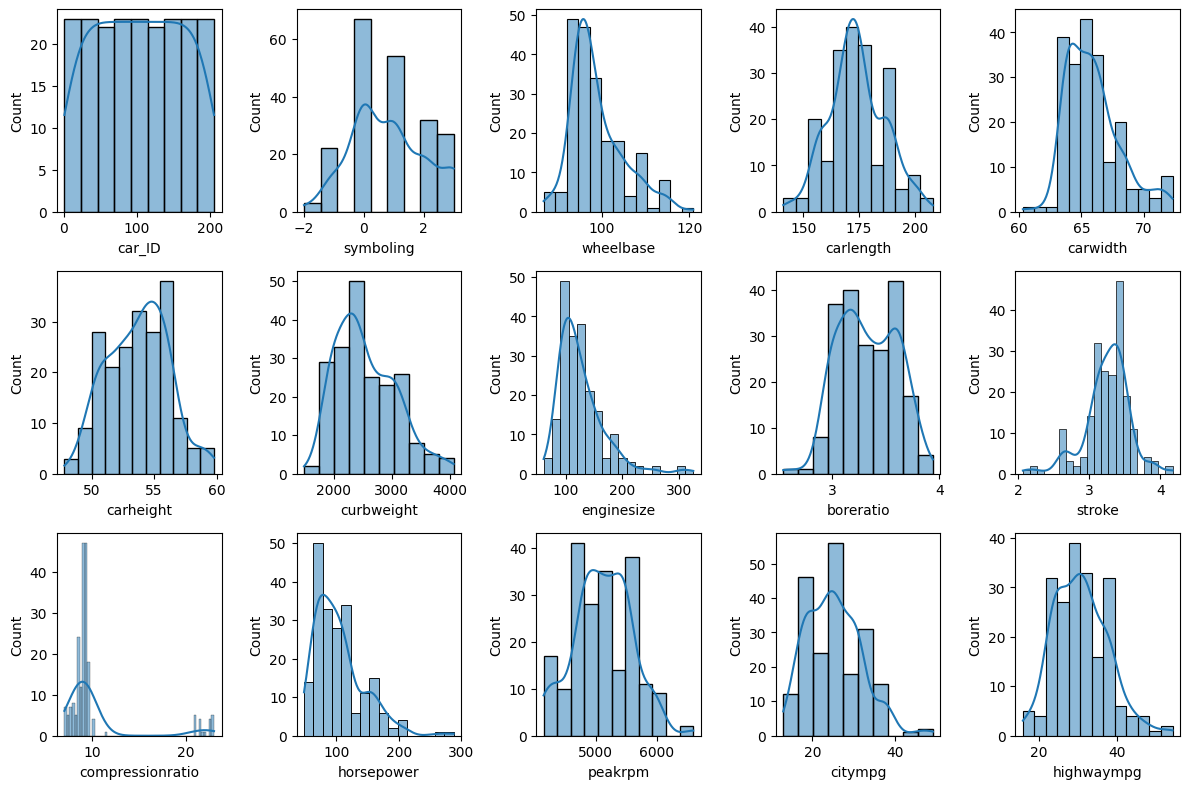

In [16]:
data.showGridHistoVariable(columns=variable_quantitatives)

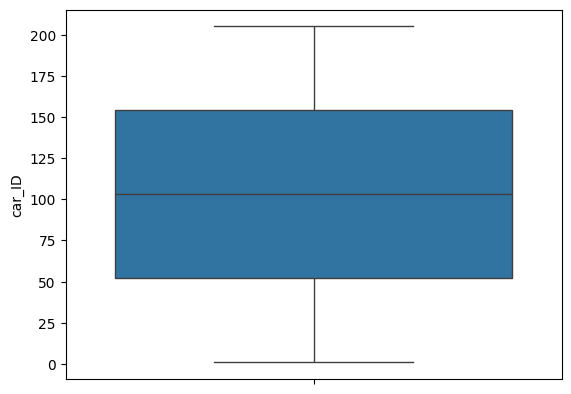

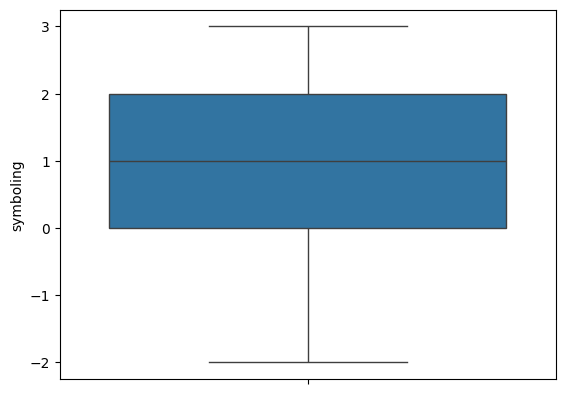

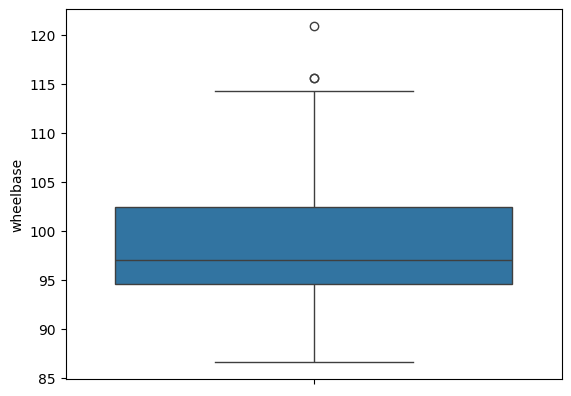

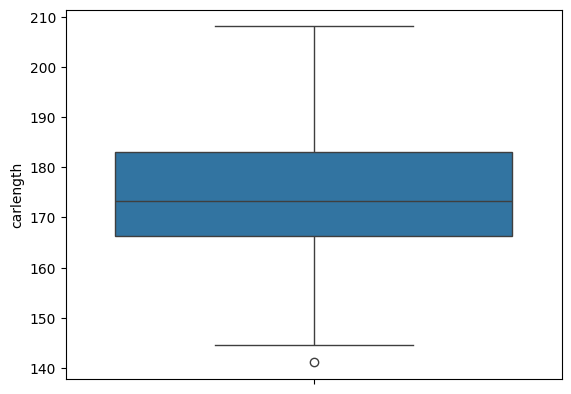

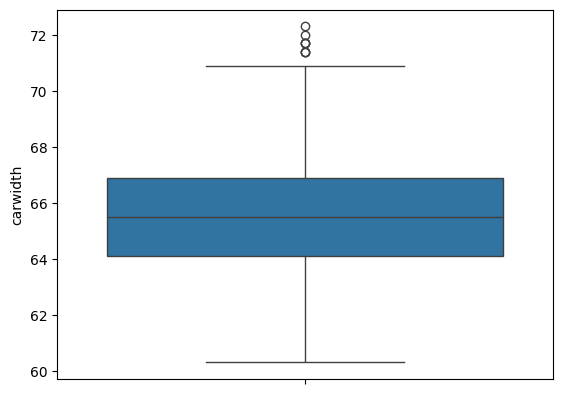

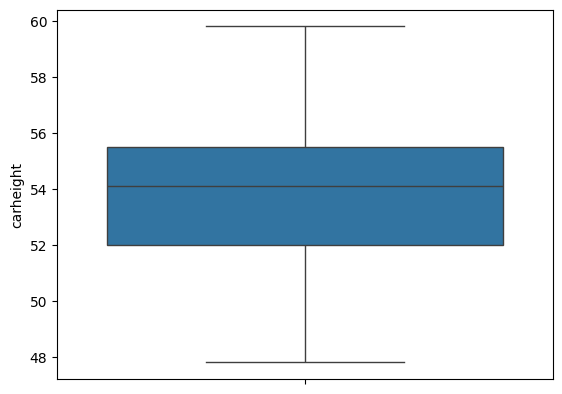

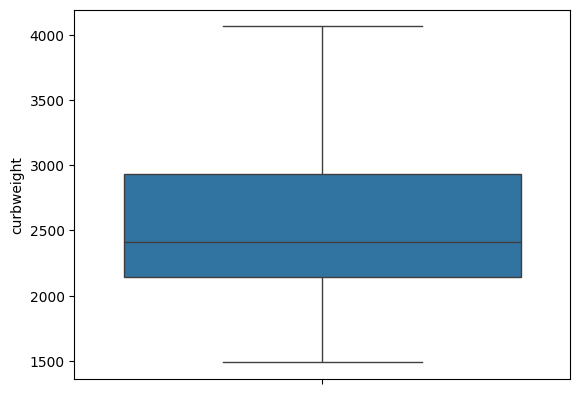

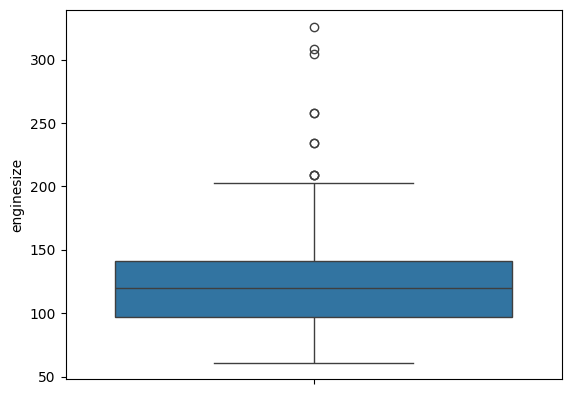

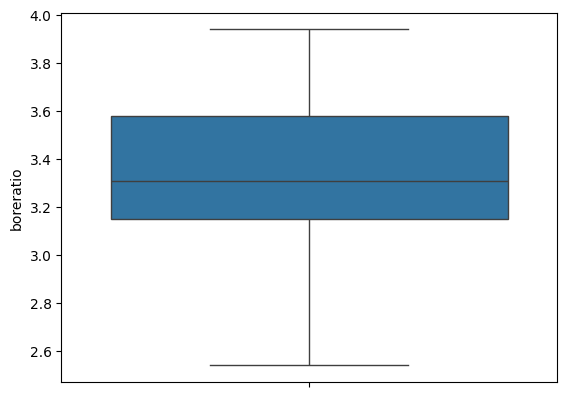

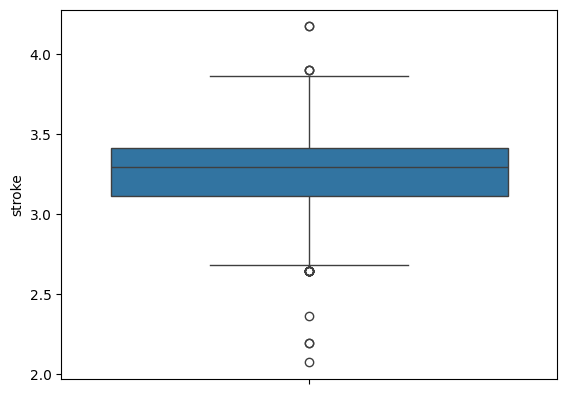

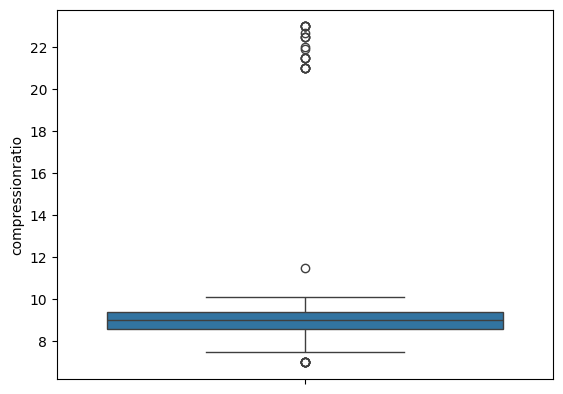

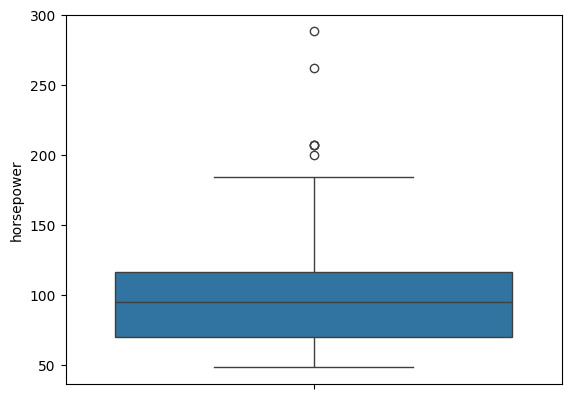

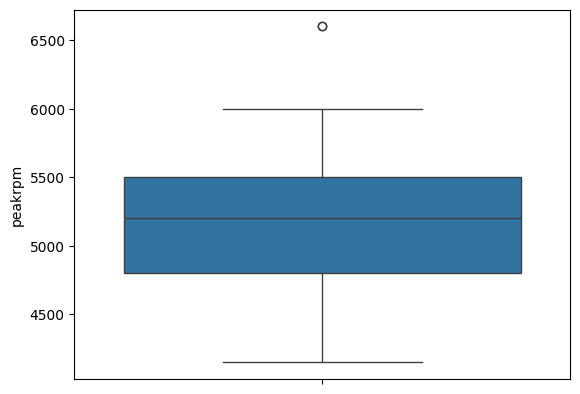

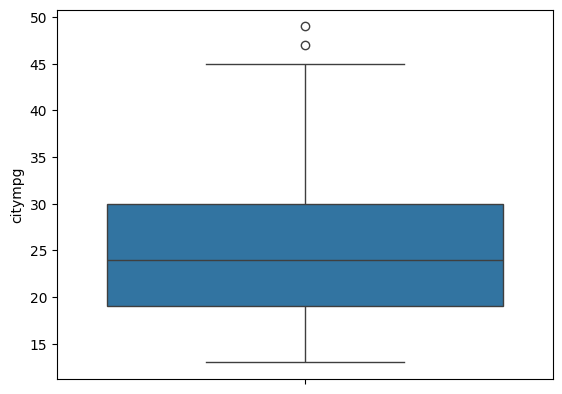

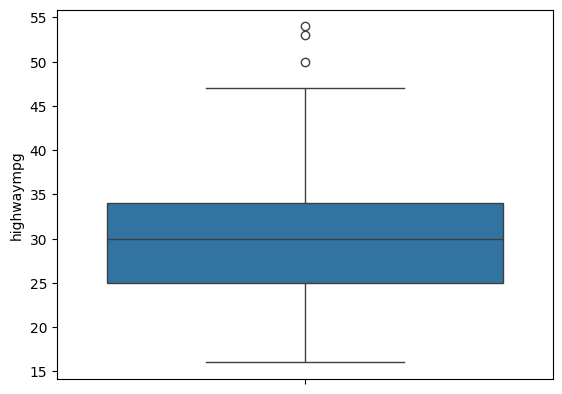

In [17]:
data.showBoxplot(columns=variable_quantitatives)

In [18]:
data.calculateOutliersZscore(columns=variable_quantitatives, threshold_z=3)

count       max       min  ratio
variable                                          
compressionratio      9  3.244916 -0.793101   0.04
enginesize            5  4.792679 -1.586561   0.02
stroke                3  2.923575 -3.789311   0.01
citympg               3  3.643868 -1.872388   0.01
horsepower            2  4.661448 -1.422573   0.01
peakrpm               2  3.099650 -2.049347   0.01
highwaympg            2  3.384286 -2.147310   0.01
wheelbase             1  3.686225 -2.023713   0.00
car_ID                0  1.723622 -1.723622   0.00
symboling             0  1.743470 -2.281433   0.00
carlength             0  2.766741 -2.677244   0.00
carwidth              0  2.987056 -2.620512   0.00
carheight             0  2.492302 -2.430664   0.00
curbweight            0  2.907988 -2.055348   0.00
boreratio             0  2.258638 -2.923049   0.00

#### Distribution de la variable cible

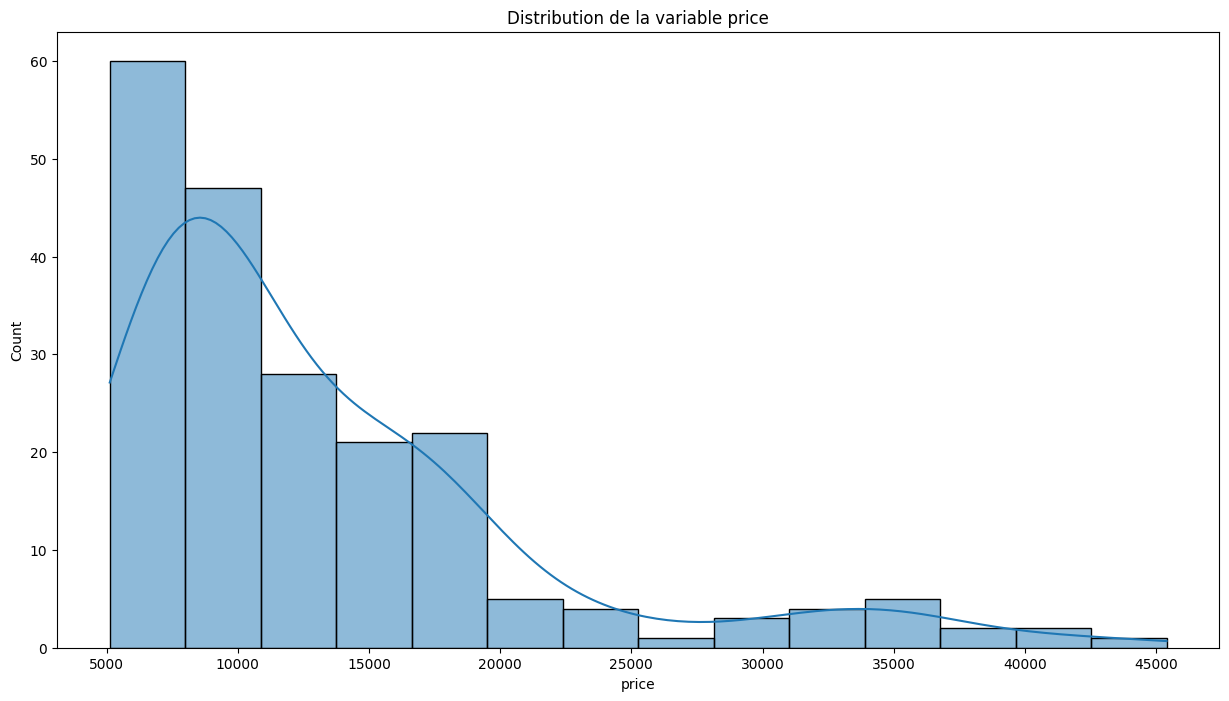

Information de la variable price
   taille  quartiles_25  quartiles_50  quartiles_75          mean  \
0     205        7788.0       10295.0       16503.0  13276.710571   

    mean_square   median  median_square      max     min    mode      skew  \
0  1.762710e+08  10295.0    105987025.0  45400.0  5118.0  5572.0  1.777678   

   kurtosis      variance  variance_corrige   ecart-type  coef_variation  \
0  3.051648  6.382176e+07      6.351044e+07  7988.852332        0.601719   

      lorenz       AUC   Surface      gini  
0  72.384914  0.350658  0.149342  0.298684  


In [19]:
data.showHistoVariable(columns=target, excludes=[], show_table=True)

<div class="alert alert-info" >Le prix médian des véhicules est de <b>10295$</b></div>

#### Visualisation des variables quantitative par rapport à la variable cible "price"

<Figure size 1000x700 with 0 Axes>

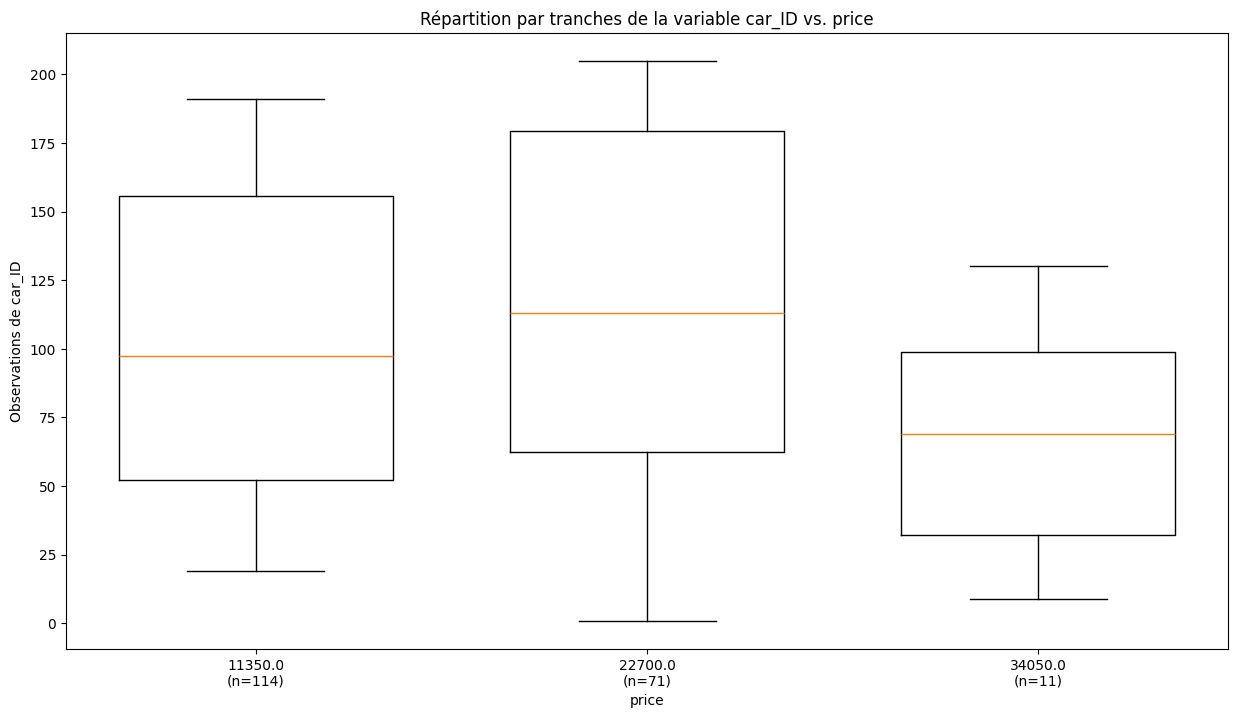

   pearson_statistic  pearson_pvalue  correlation        a           b
0          -0.109093        0.119452    -0.109093 -0.00081  113.755343


----------------------------------------------------------------------------------------------------




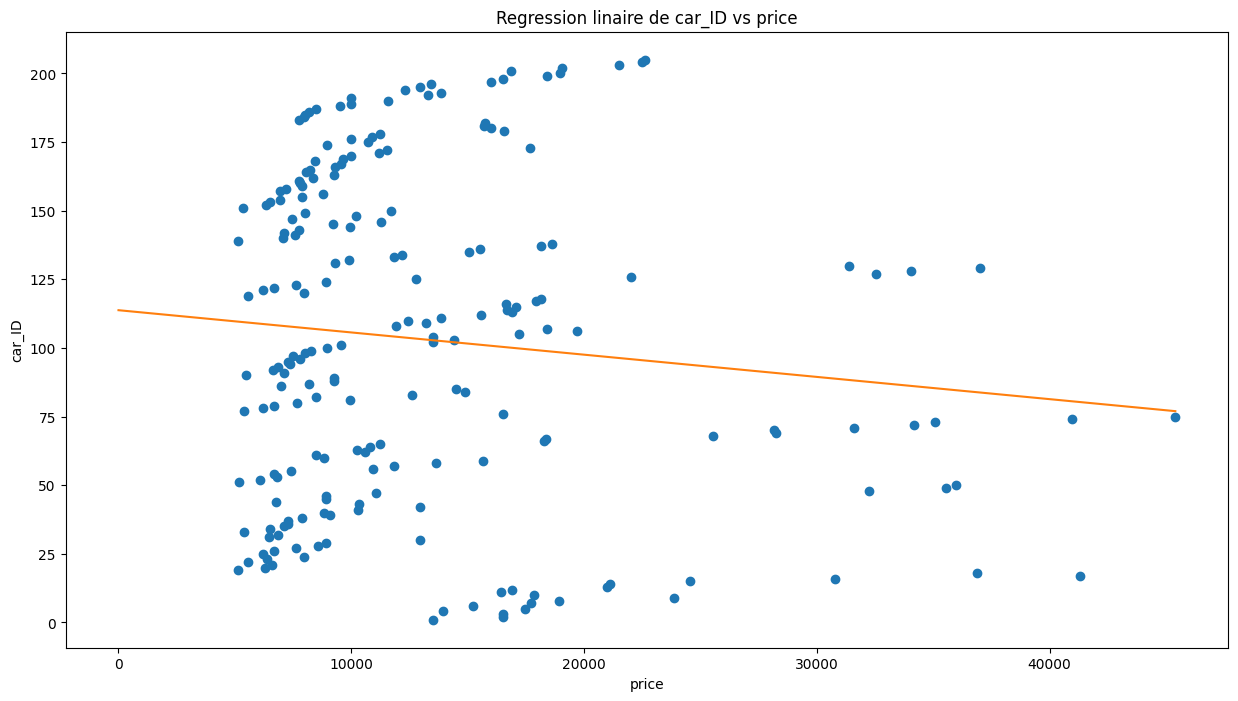

<Figure size 1000x700 with 0 Axes>

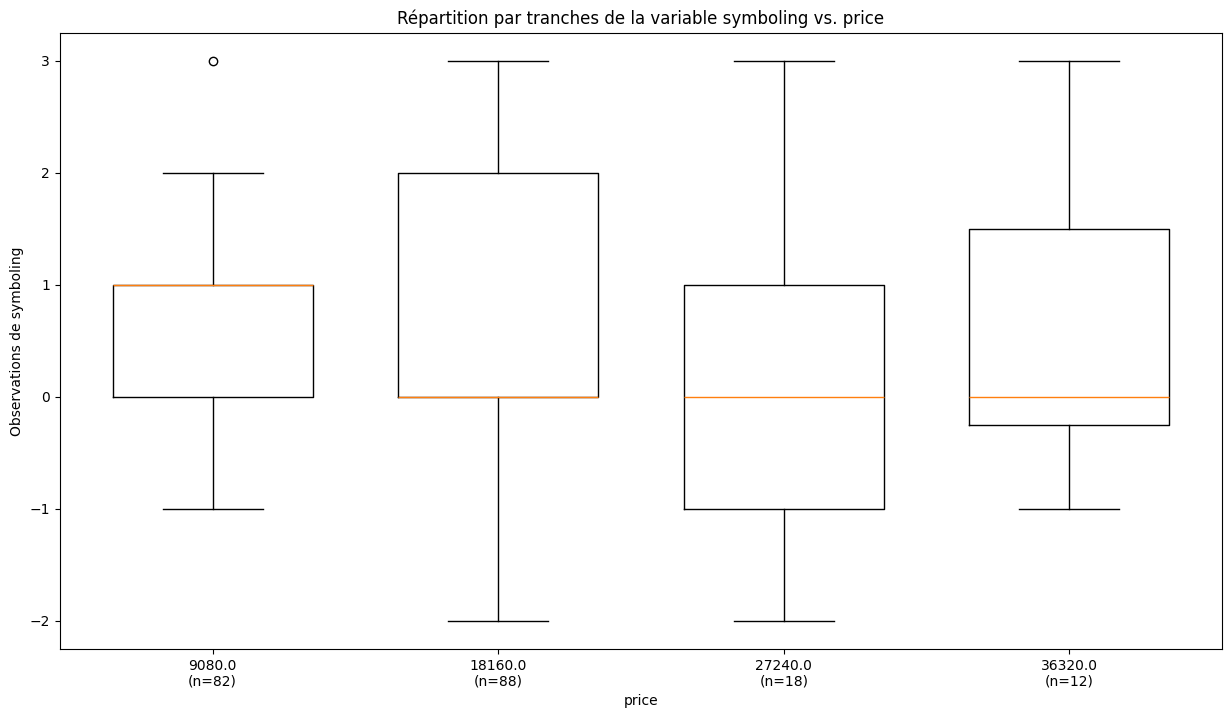

   pearson_statistic  pearson_pvalue  correlation         a         b
0          -0.079978        0.254312    -0.079978 -0.000012  0.999668


----------------------------------------------------------------------------------------------------




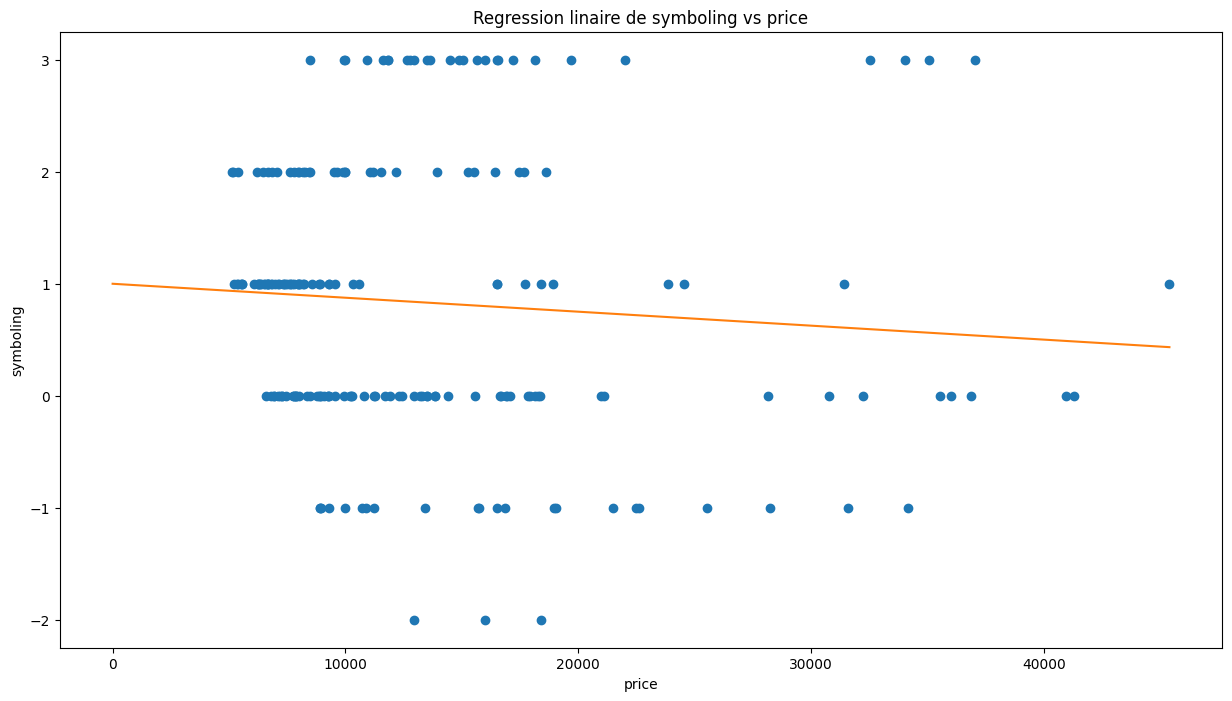

<Figure size 1000x700 with 0 Axes>

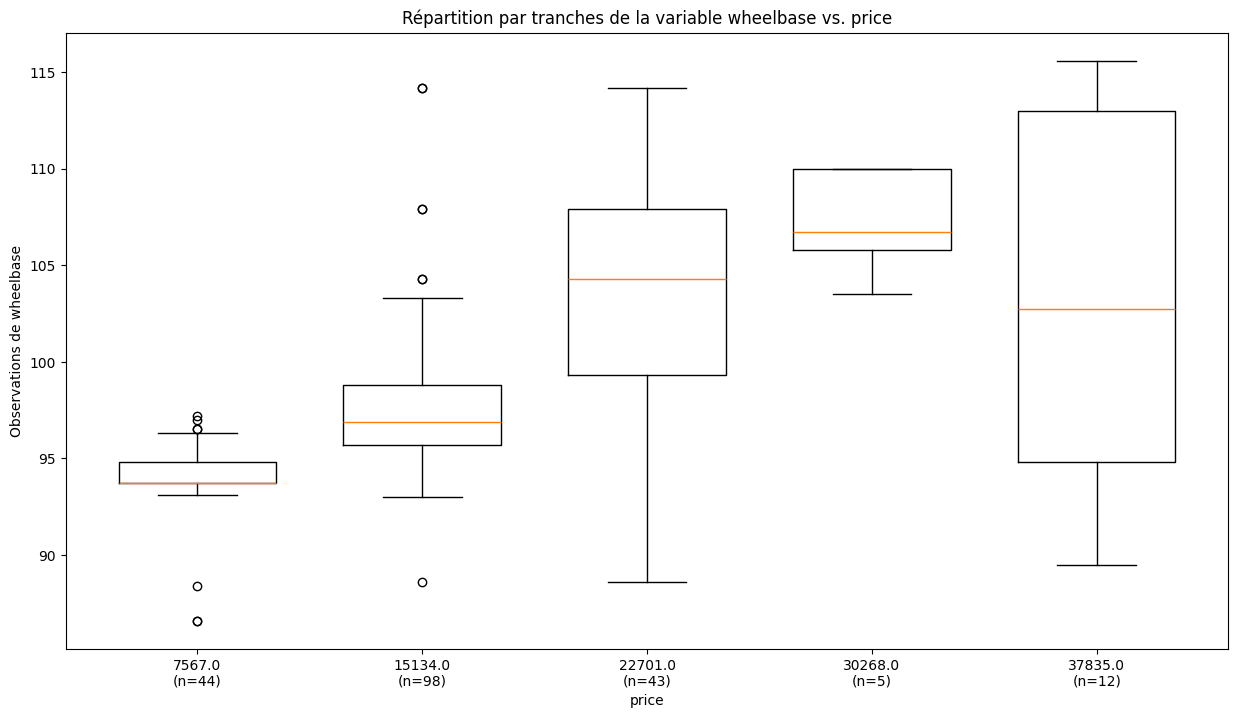

   pearson_statistic  pearson_pvalue  correlation         a          b
0           0.577816    1.182820e-19     0.577816  0.000436  92.974028


----------------------------------------------------------------------------------------------------




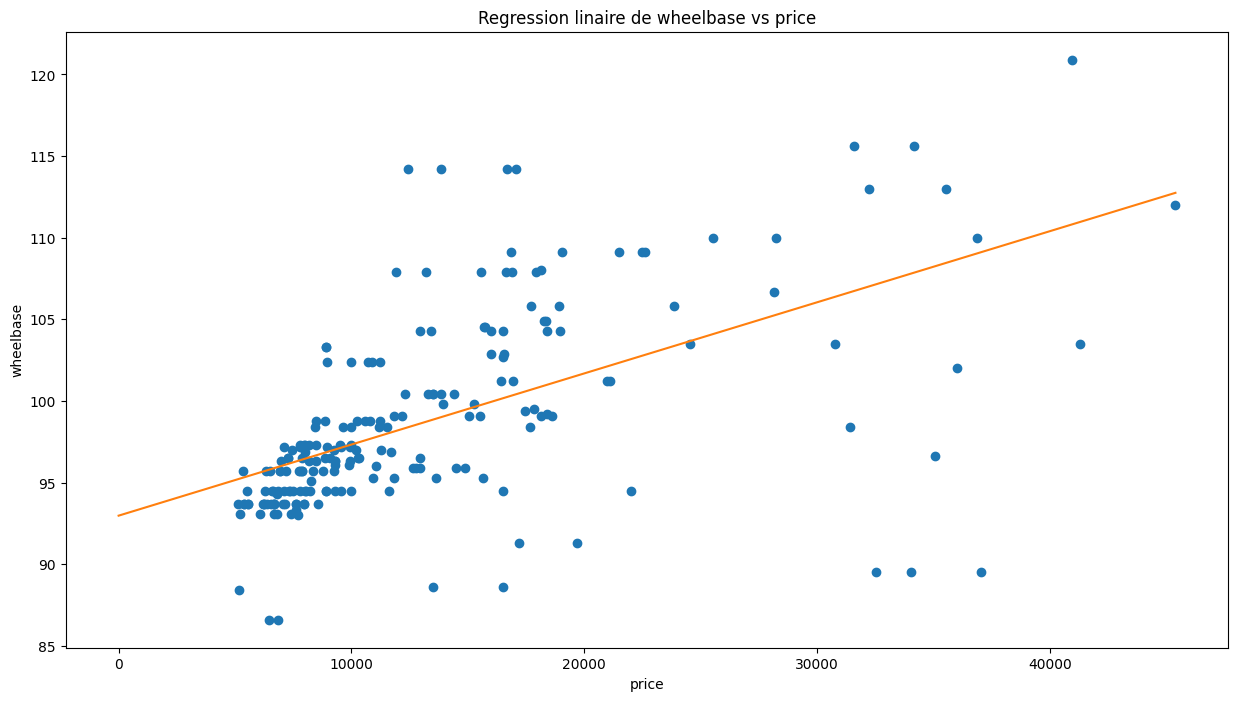

<Figure size 1000x700 with 0 Axes>

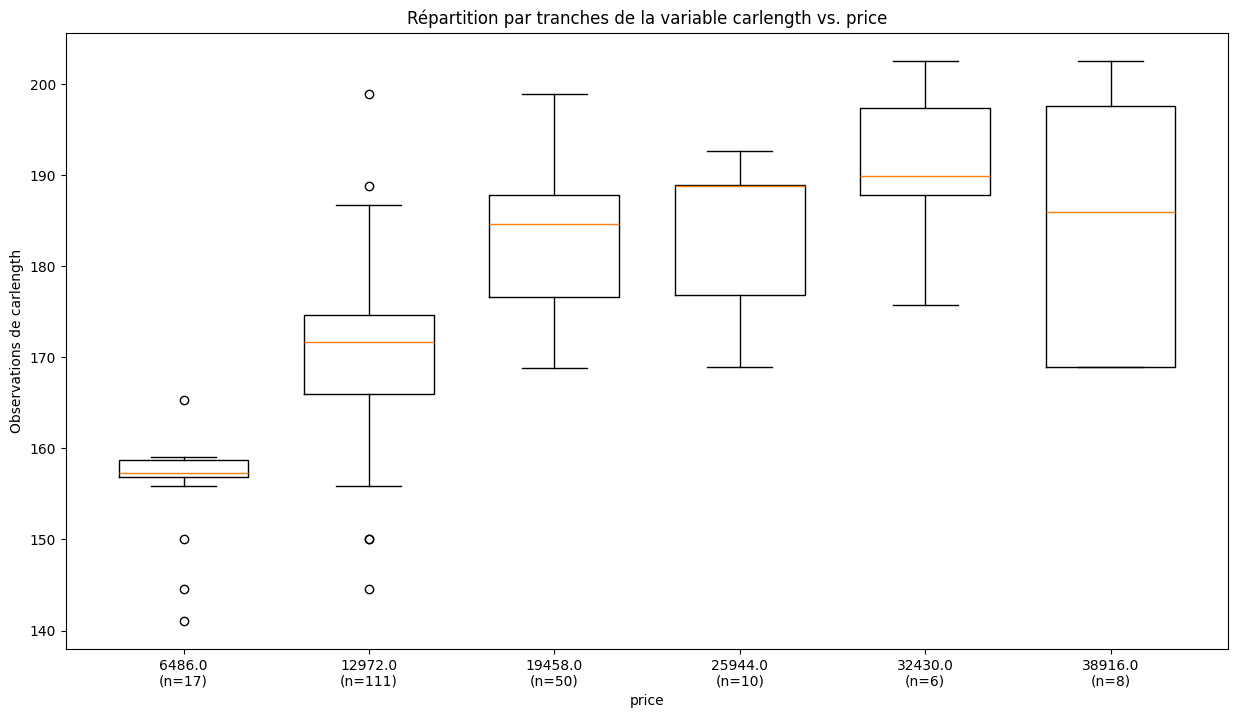

   pearson_statistic  pearson_pvalue  correlation         a           b
0            0.68292    1.678707e-29      0.68292  0.001055  160.047088


----------------------------------------------------------------------------------------------------




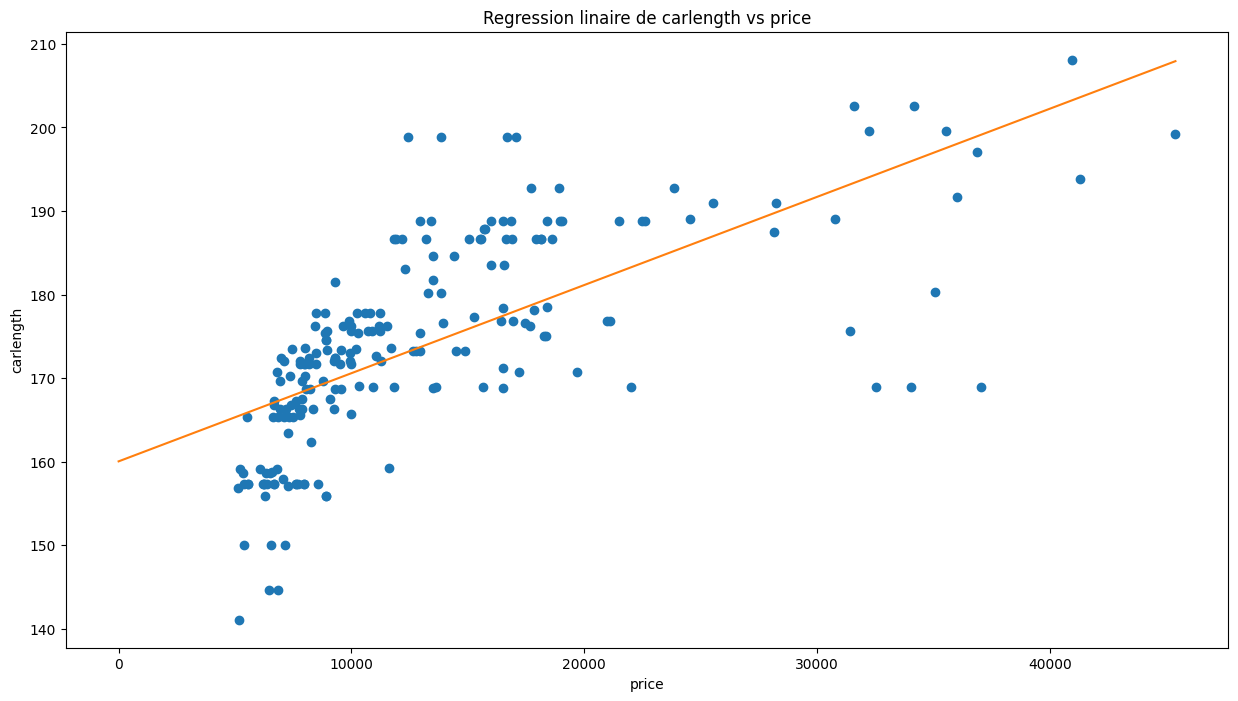

<Figure size 1000x700 with 0 Axes>

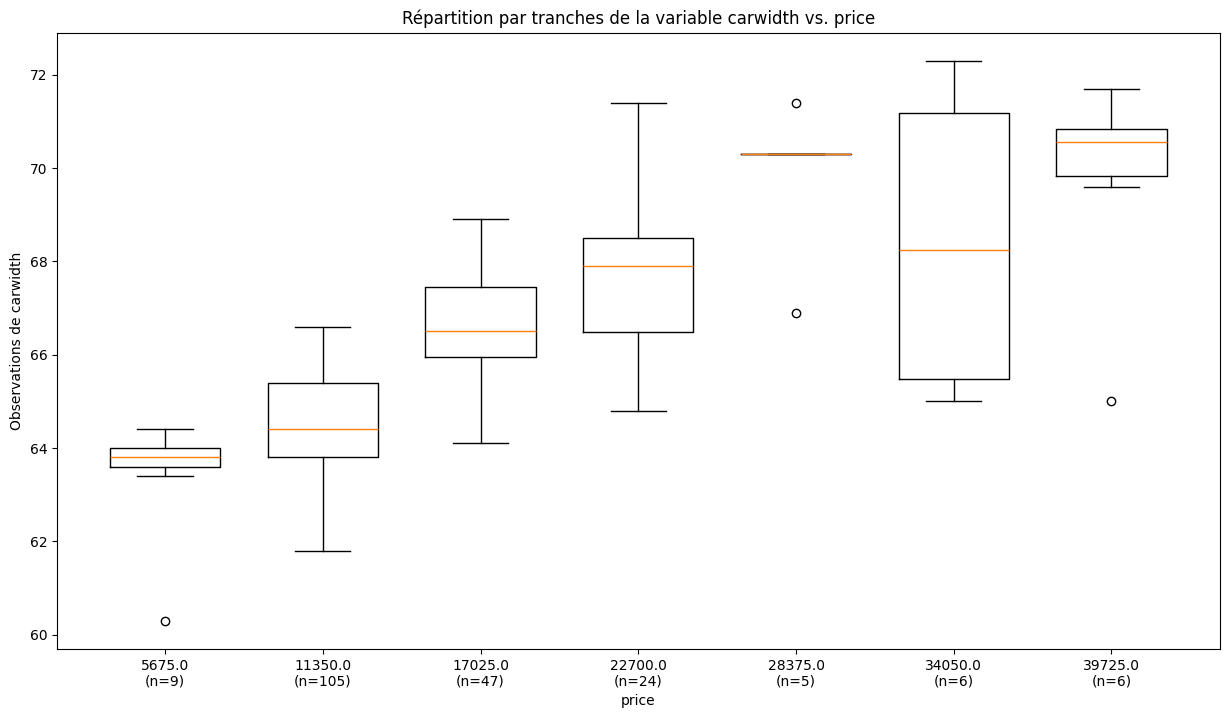

   pearson_statistic  pearson_pvalue  correlation         a          b
0           0.759325    9.627438e-40     0.759325  0.000204  63.200716


----------------------------------------------------------------------------------------------------




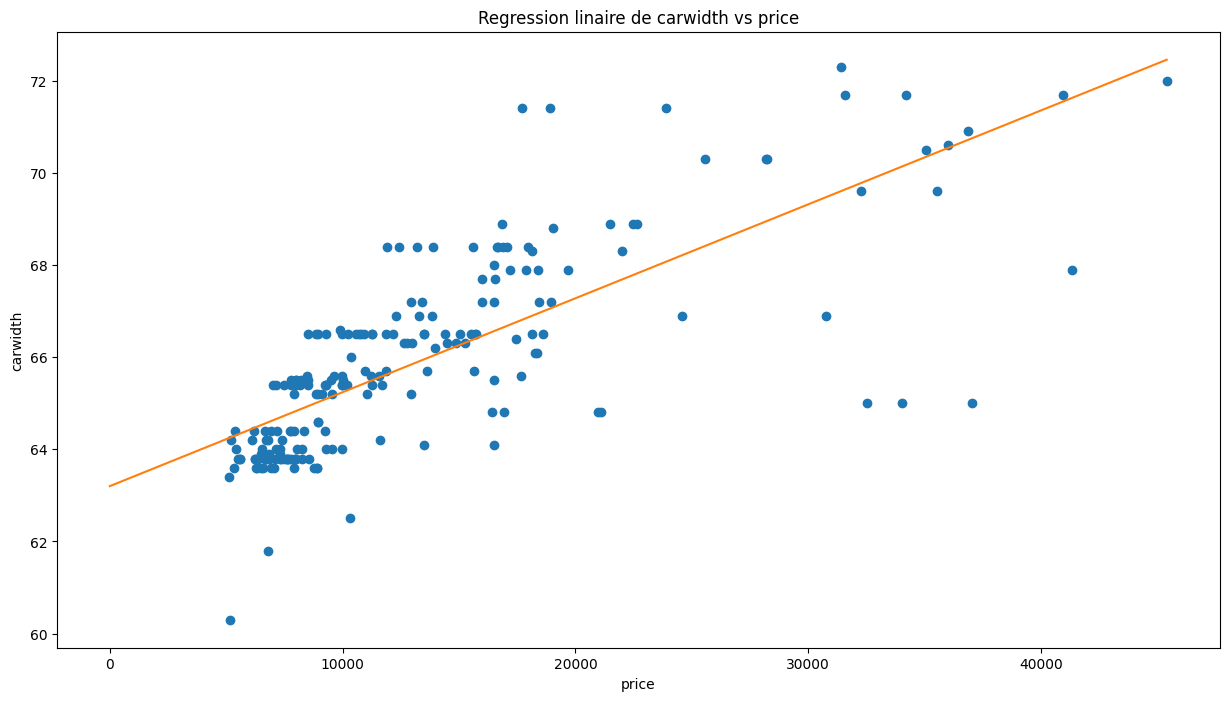

<Figure size 1000x700 with 0 Axes>

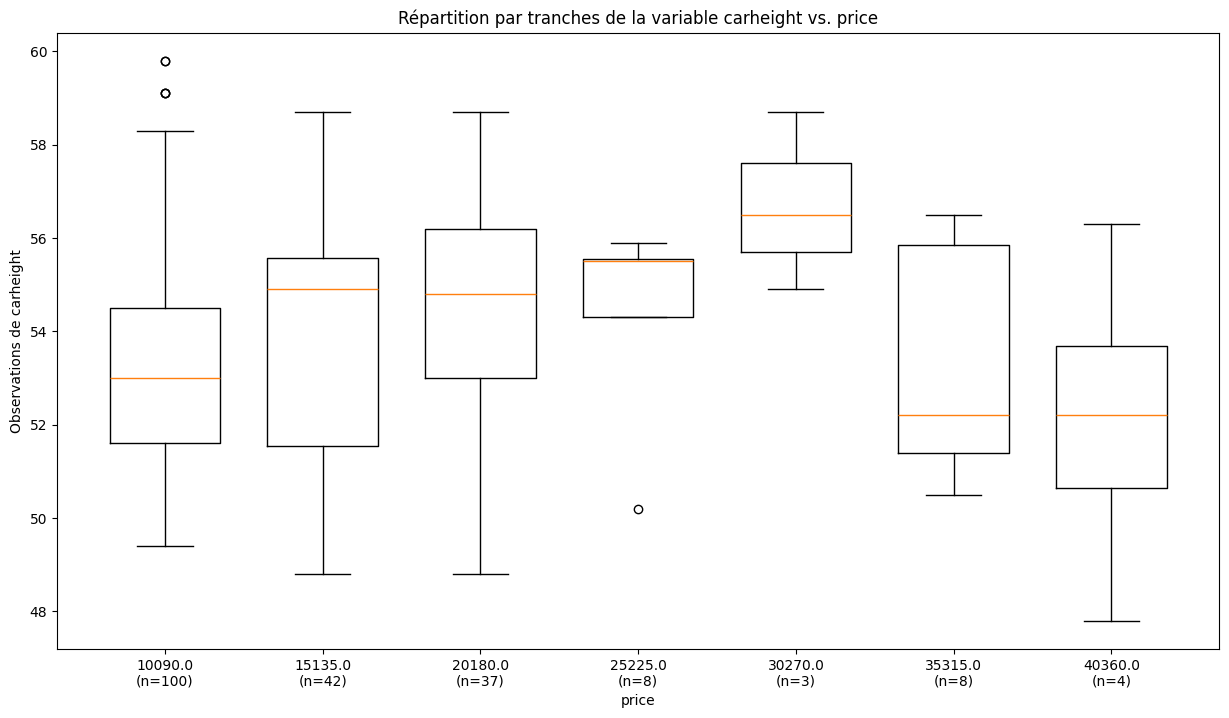

   pearson_statistic  pearson_pvalue  correlation         a          b
0           0.119336        0.088328     0.119336  0.000037  53.240266


----------------------------------------------------------------------------------------------------




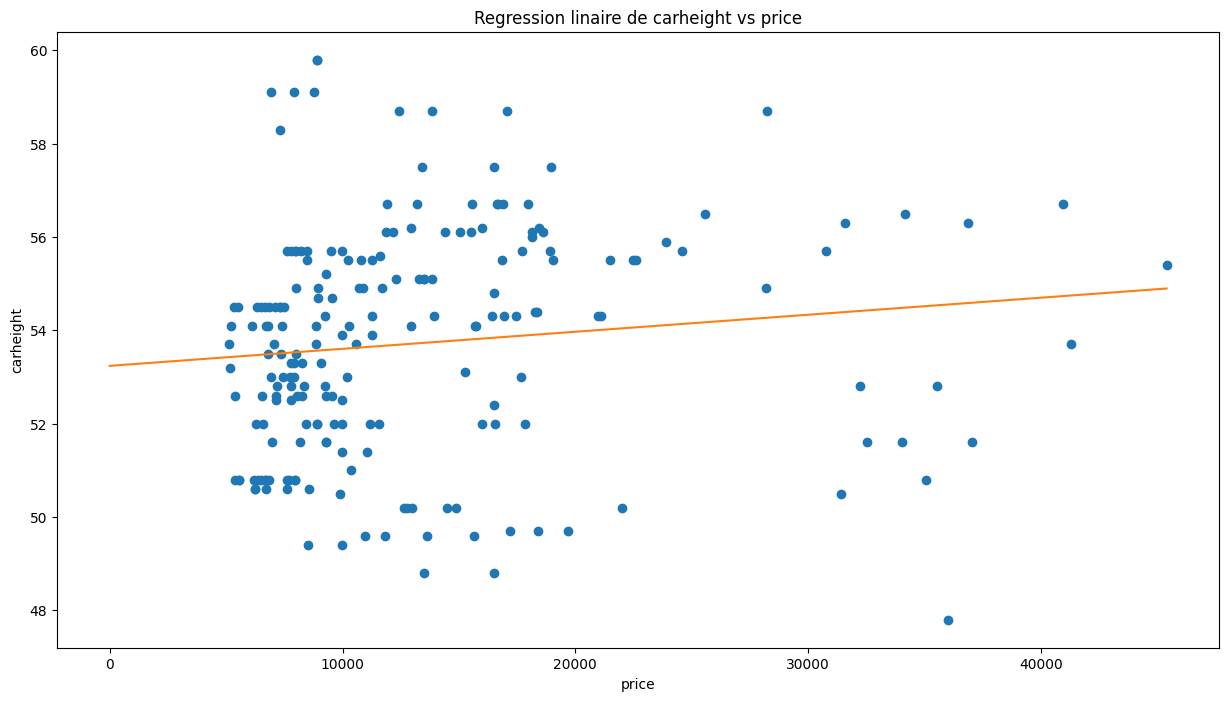

<Figure size 1000x700 with 0 Axes>

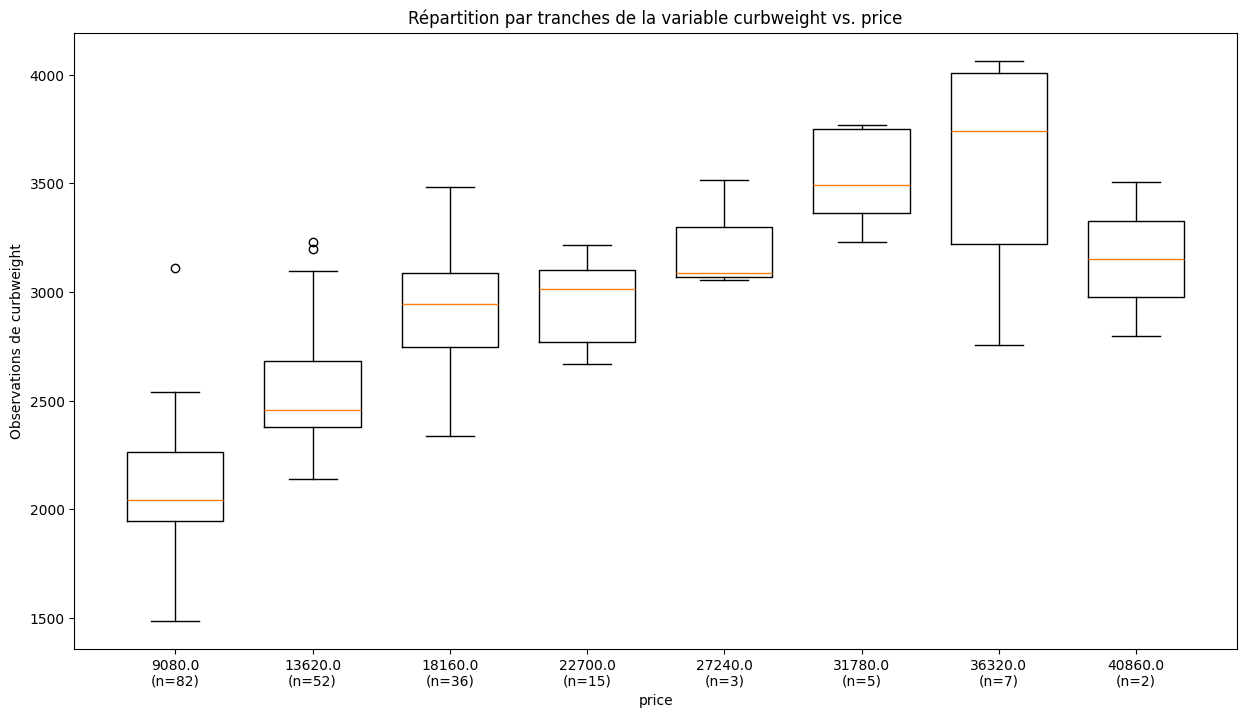

   pearson_statistic  pearson_pvalue  correlation         a            b
0           0.835305    1.214445e-54     0.835305  0.054442  1832.759139


----------------------------------------------------------------------------------------------------




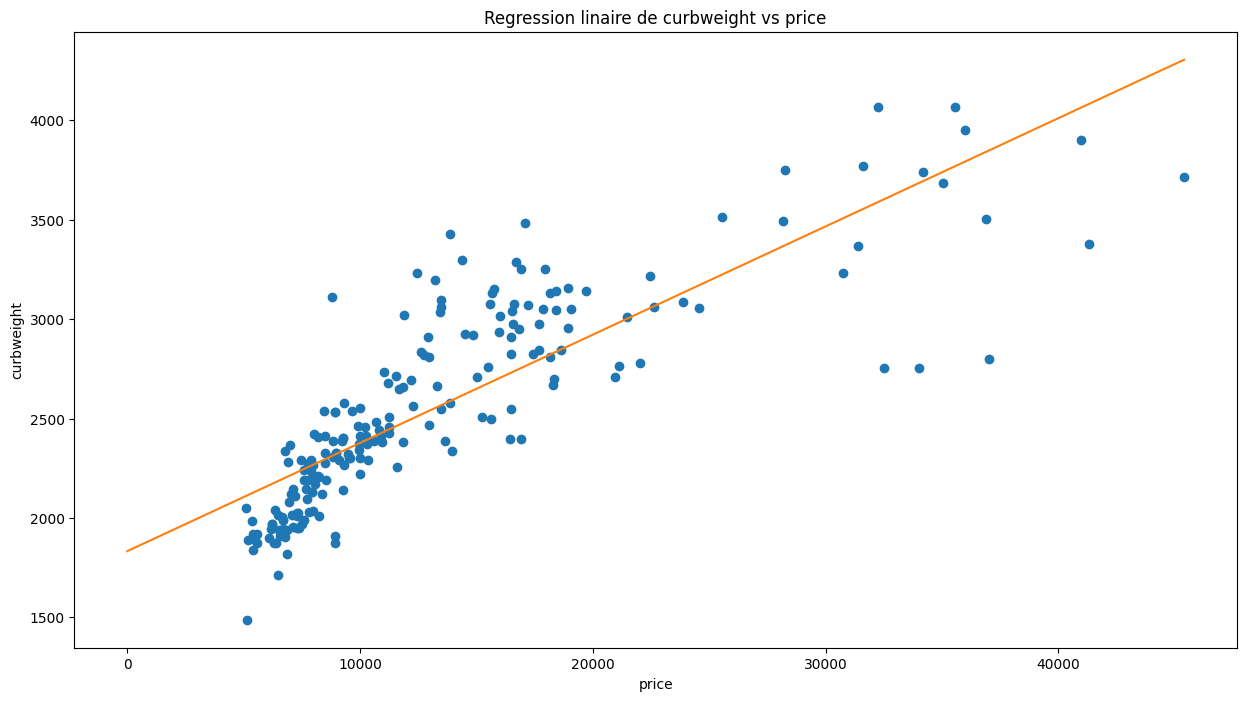

<Figure size 1000x700 with 0 Axes>

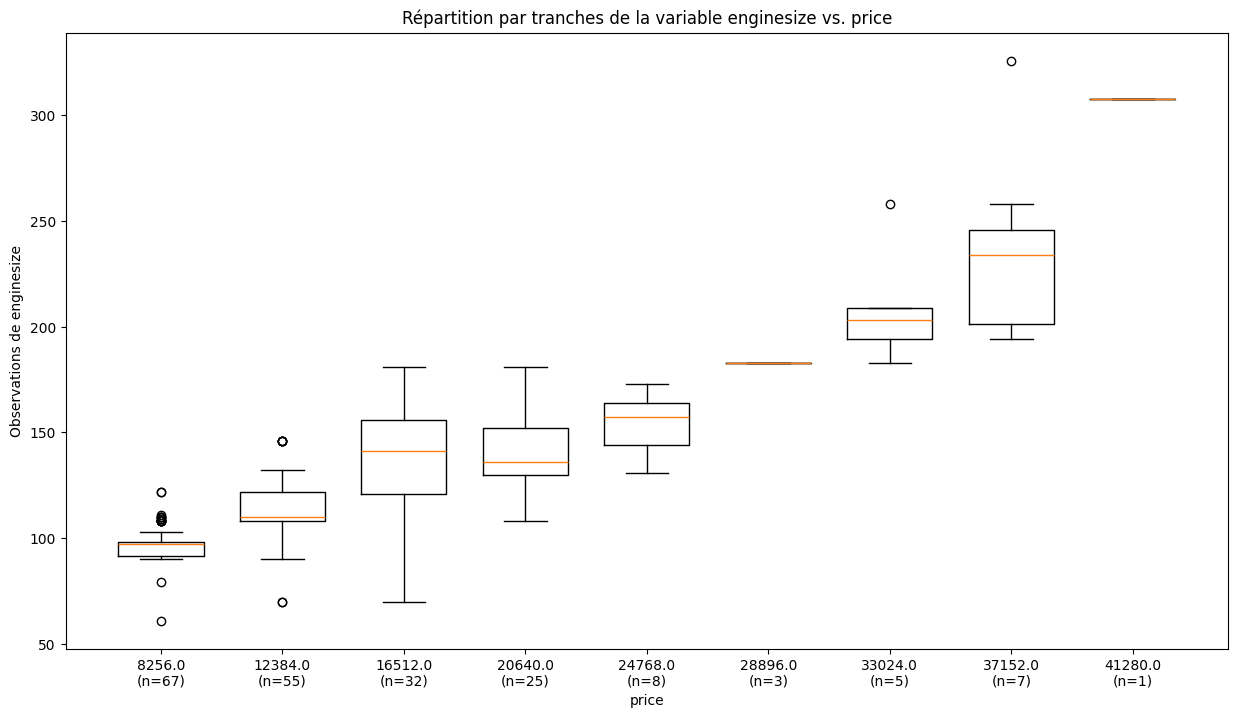

   pearson_statistic  pearson_pvalue  correlation         a          b
0           0.874145    1.354764e-65     0.874145  0.004557  66.411091


----------------------------------------------------------------------------------------------------




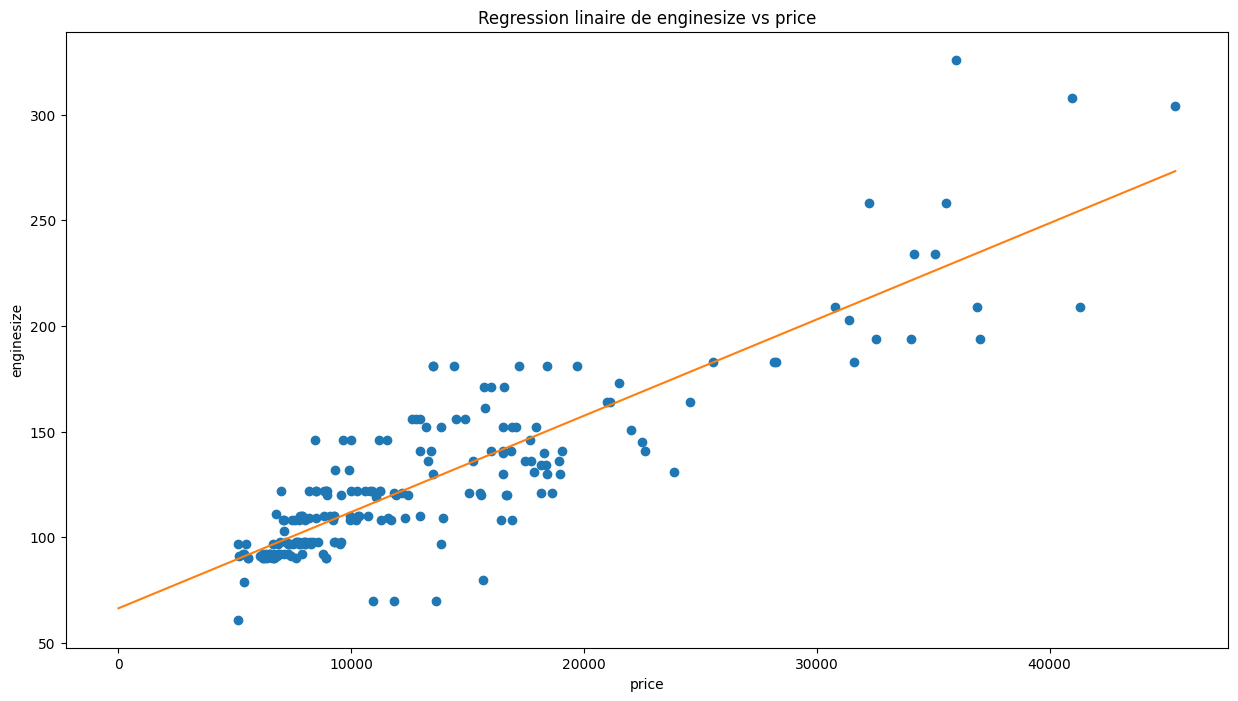

<Figure size 1000x700 with 0 Axes>

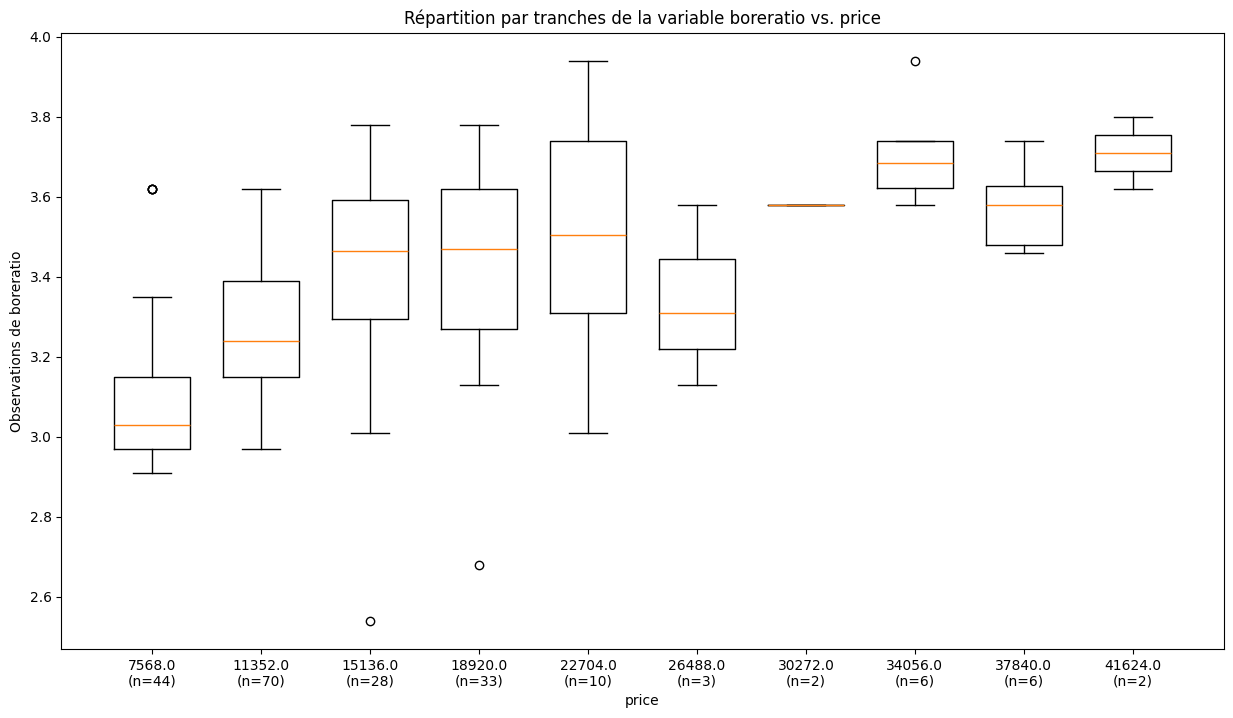

   pearson_statistic  pearson_pvalue  correlation         a         b
0           0.553173    7.907922e-18     0.553173  0.000019  3.080764


----------------------------------------------------------------------------------------------------




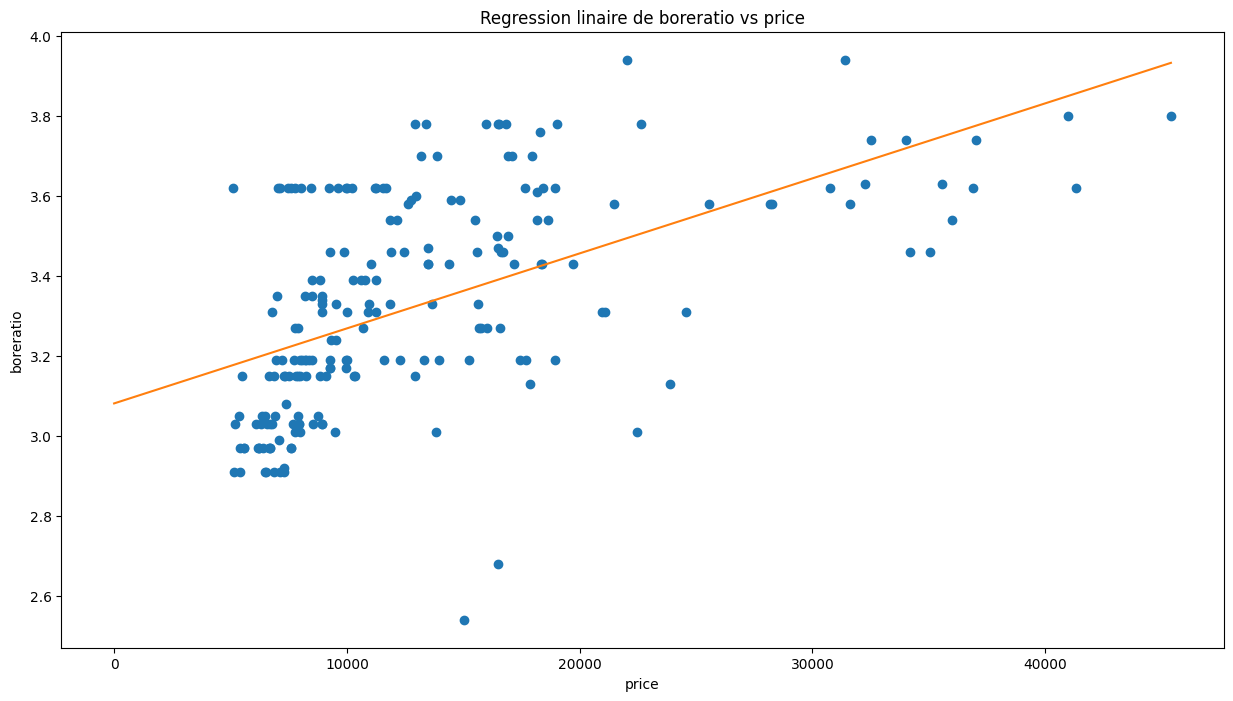

<Figure size 1000x700 with 0 Axes>

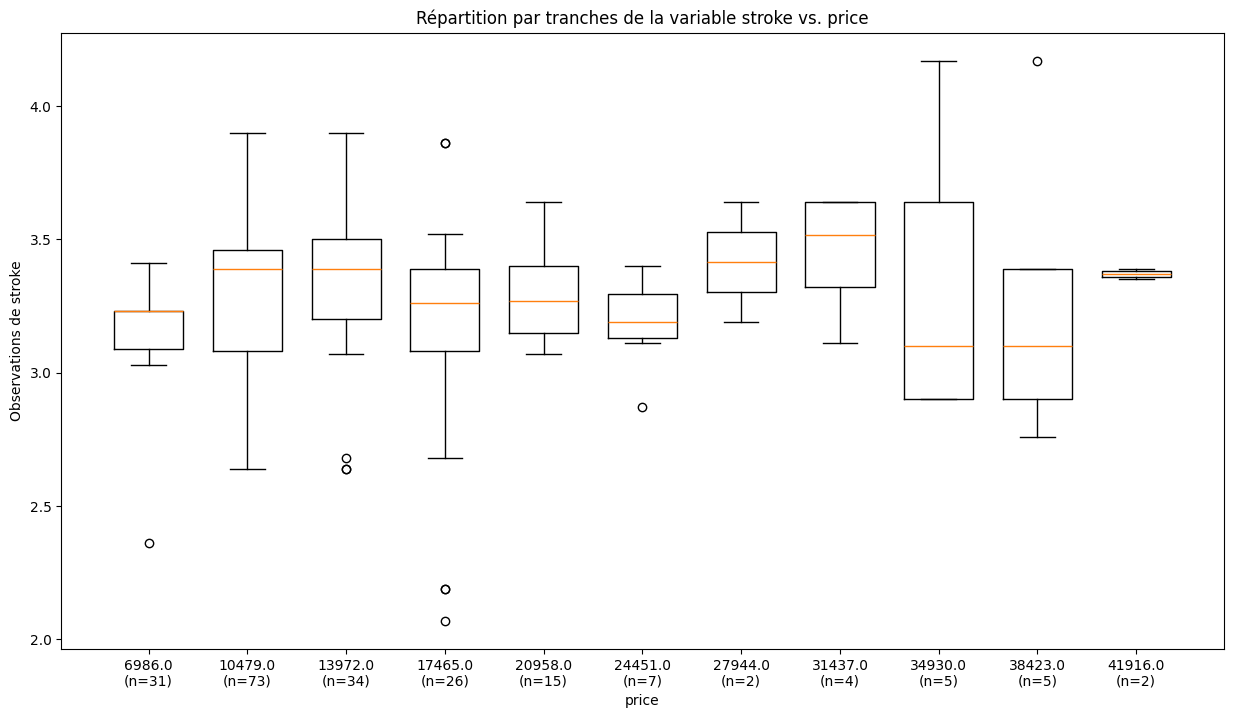

   pearson_statistic  pearson_pvalue  correlation         a         b
0           0.079443        0.257514     0.079443  0.000003  3.214011


----------------------------------------------------------------------------------------------------




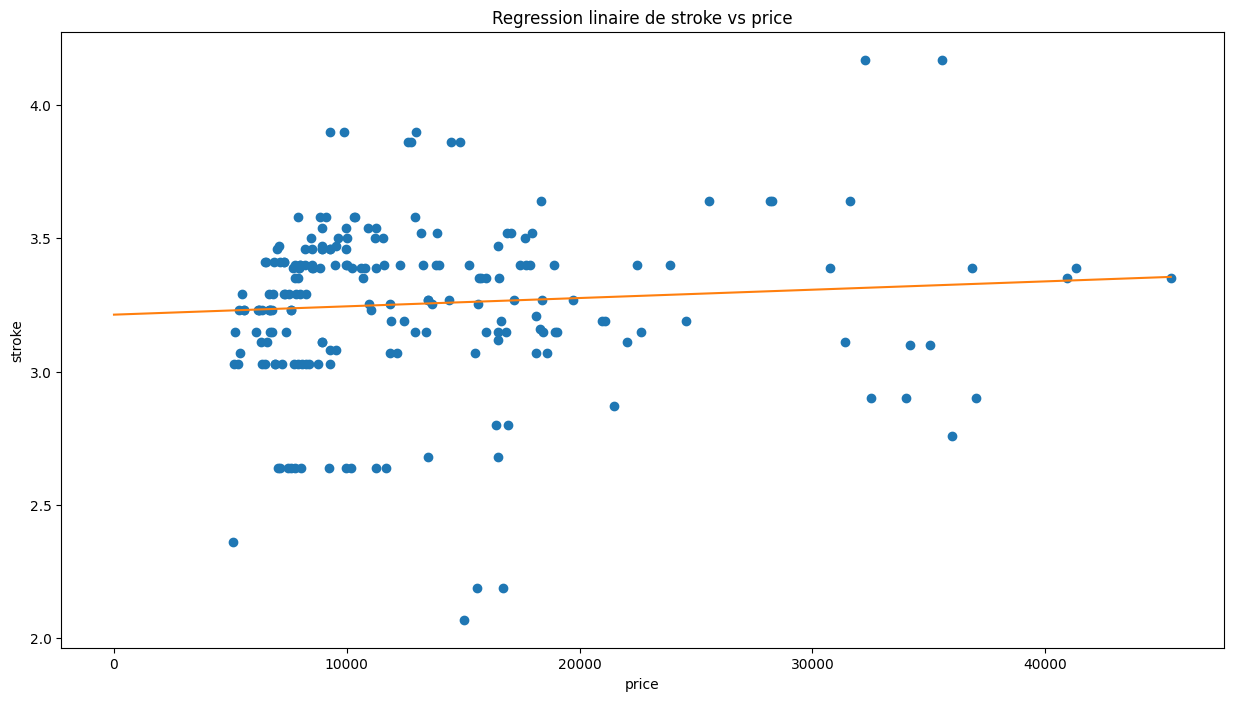

<Figure size 1000x700 with 0 Axes>

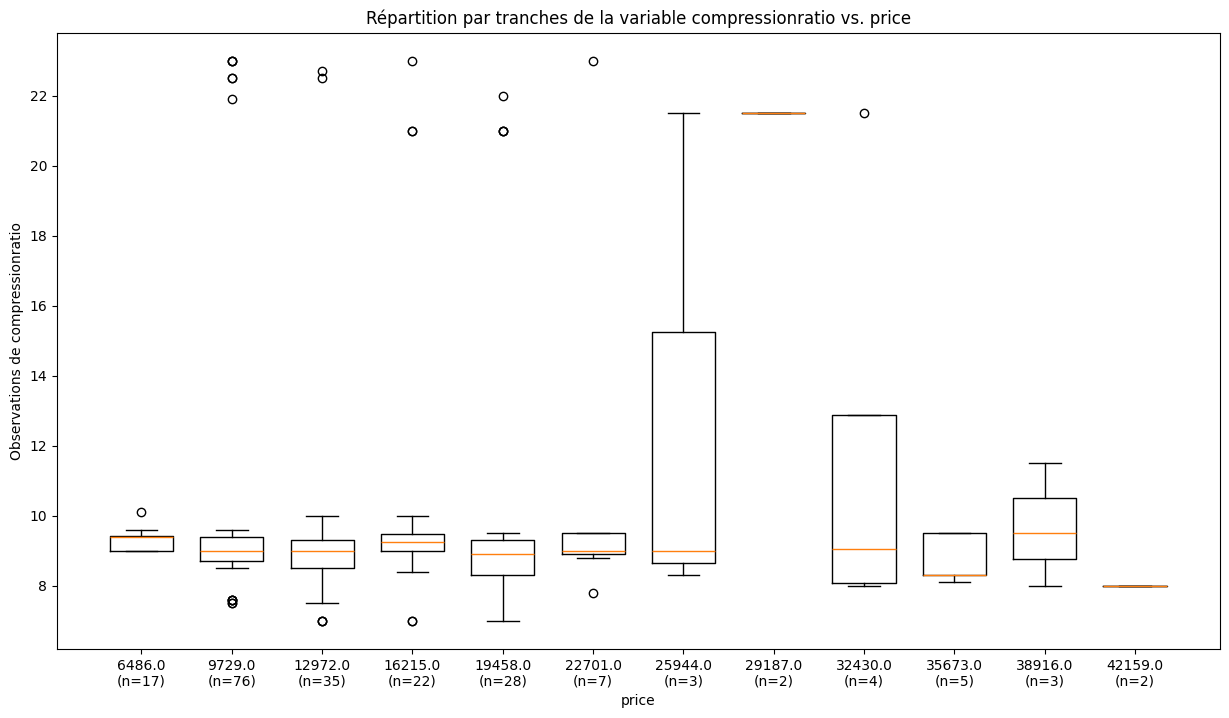

   pearson_statistic  pearson_pvalue  correlation         a         b
0           0.067984        0.332772     0.067984  0.000034  9.693767


----------------------------------------------------------------------------------------------------




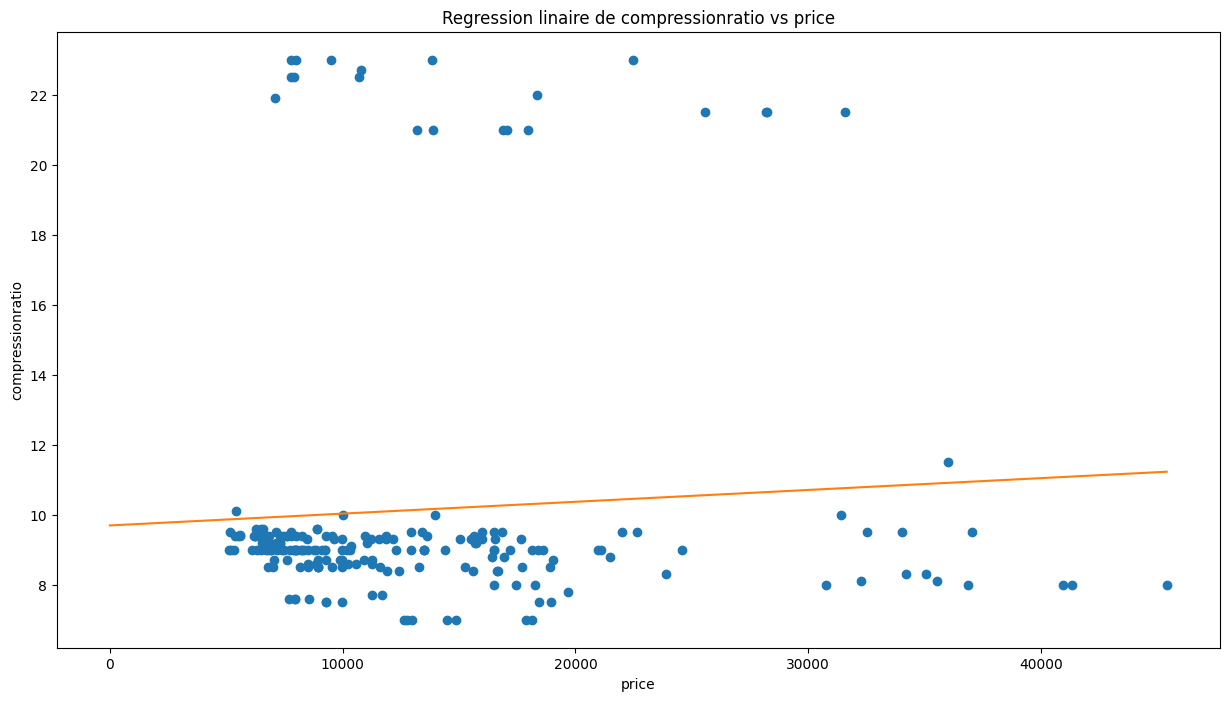

<Figure size 1000x700 with 0 Axes>

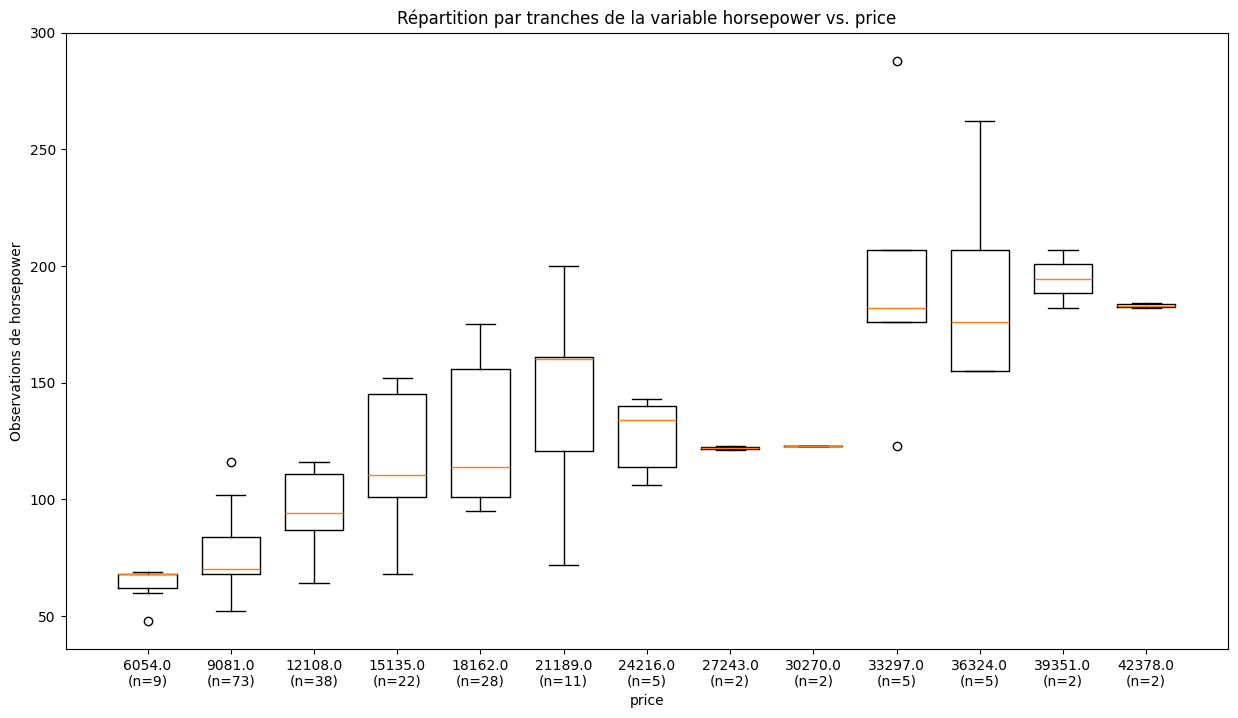

   pearson_statistic  pearson_pvalue  correlation      a          b
0           0.808139    1.483437e-48     0.808139  0.004  51.007294


----------------------------------------------------------------------------------------------------




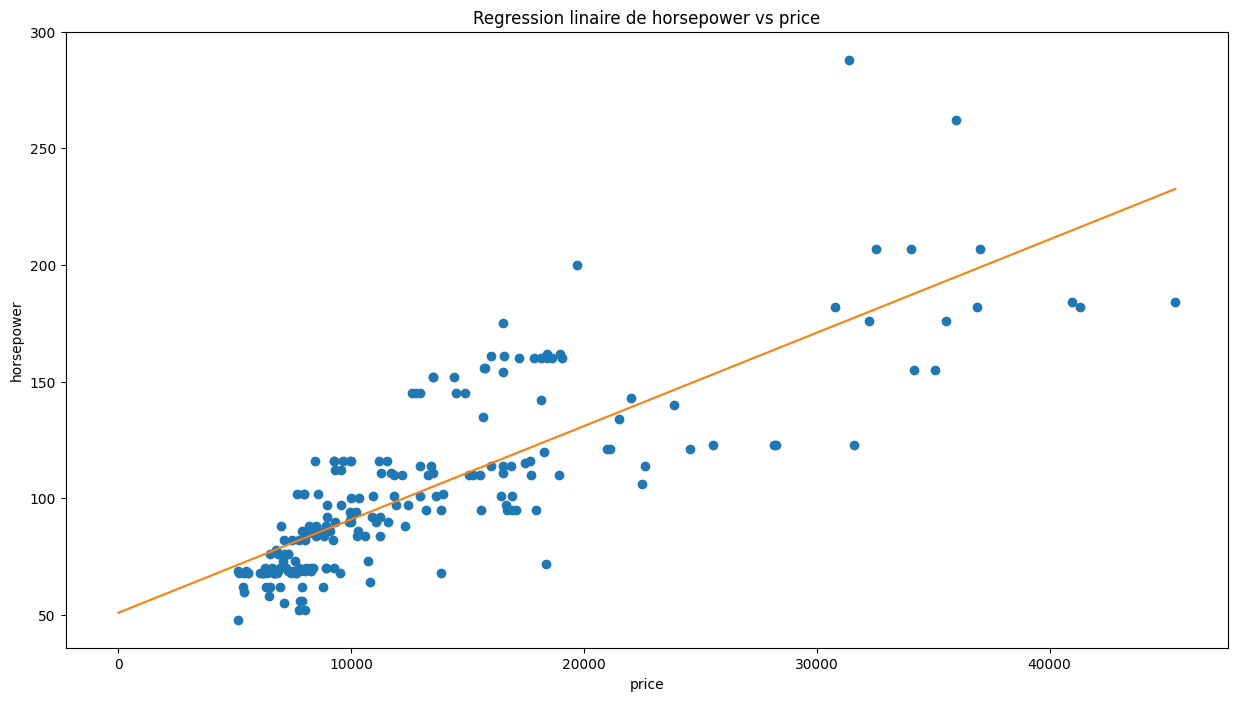

<Figure size 1000x700 with 0 Axes>

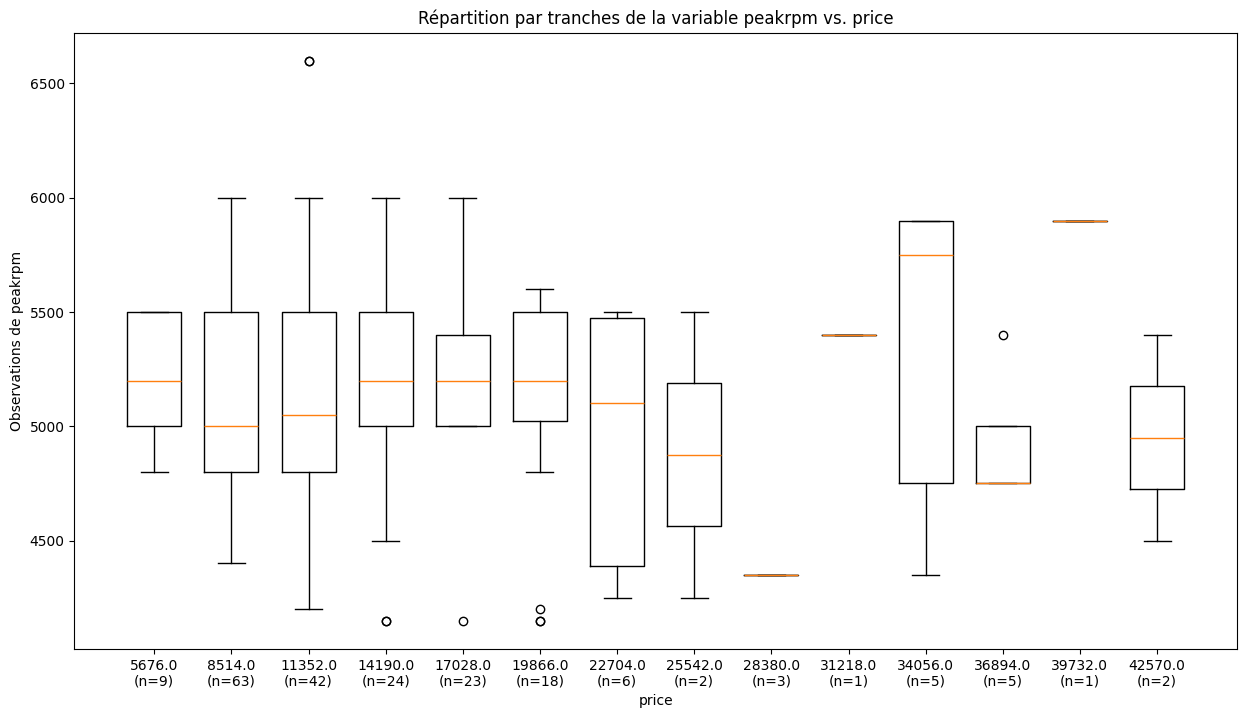

   pearson_statistic  pearson_pvalue  correlation         a            b
0          -0.085267        0.224141    -0.085267 -0.005091  5192.713617


----------------------------------------------------------------------------------------------------




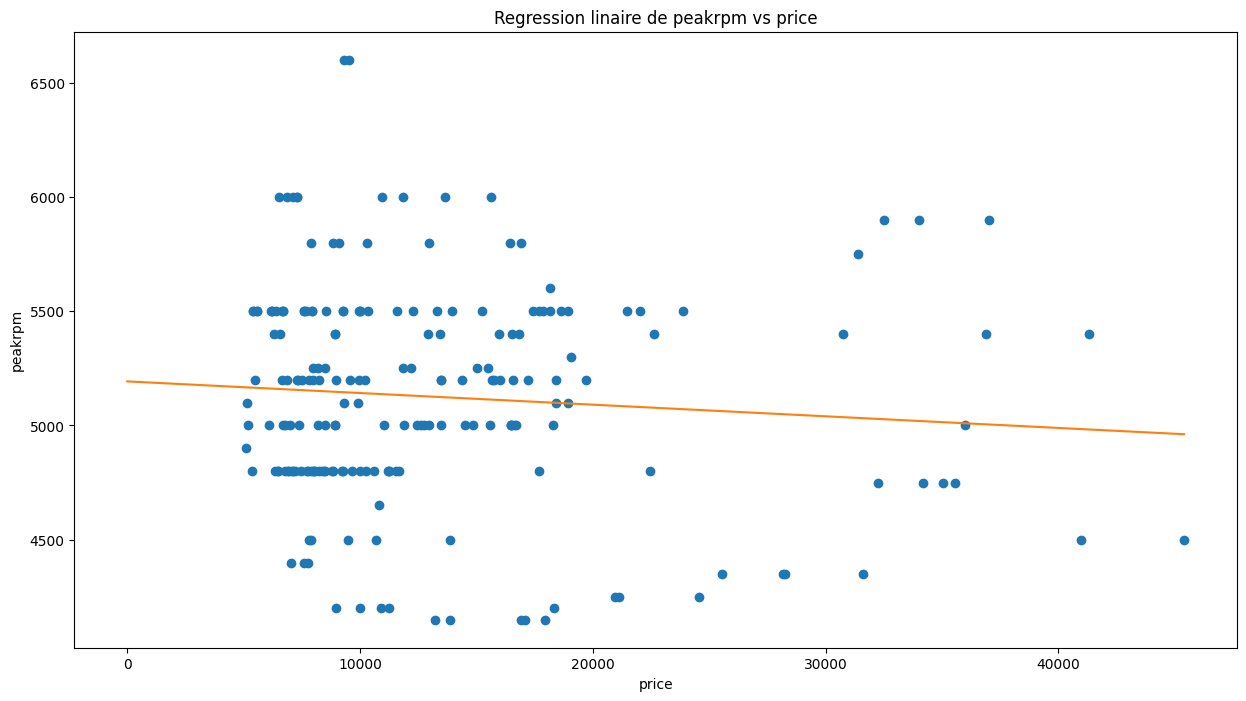

<Figure size 1000x700 with 0 Axes>

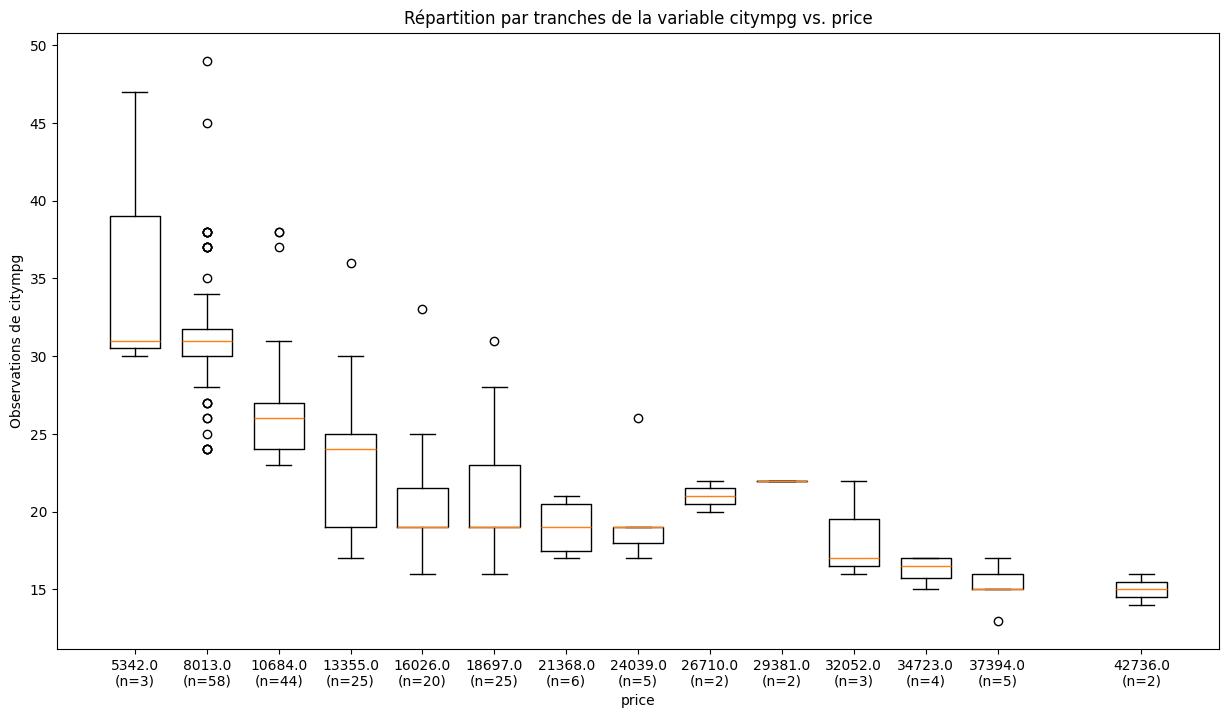

   pearson_statistic  pearson_pvalue  correlation         a          b
0          -0.685751    7.978684e-30    -0.685751 -0.000562  32.675286


----------------------------------------------------------------------------------------------------




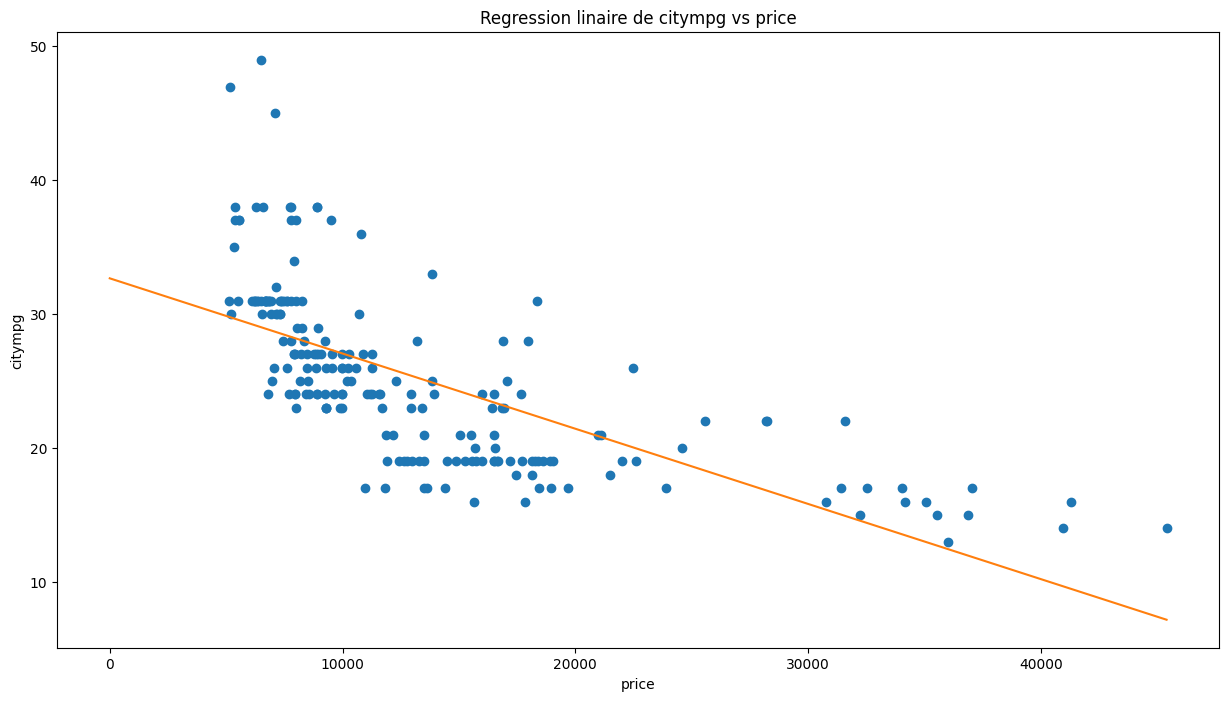

<Figure size 1000x700 with 0 Axes>

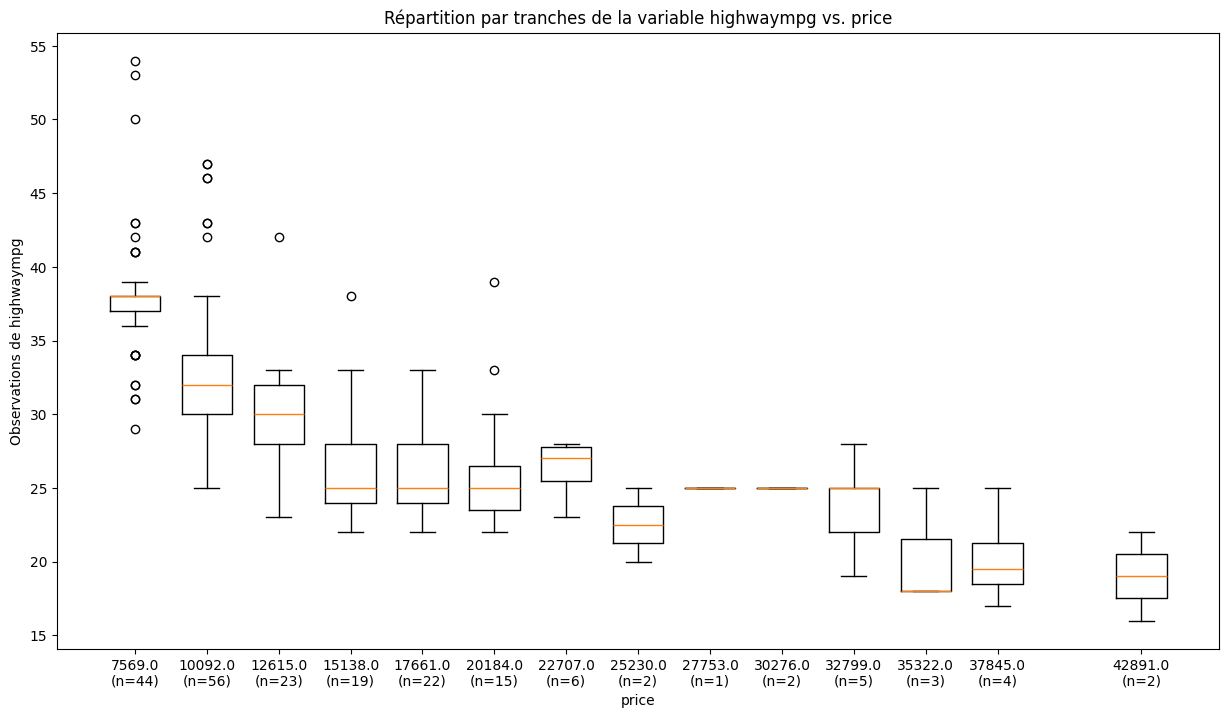

   pearson_statistic  pearson_pvalue  correlation         a         b
0          -0.697599    3.230681e-31    -0.697599 -0.000601  38.73497


----------------------------------------------------------------------------------------------------




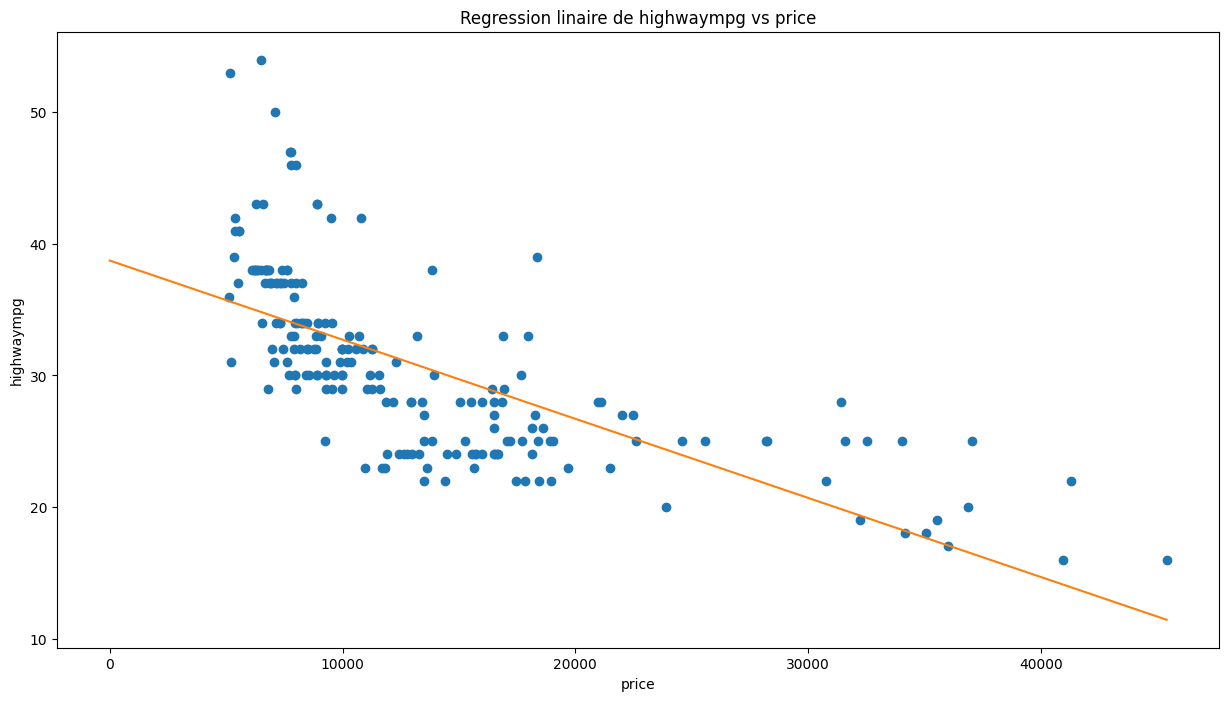

In [20]:
data.showBoxPlotNumerical(columns=variable_quantitatives, target=target[0], count_box=3, show_table=True)

#### Représentation des variables qualitatives par rapport à la variable cible 'price"

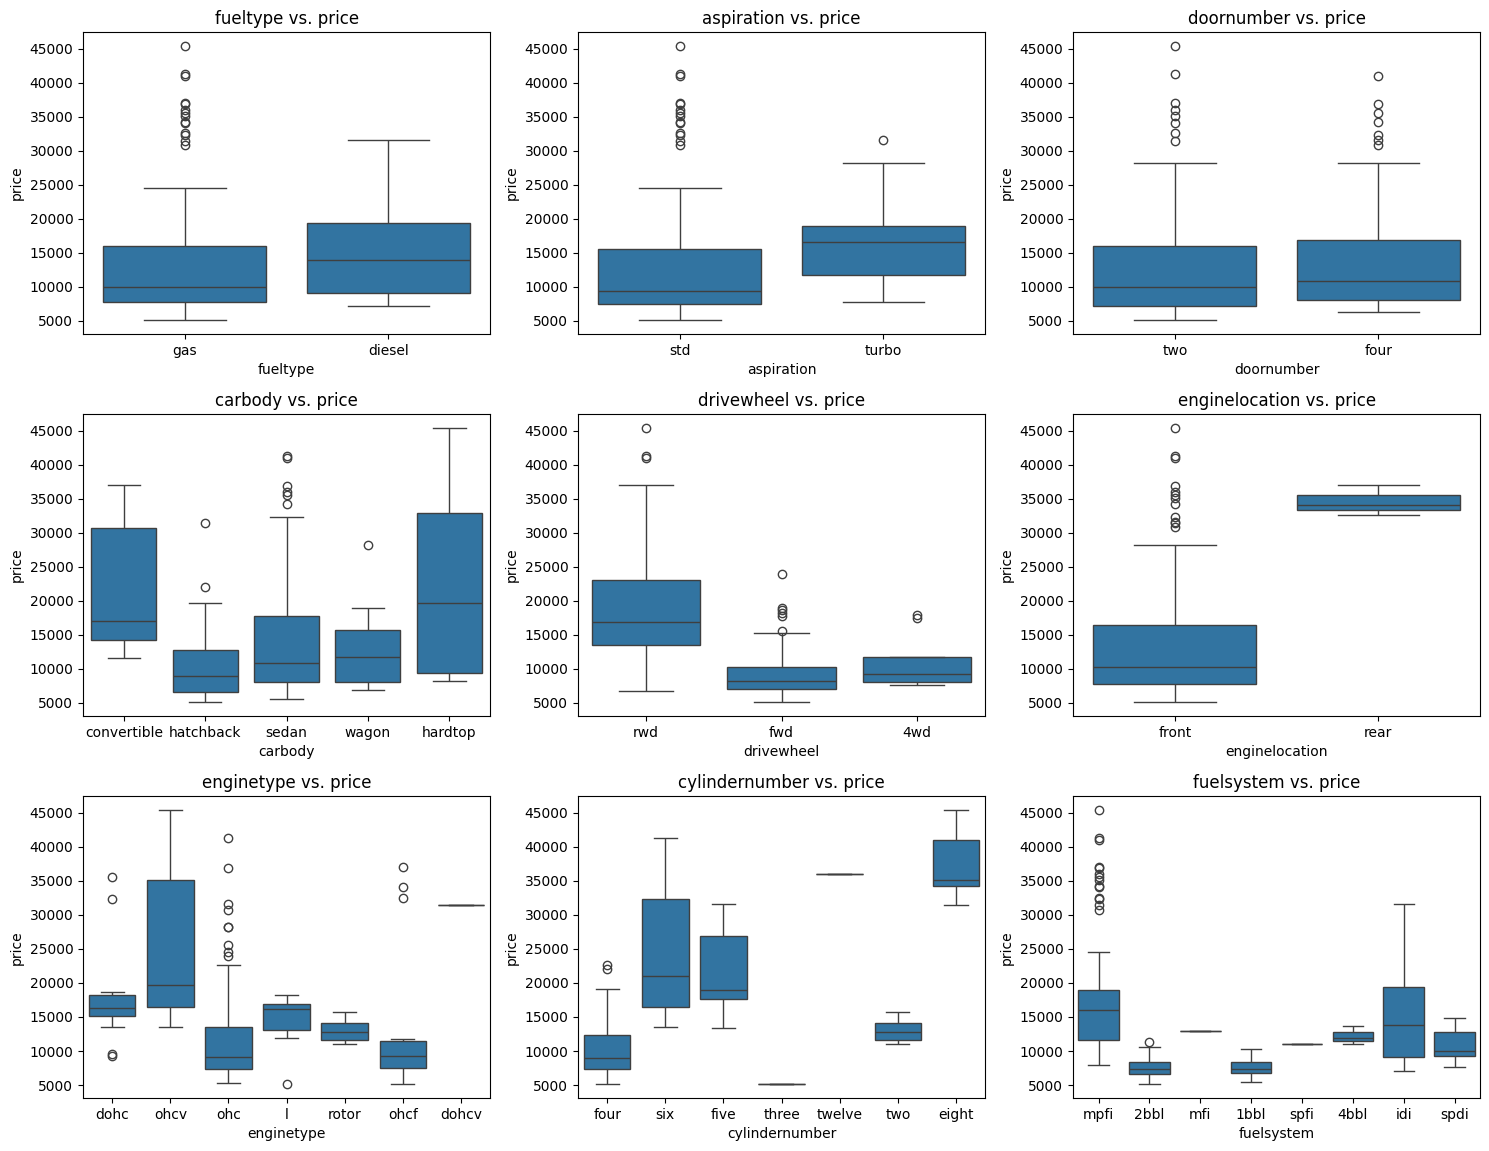

In [21]:
data.showGridBoxplot(columns=variable_qualitatives, y=target[0],excludes=['CarName'])

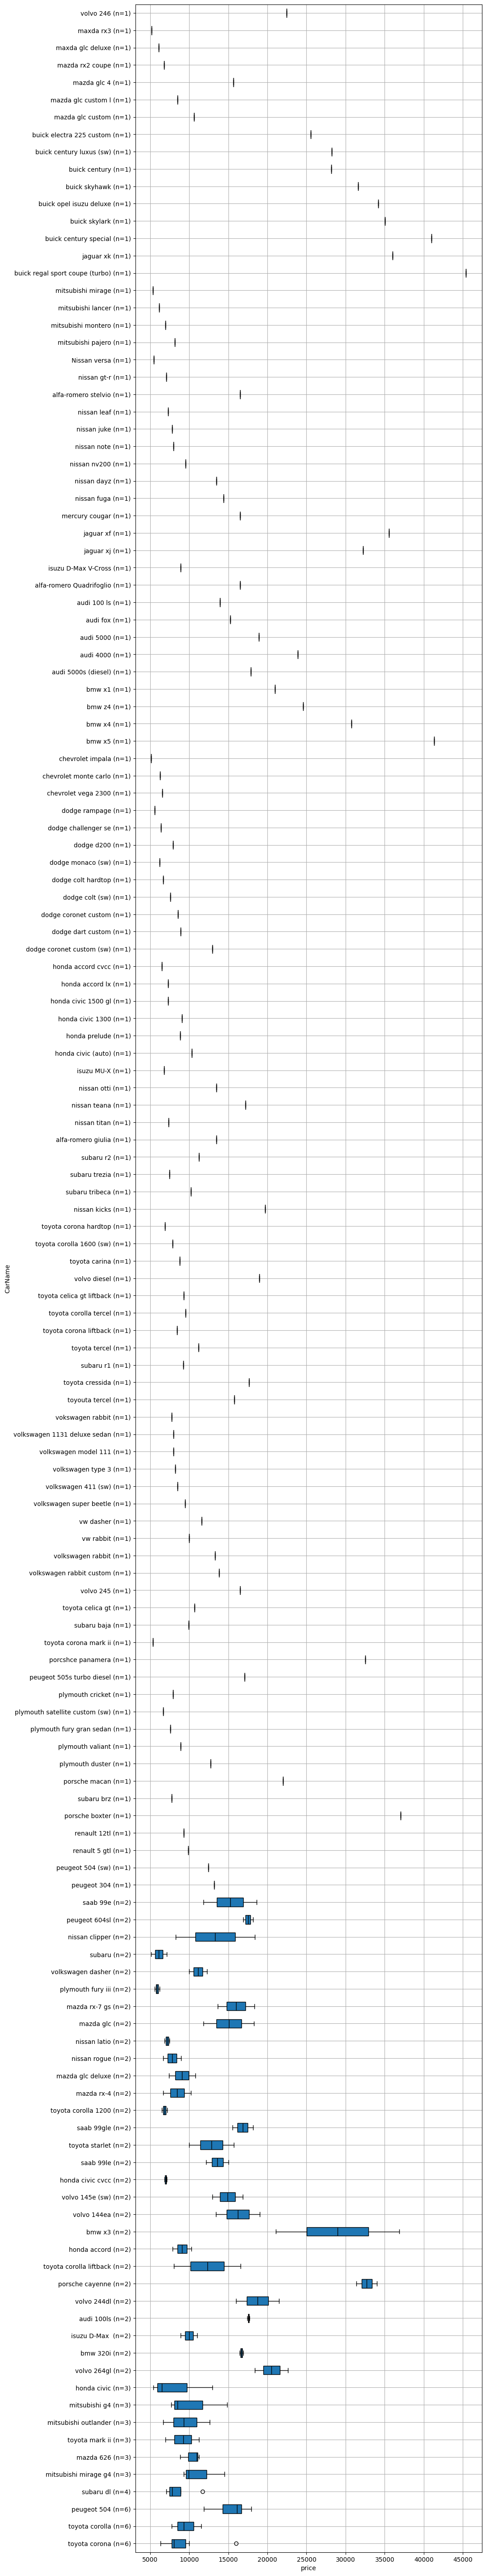

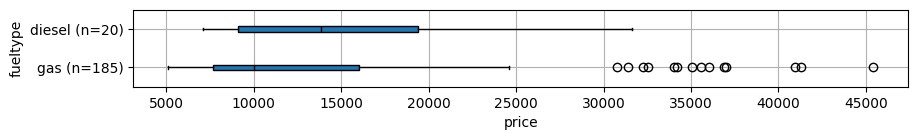

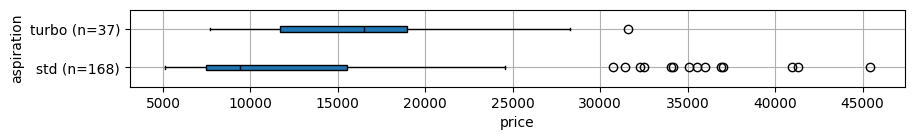

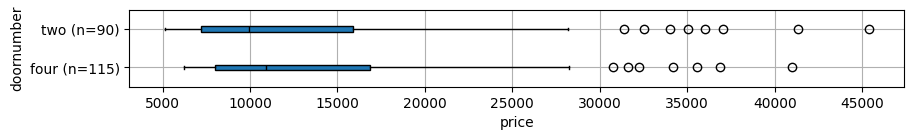

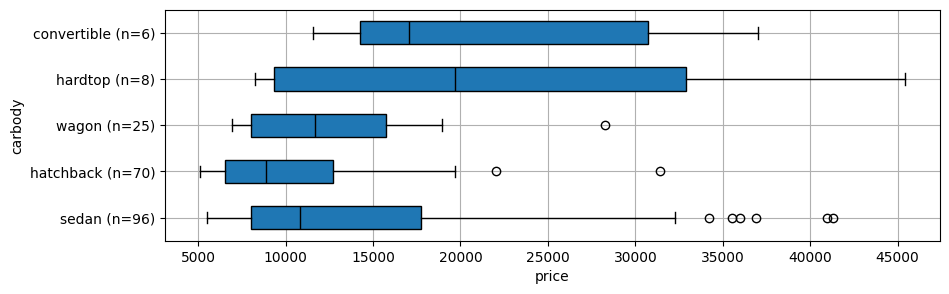

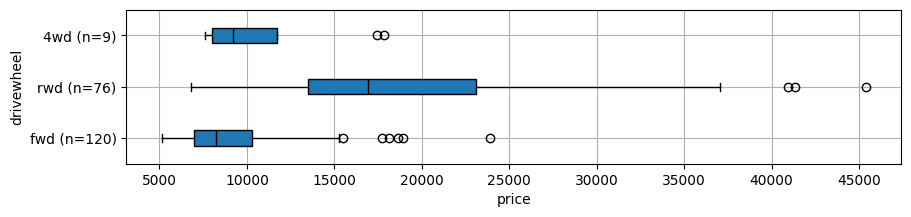

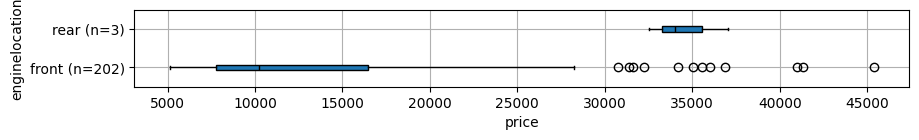

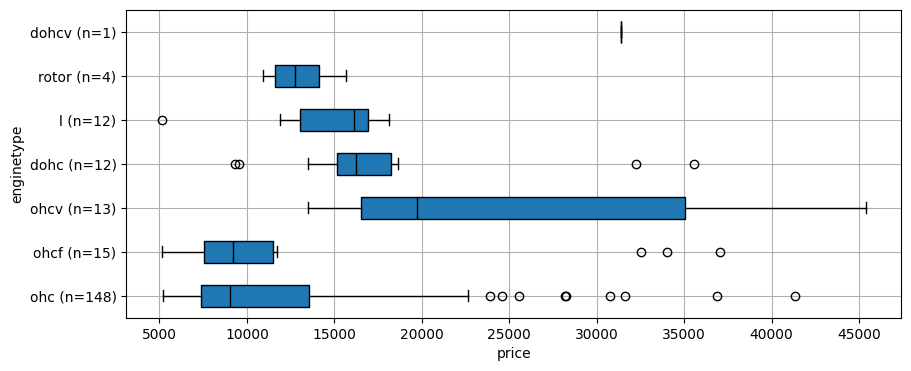

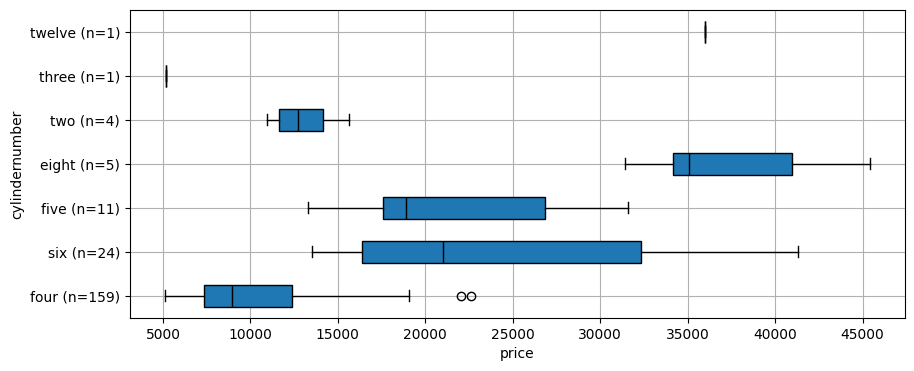

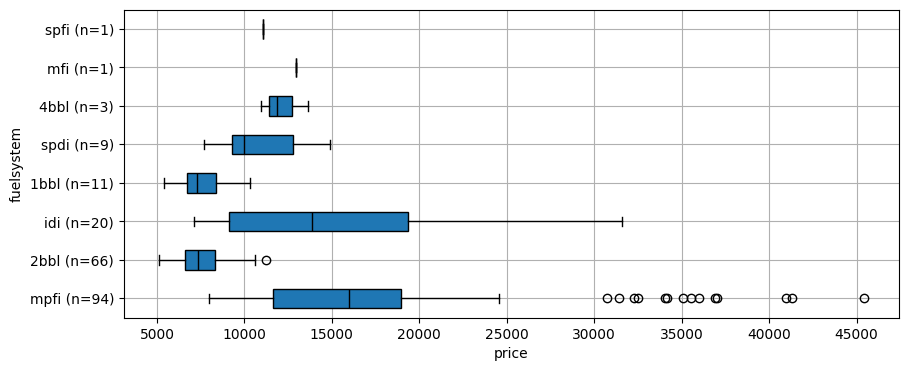

In [22]:
data.showBoxplotCategoricalNumerical(columns=variable_qualitatives, target=target[0])

<div class="alert alert-info" >On constate quelques outliers sur nos différentes variables.</div>

#### Visualisation de la corélation entre les variables quantitative et la variable cible "price"

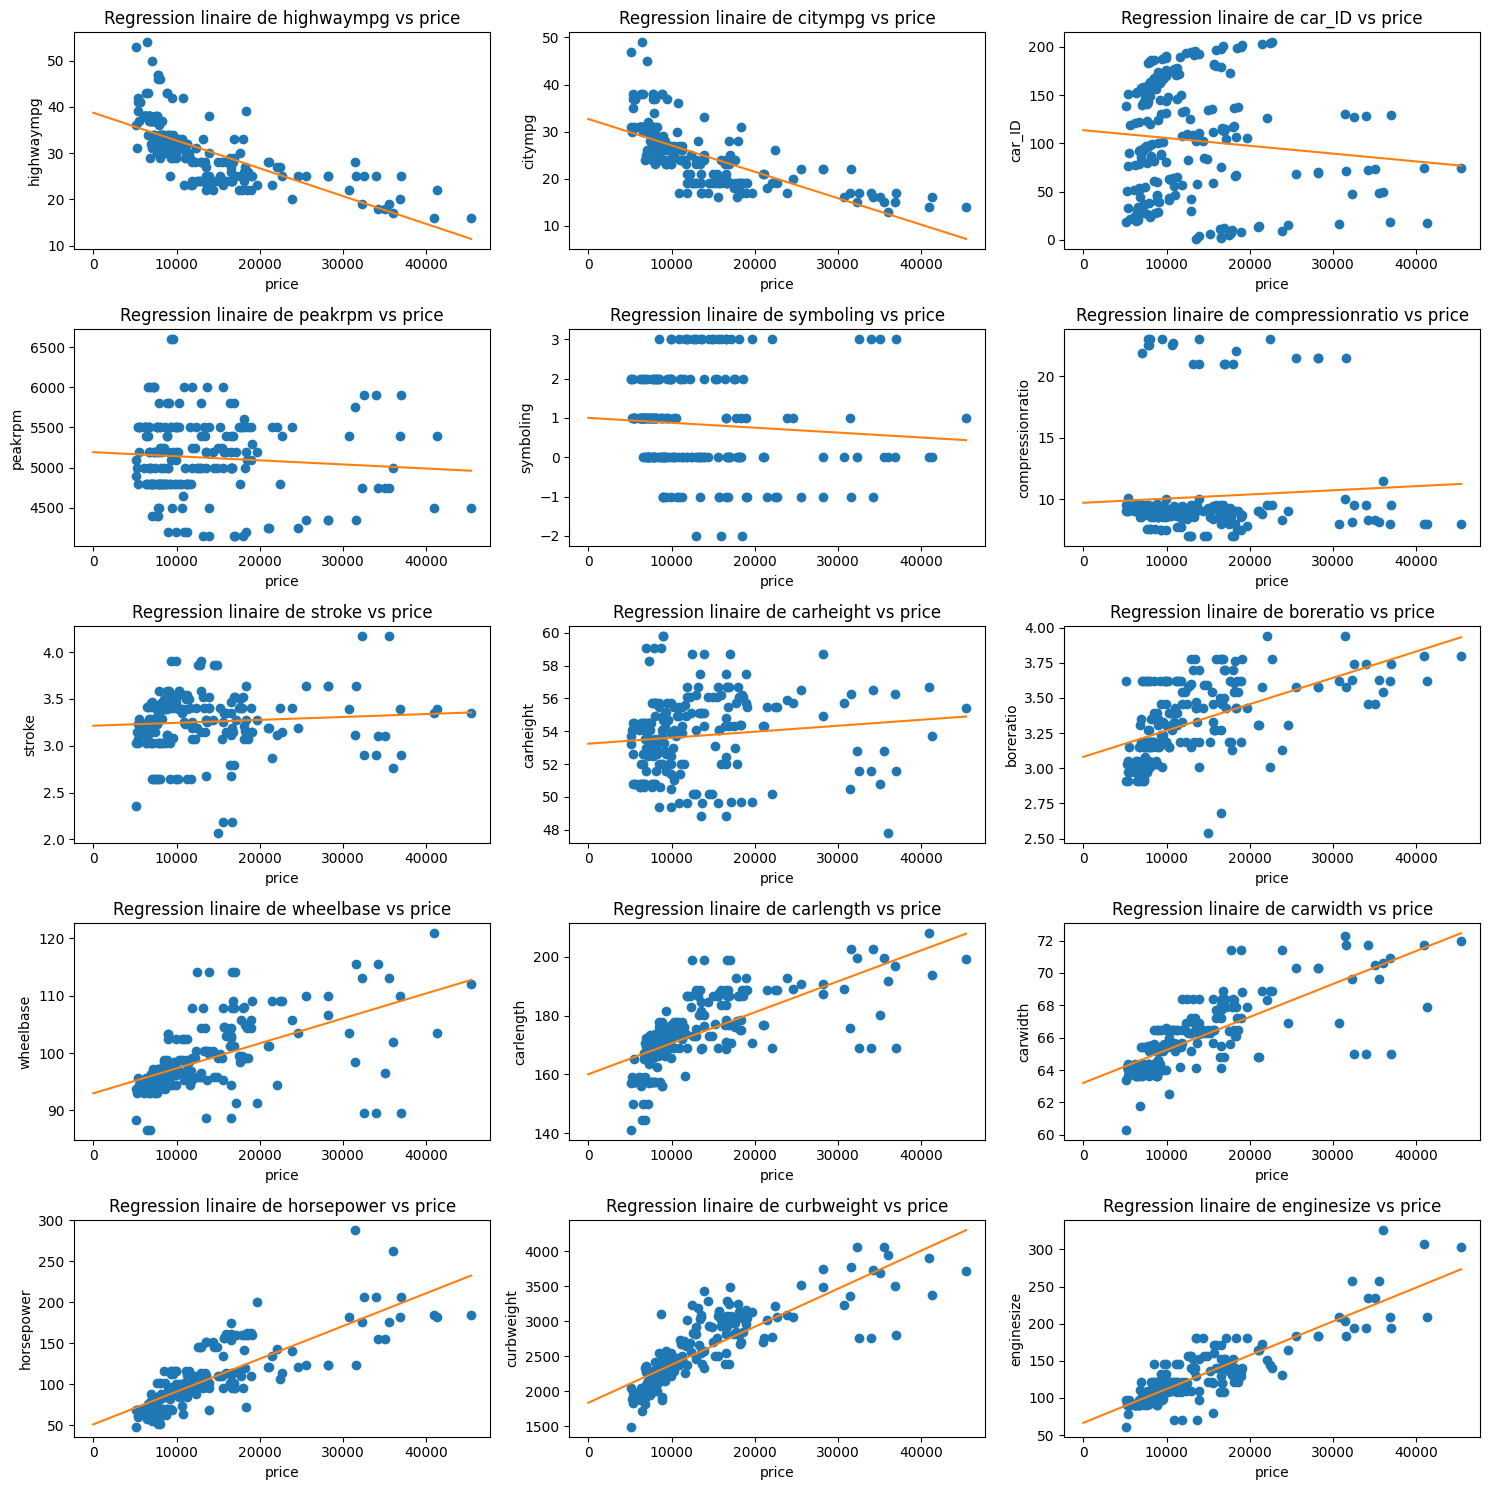

name  statistic        pvalue
14        highwaympg  -0.697599  3.230681e-31
13           citympg  -0.685751  7.978684e-30
0             car_ID  -0.109093  1.194518e-01
12           peakrpm  -0.085267  2.241412e-01
1          symboling  -0.079978  2.543118e-01
10  compressionratio   0.067984  3.327724e-01
9             stroke   0.079443  2.575137e-01
5          carheight   0.119336  8.832832e-02
8          boreratio   0.553173  7.907922e-18
2          wheelbase   0.577816  1.182820e-19
3          carlength   0.682920  1.678707e-29
4           carwidth   0.759325  9.627438e-40
11        horsepower   0.808139  1.483437e-48
6         curbweight   0.835305  1.214445e-54
7         enginesize   0.874145  1.354764e-65

In [23]:
data.getCorrelationPearson(columns=variable_quantitatives, target=target[0], with_grid=True)

In [24]:
data.getCorrelationCategoricalNumerical(columns=variable_qualitatives, target=target[0])

name           SCT           SCE  rapport de corrélation
0         CarName  1.301964e+10  1.243317e+10                0.954955
1        fueltype  1.301964e+10  1.454053e+08                0.011168
2      aspiration  1.301964e+10  4.121724e+08                0.031658
3      doornumber  1.301964e+10  1.319520e+07                0.001013
4         carbody  1.301964e+10  1.801997e+09                0.138406
5      drivewheel  1.301964e+10  5.344065e+09                0.410462
6  enginelocation  1.301964e+10  1.374973e+09                0.105608
7      enginetype  1.301964e+10  2.880743e+09                0.221261
8  cylindernumber  1.301964e+10  8.275757e+09                0.635636
9      fuelsystem  1.301964e+10  4.651199e+09                0.357245

#### Analyse de corrélation entre variable quantitative

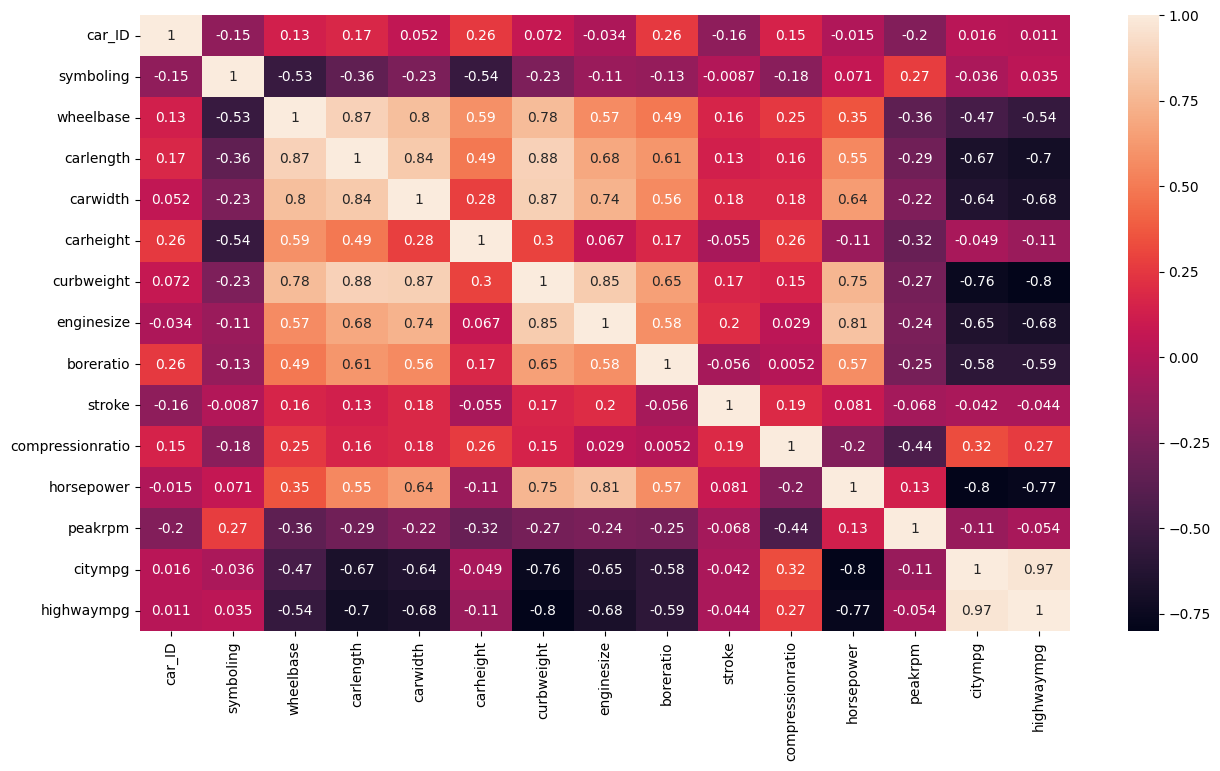

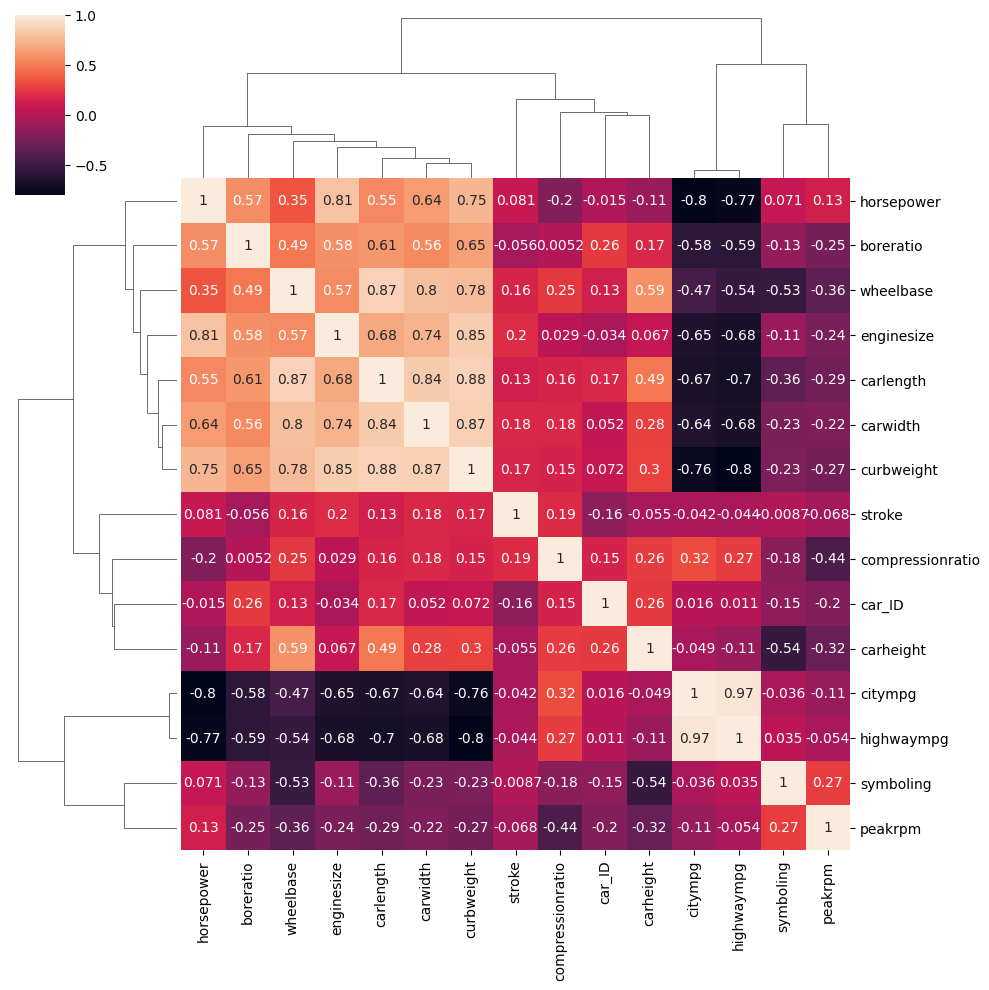

In [25]:
data.getHeatCorrelationNumerical(columns=variable_quantitatives, cluster=True)

<div class="alert alert-info" >On constate une forte corrélation pour les variables horsepower, curbweight, enginesize par rapport à la variable cible "price".<br />On constate également une forte anticorrélation pour les variables highwaympg, citympg par rapport à la variable cible "price". <br />
On peut faire le constat que plus un véhicule est économe en carburant, le prix augmente. De même que plus une voiture est puissante plus son prix sera élevé.</div>

#### Analyse de corrélation entre variable qualitative

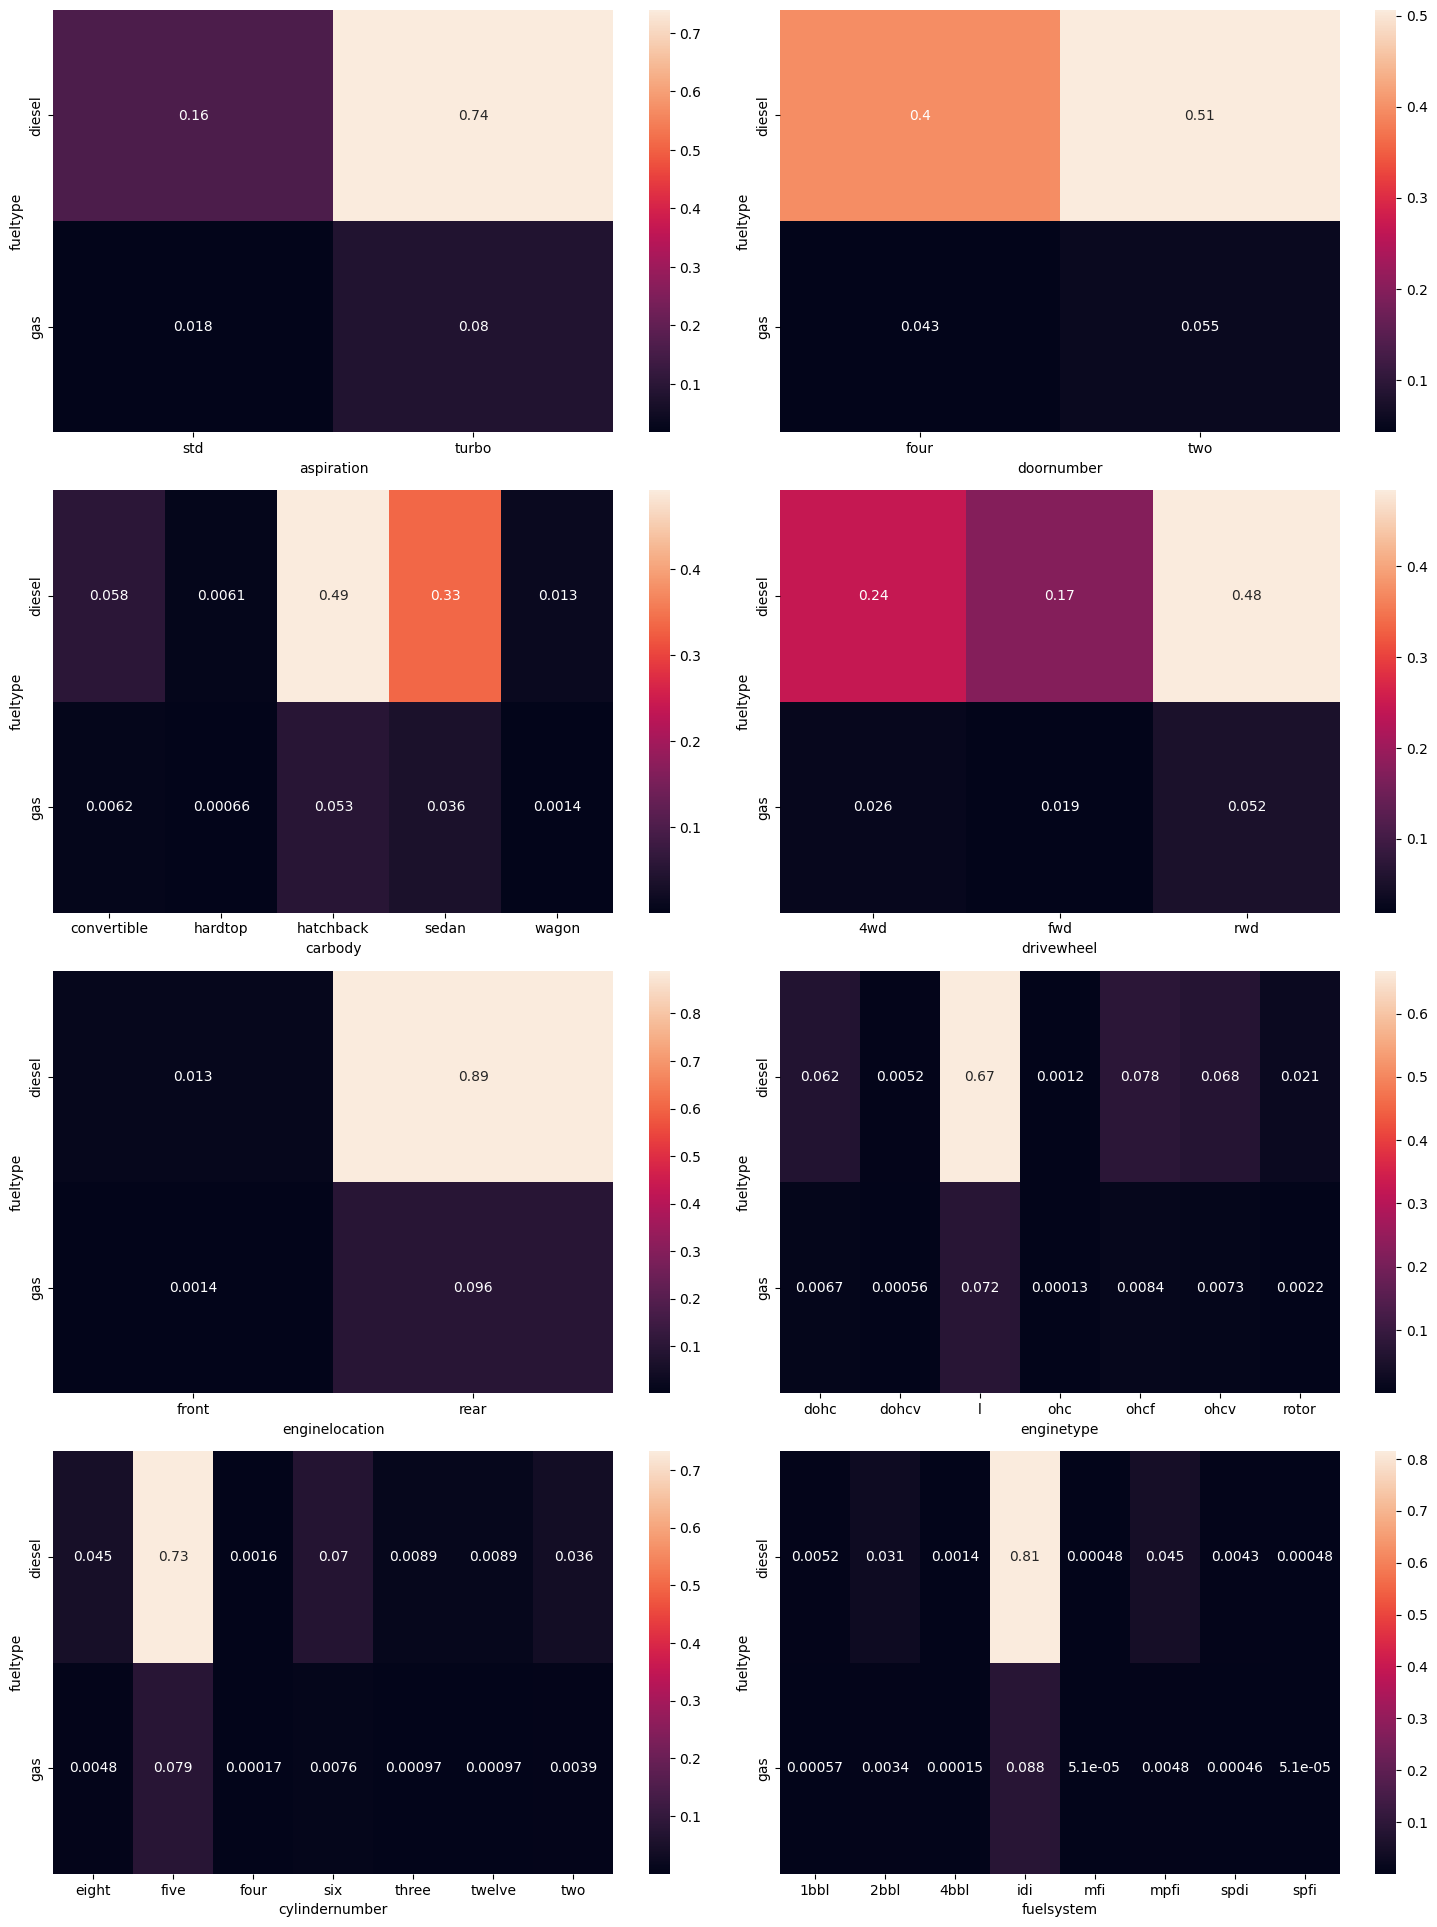



----------------------------------------------------------------------------------------------------




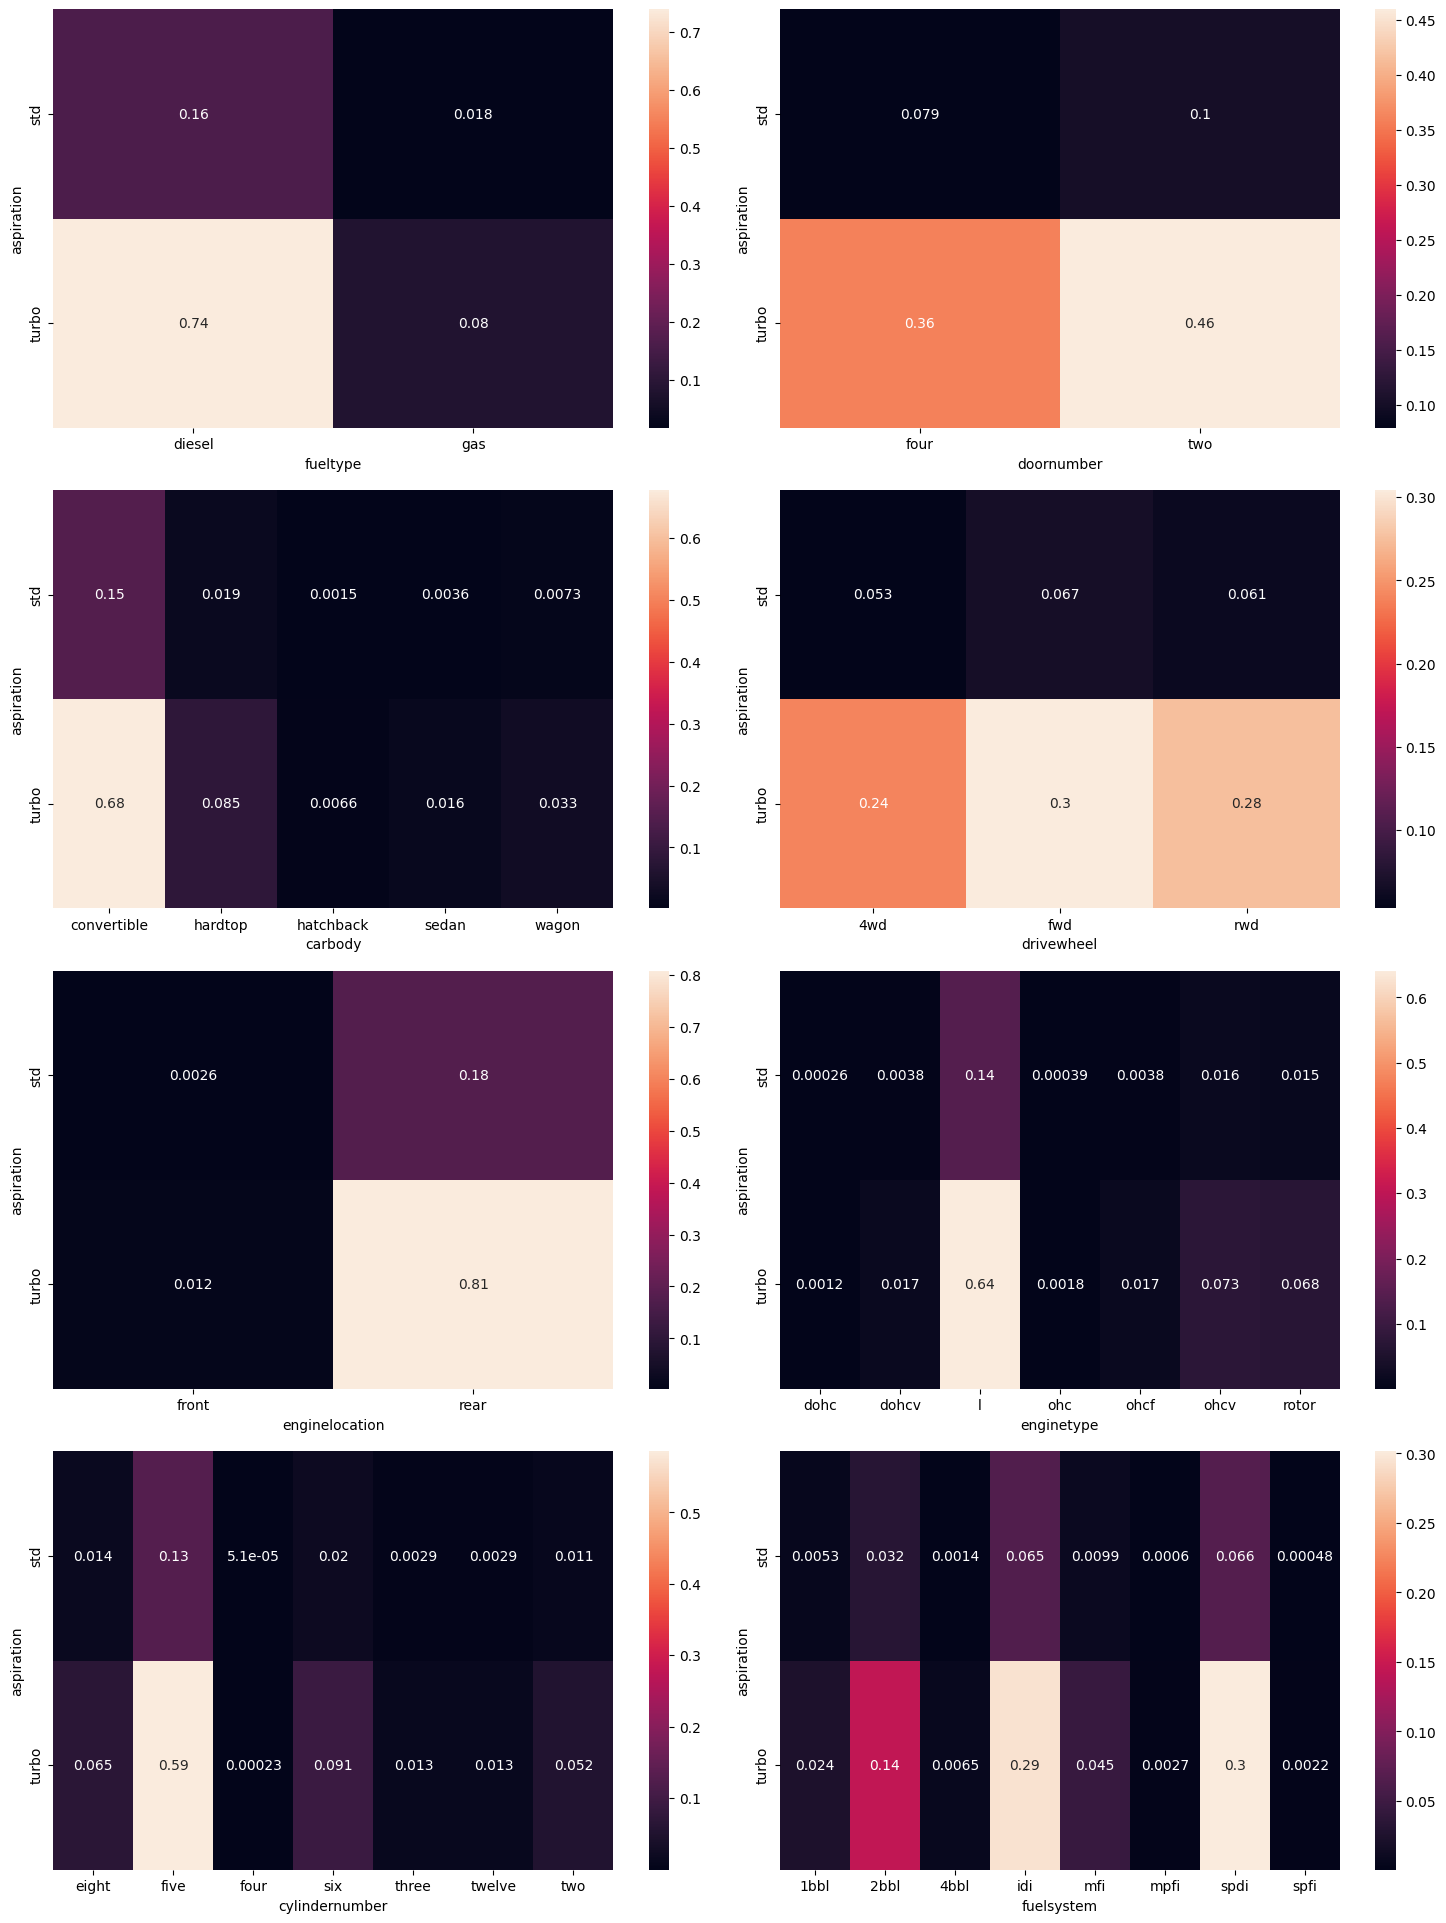



----------------------------------------------------------------------------------------------------




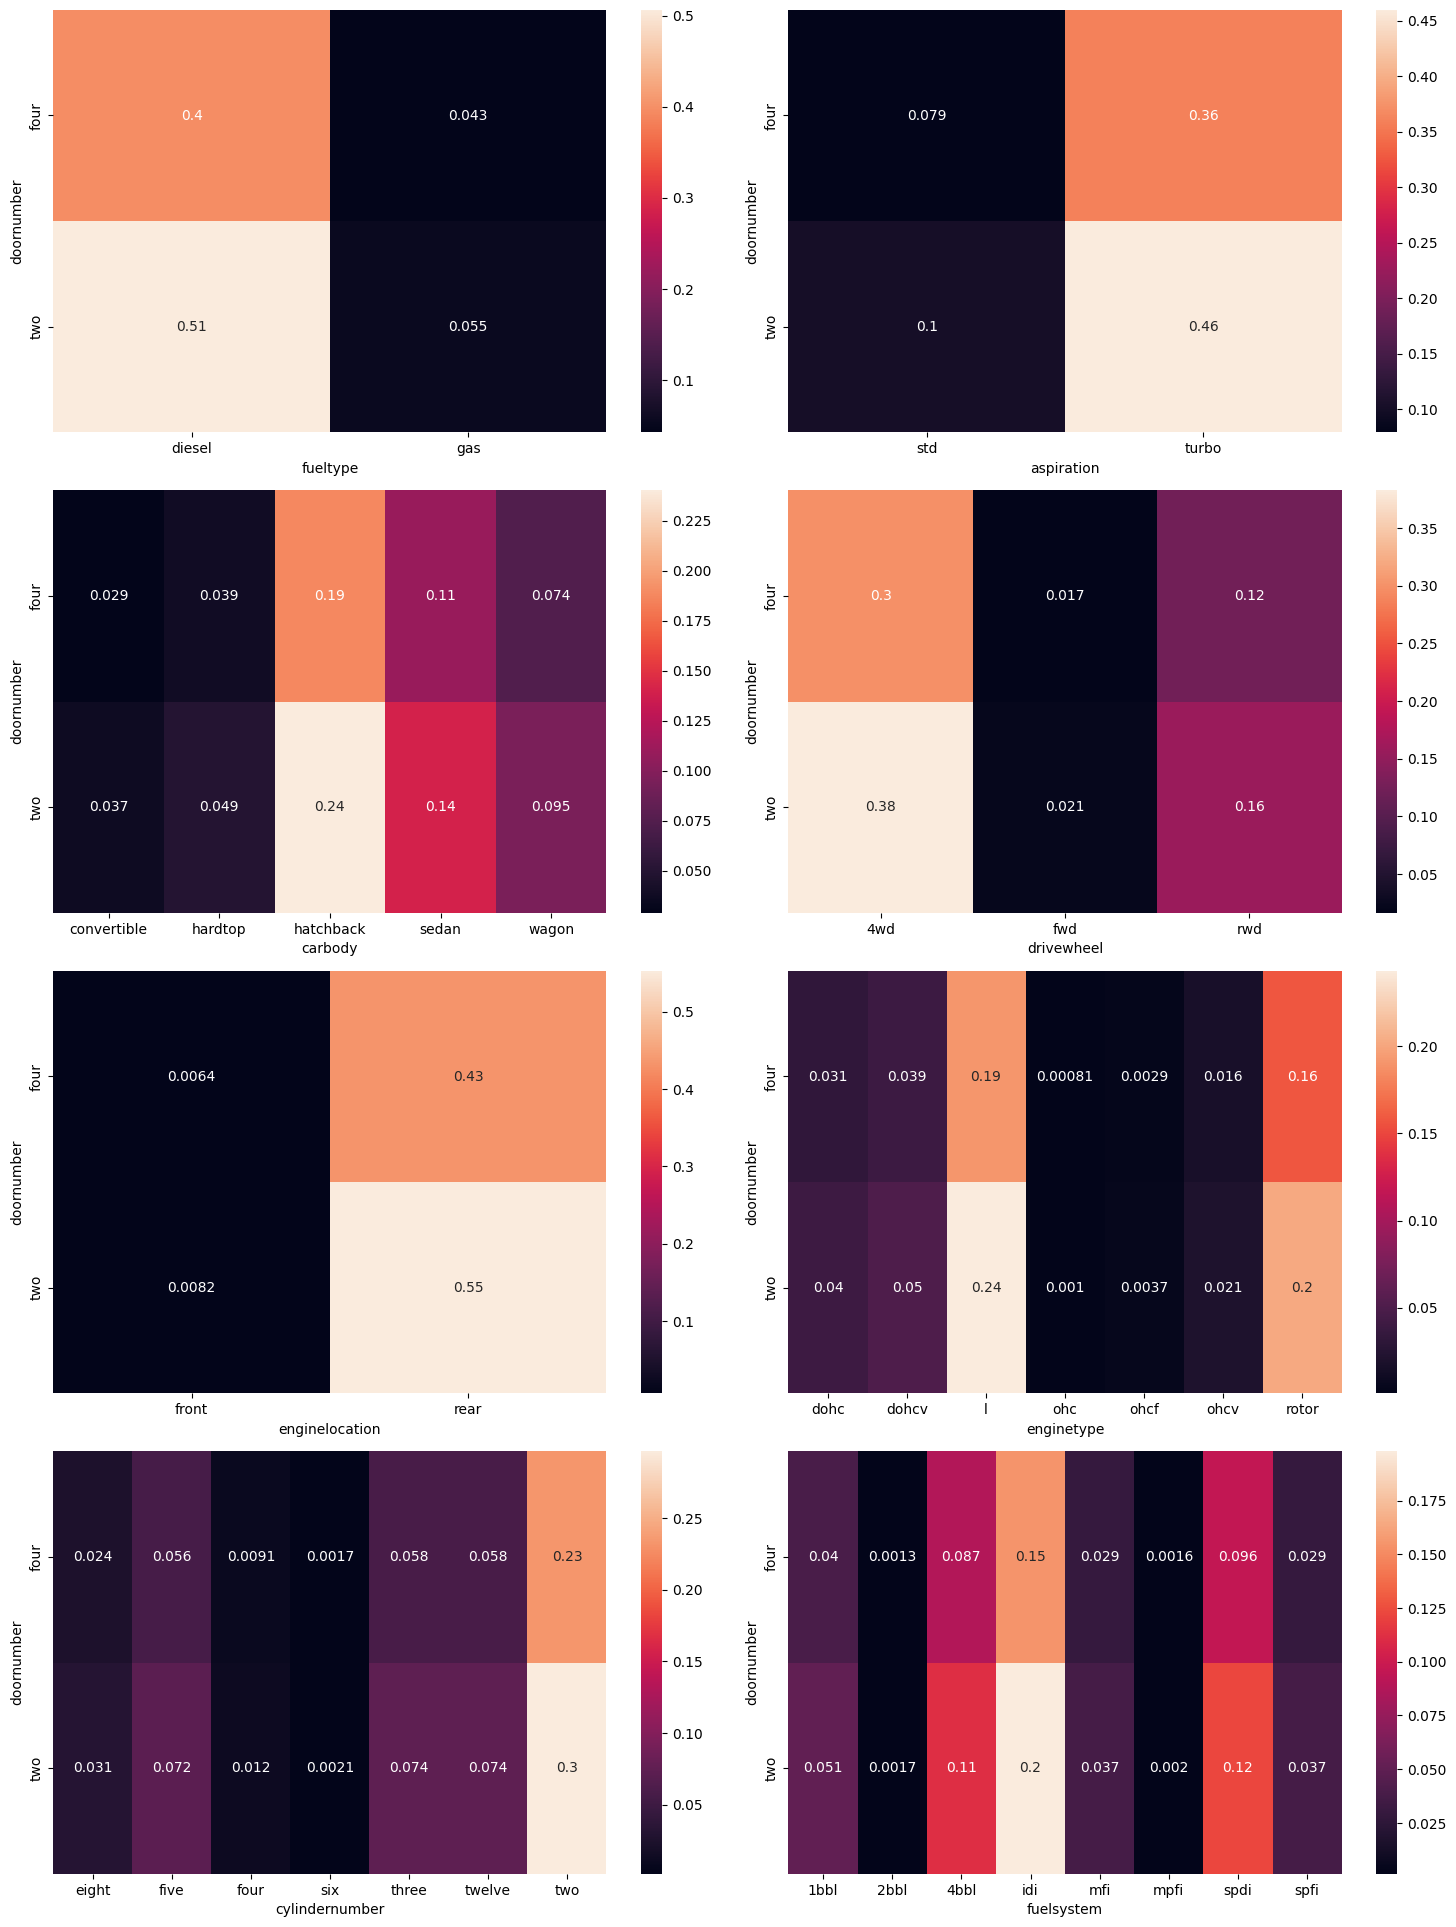



----------------------------------------------------------------------------------------------------




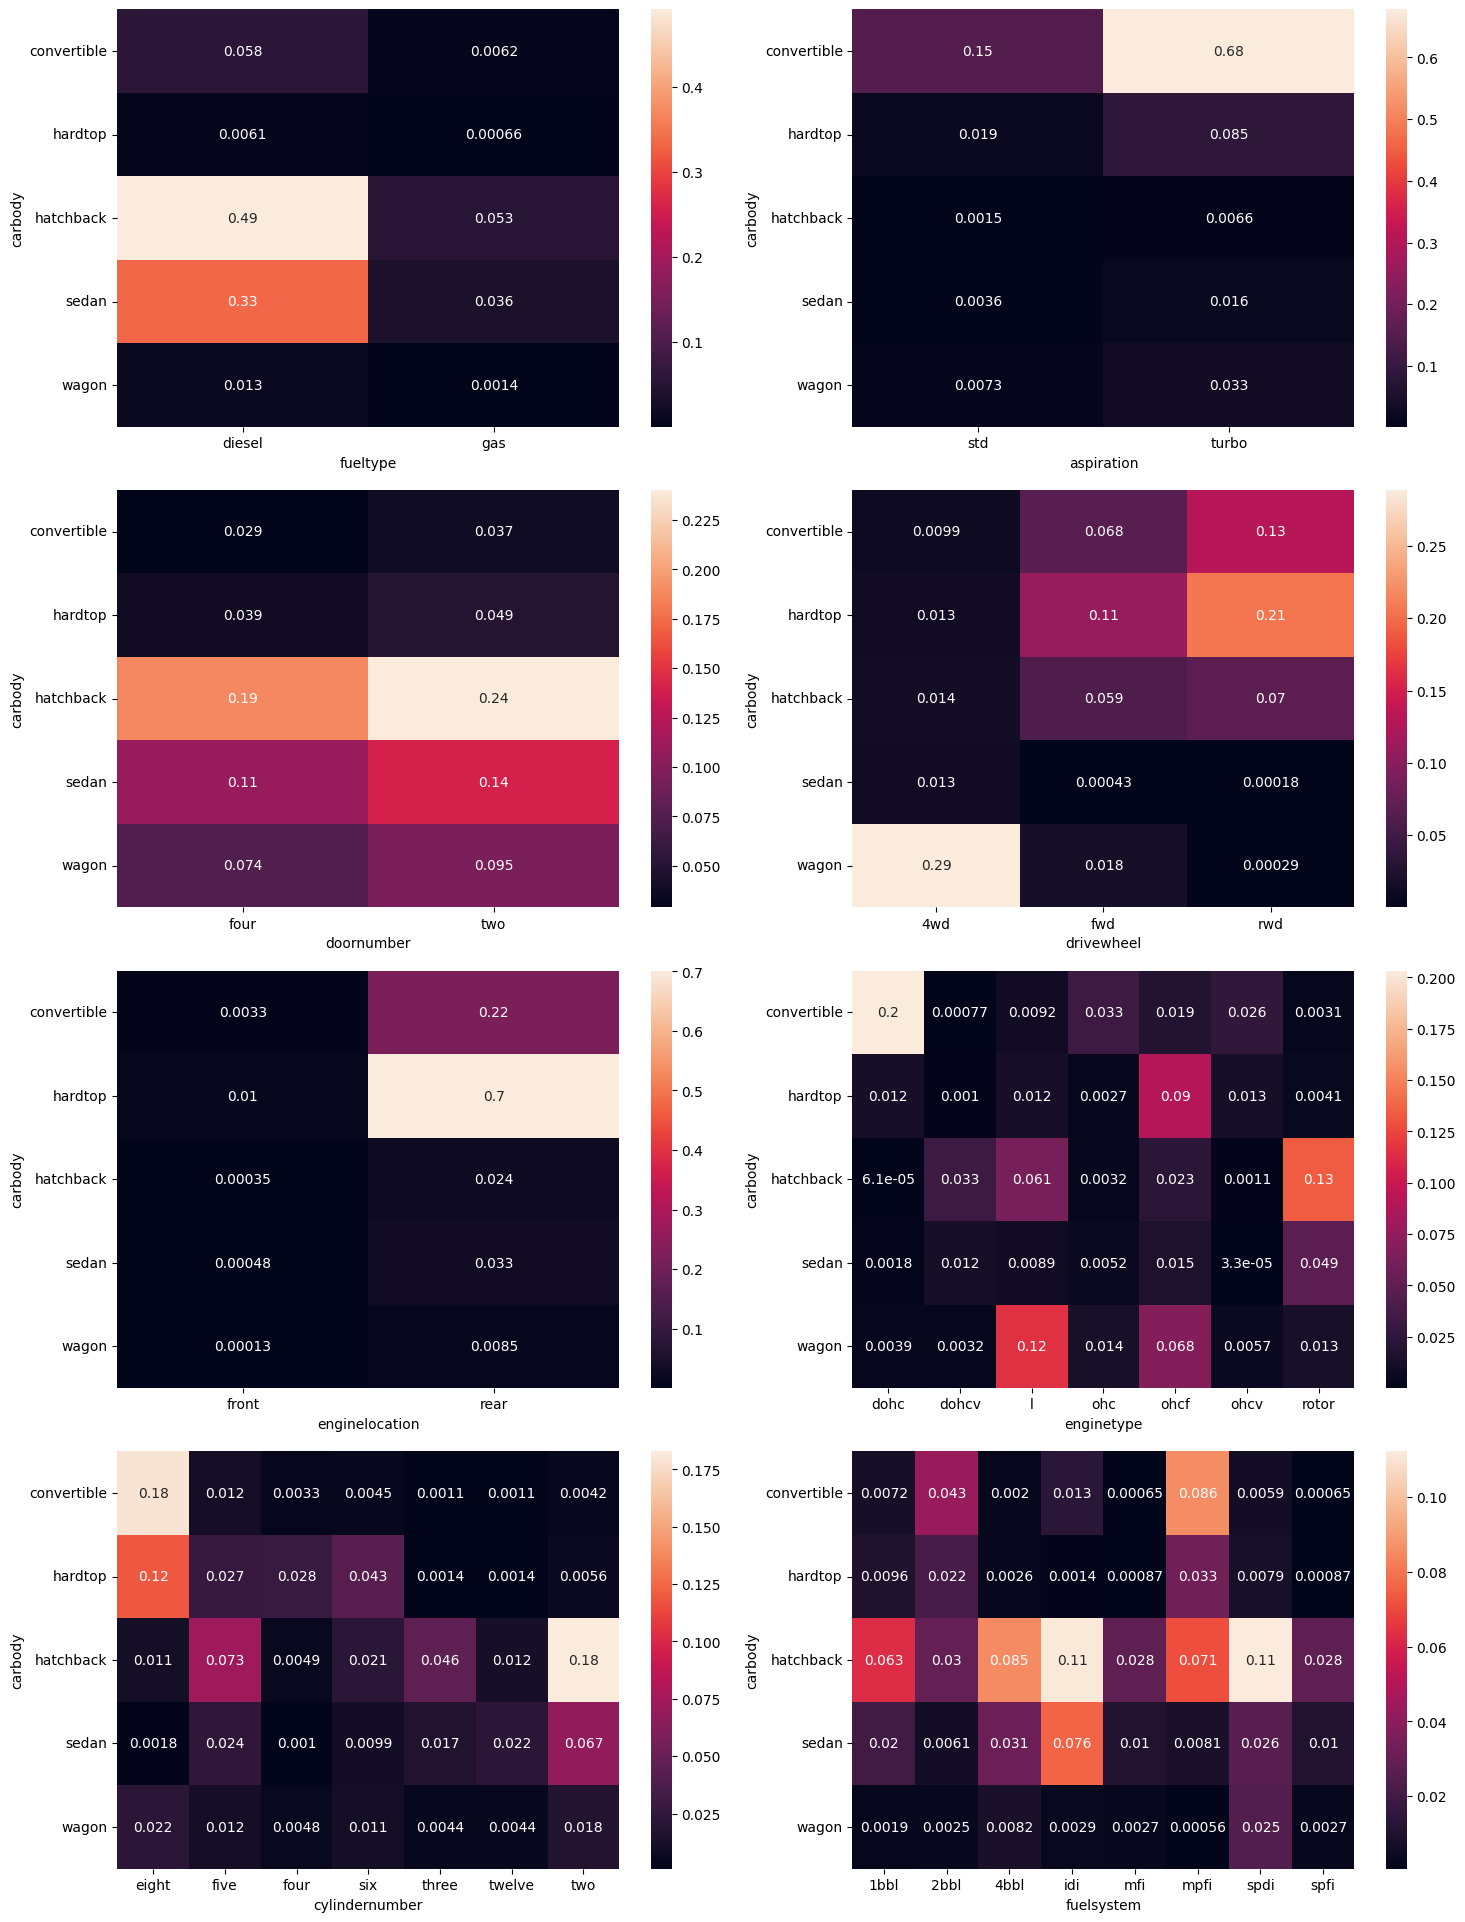



----------------------------------------------------------------------------------------------------




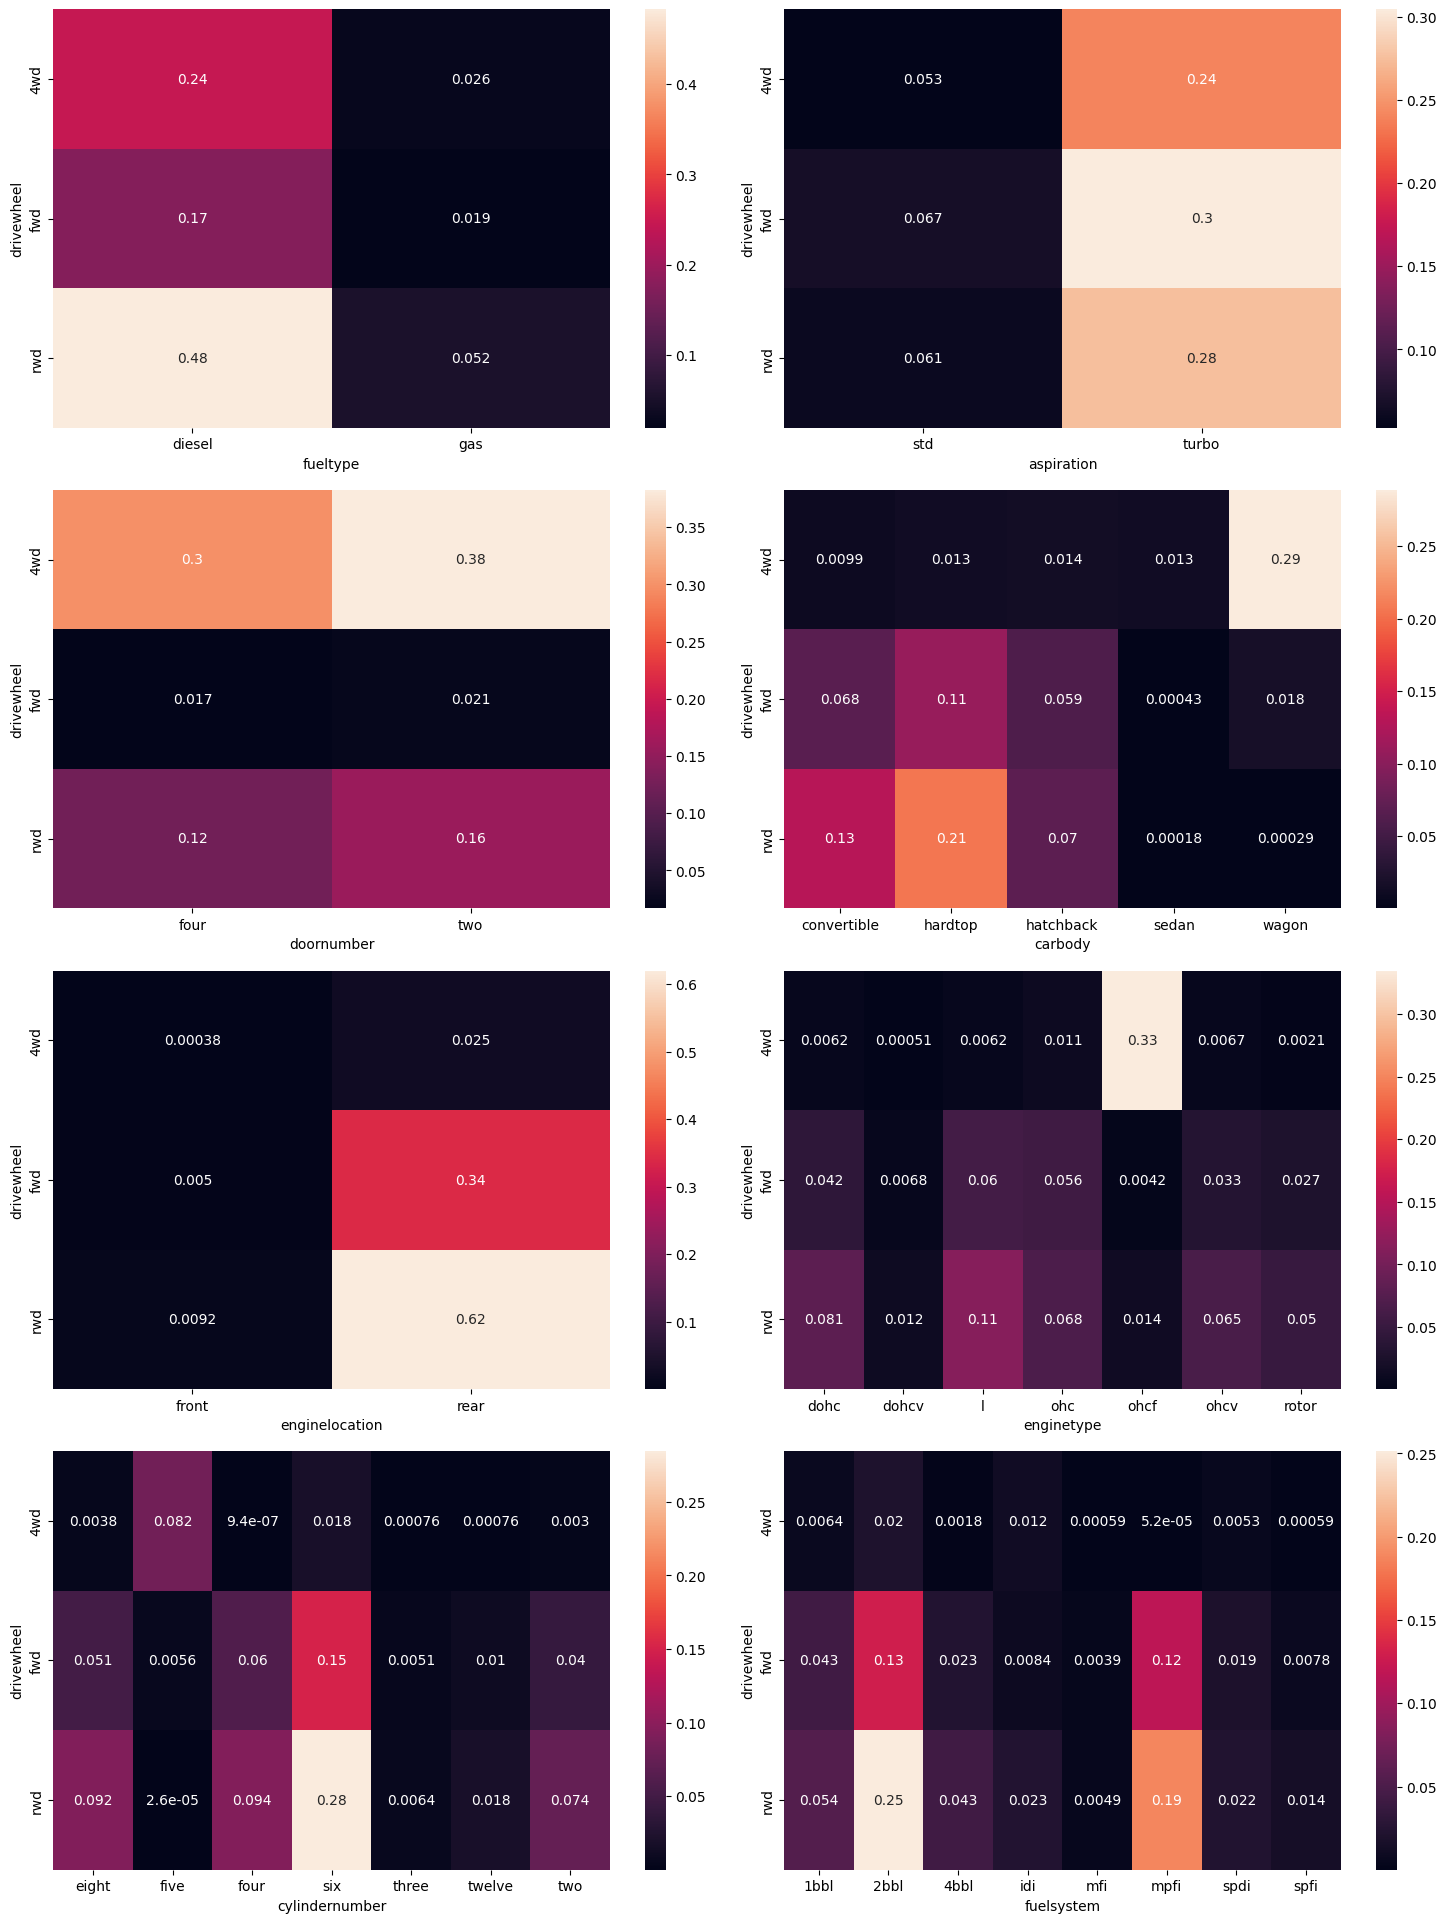



----------------------------------------------------------------------------------------------------




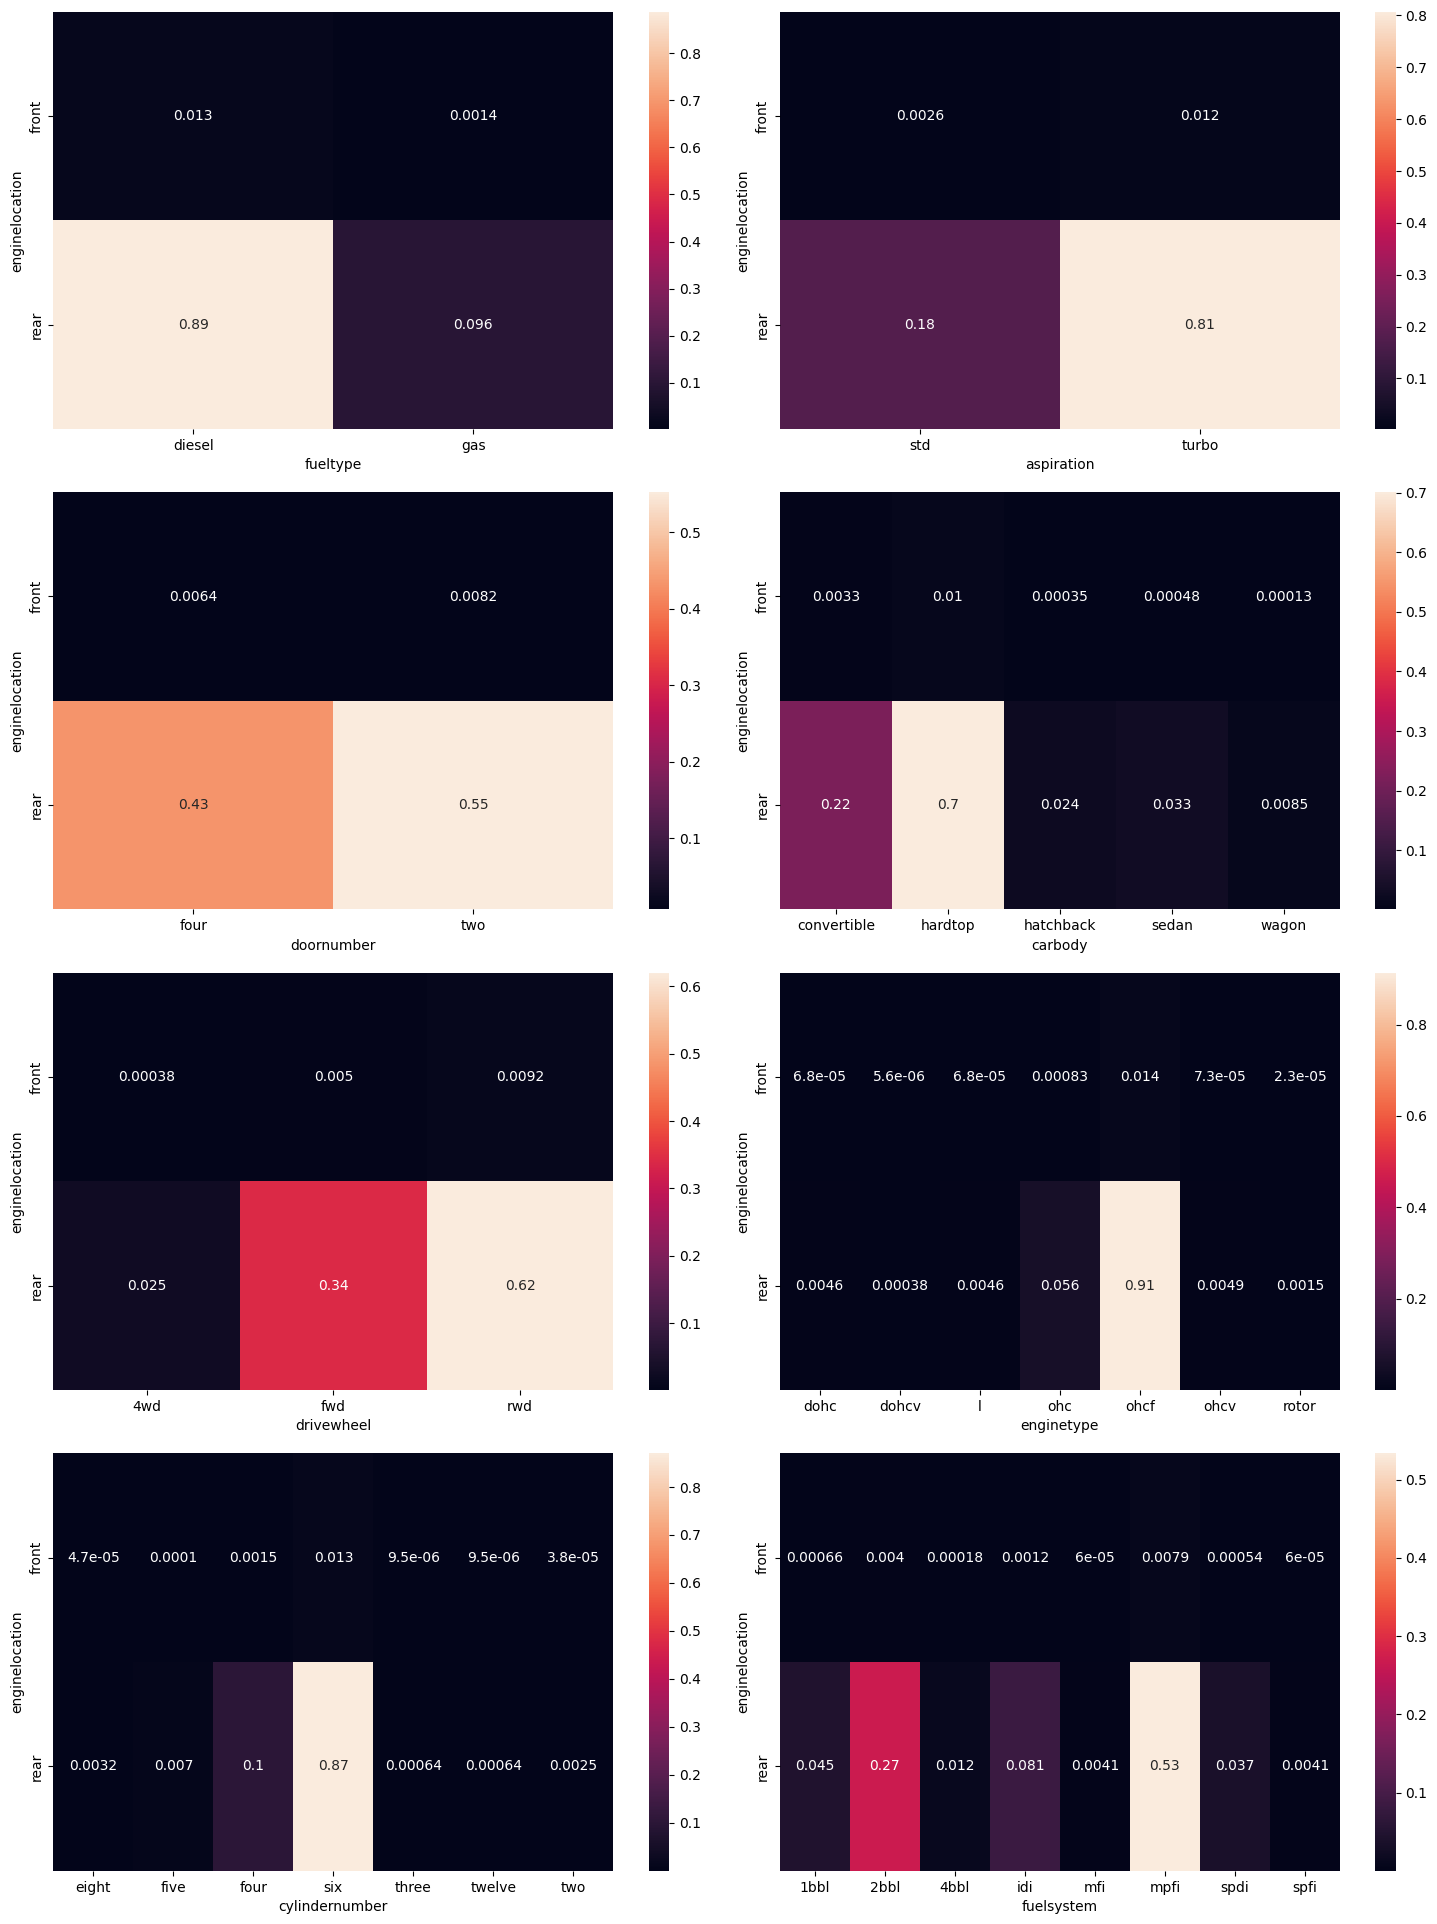



----------------------------------------------------------------------------------------------------




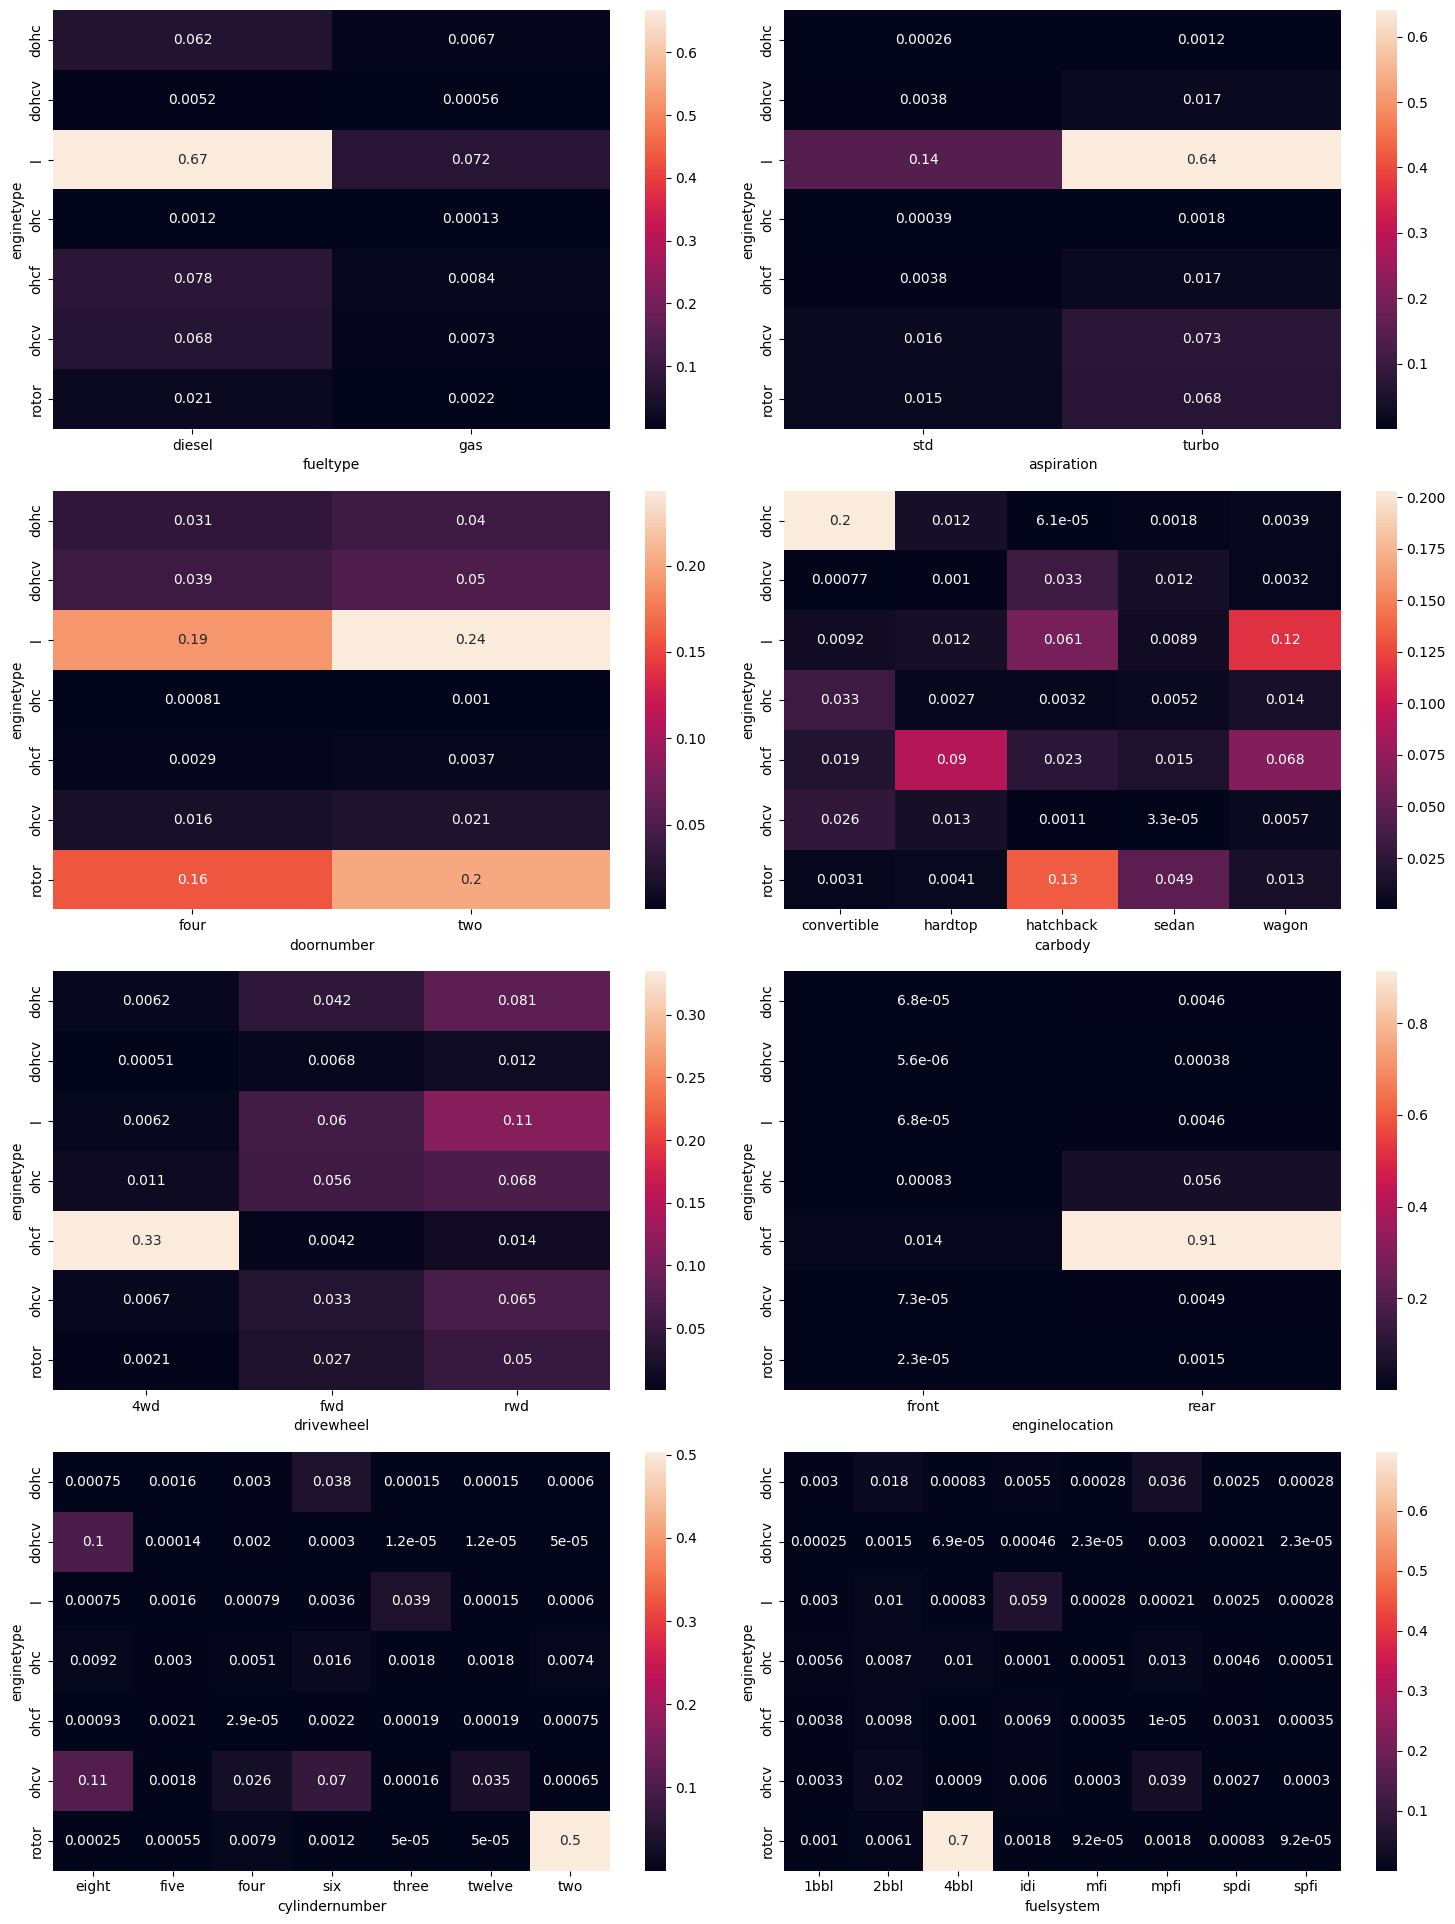



----------------------------------------------------------------------------------------------------




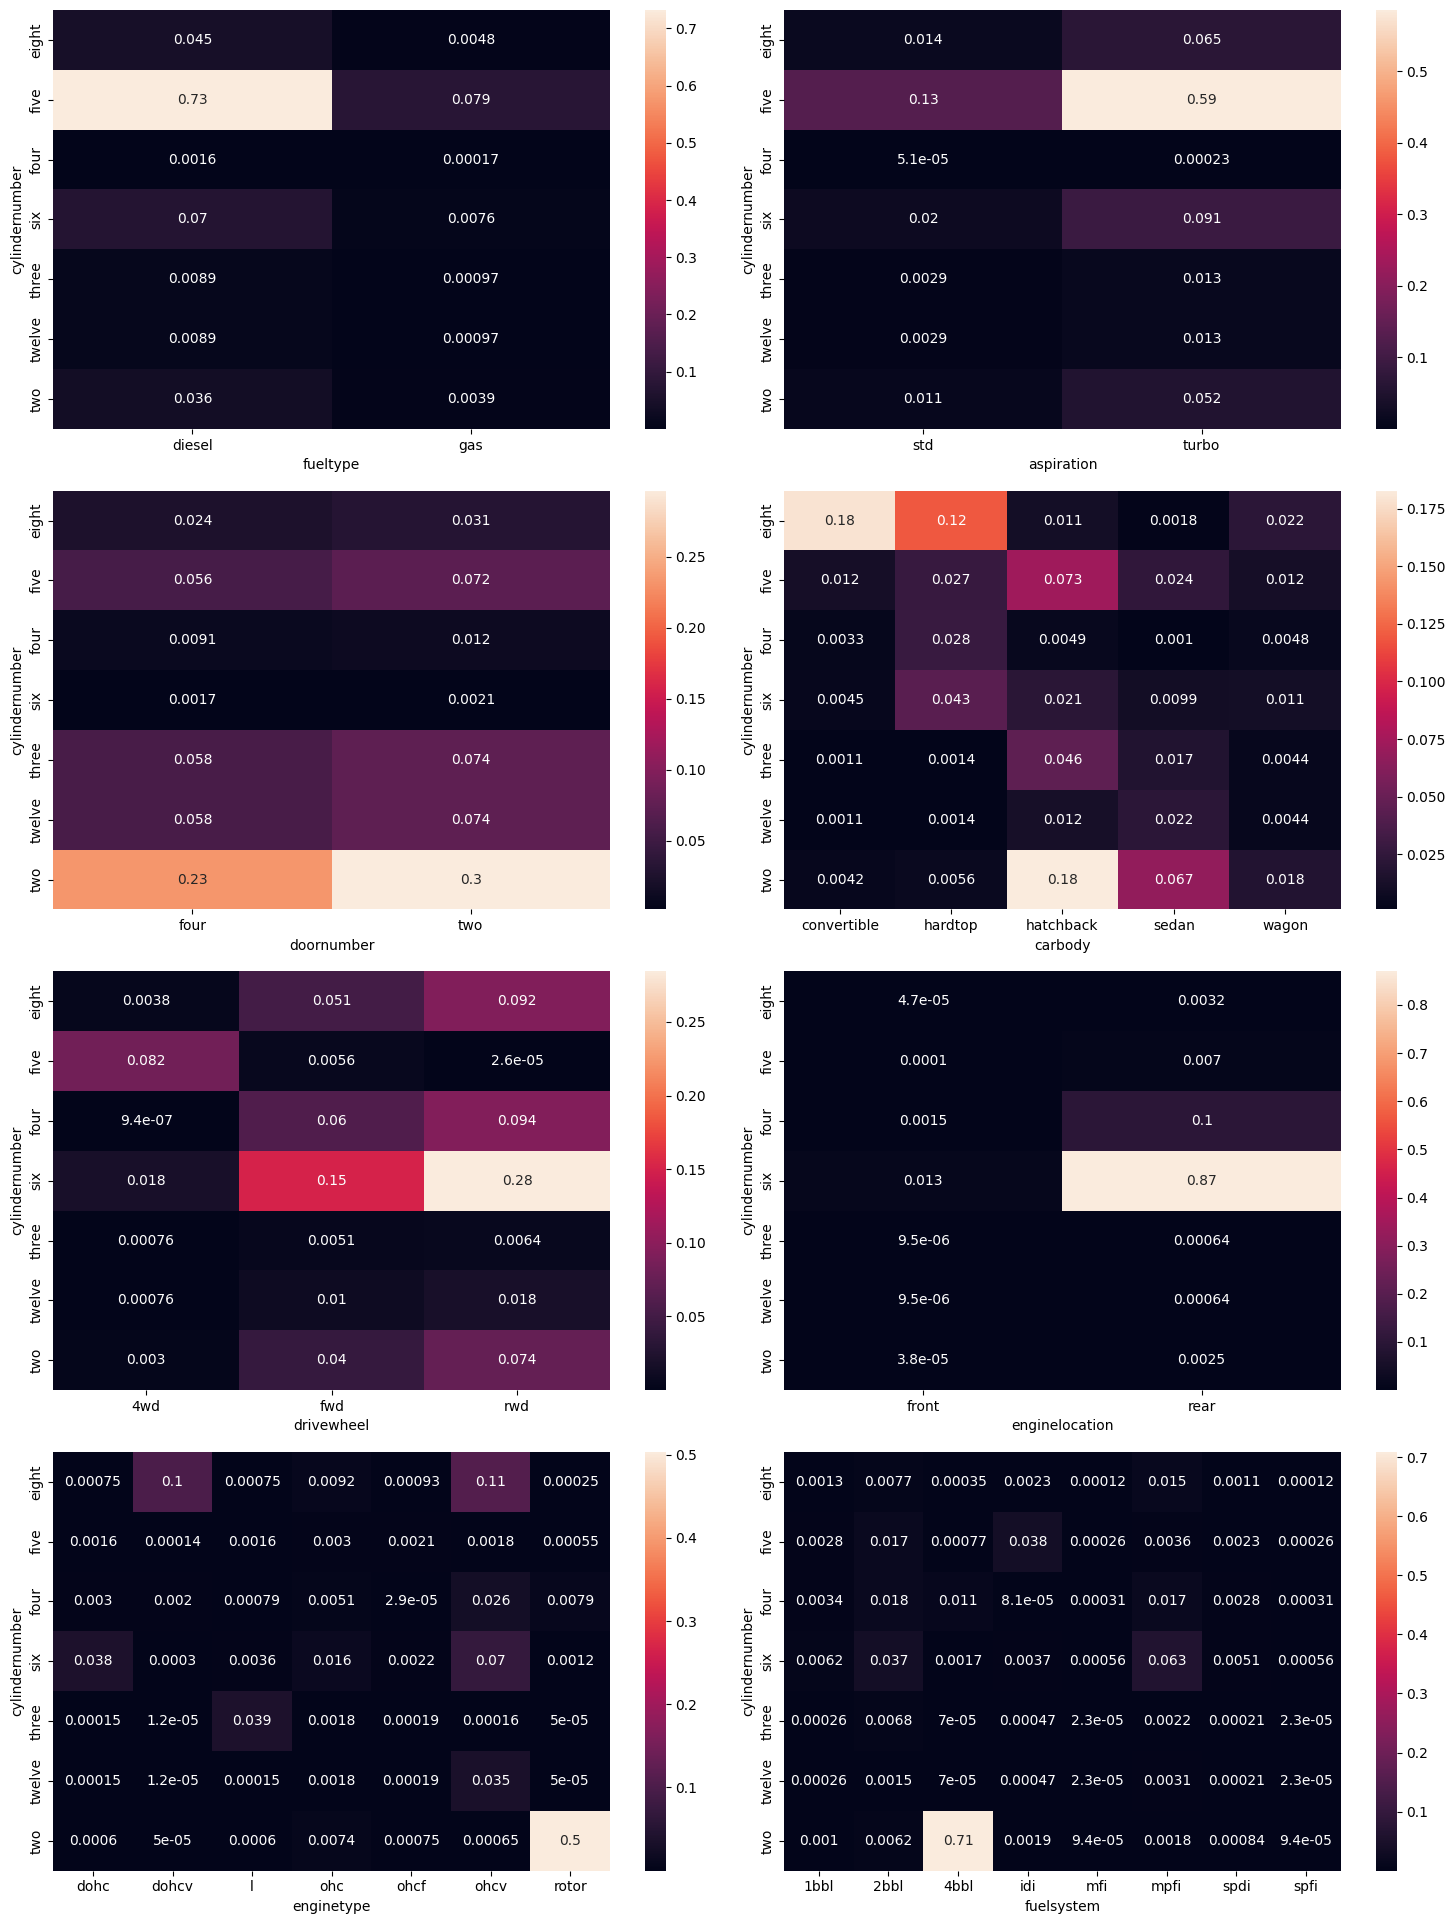



----------------------------------------------------------------------------------------------------




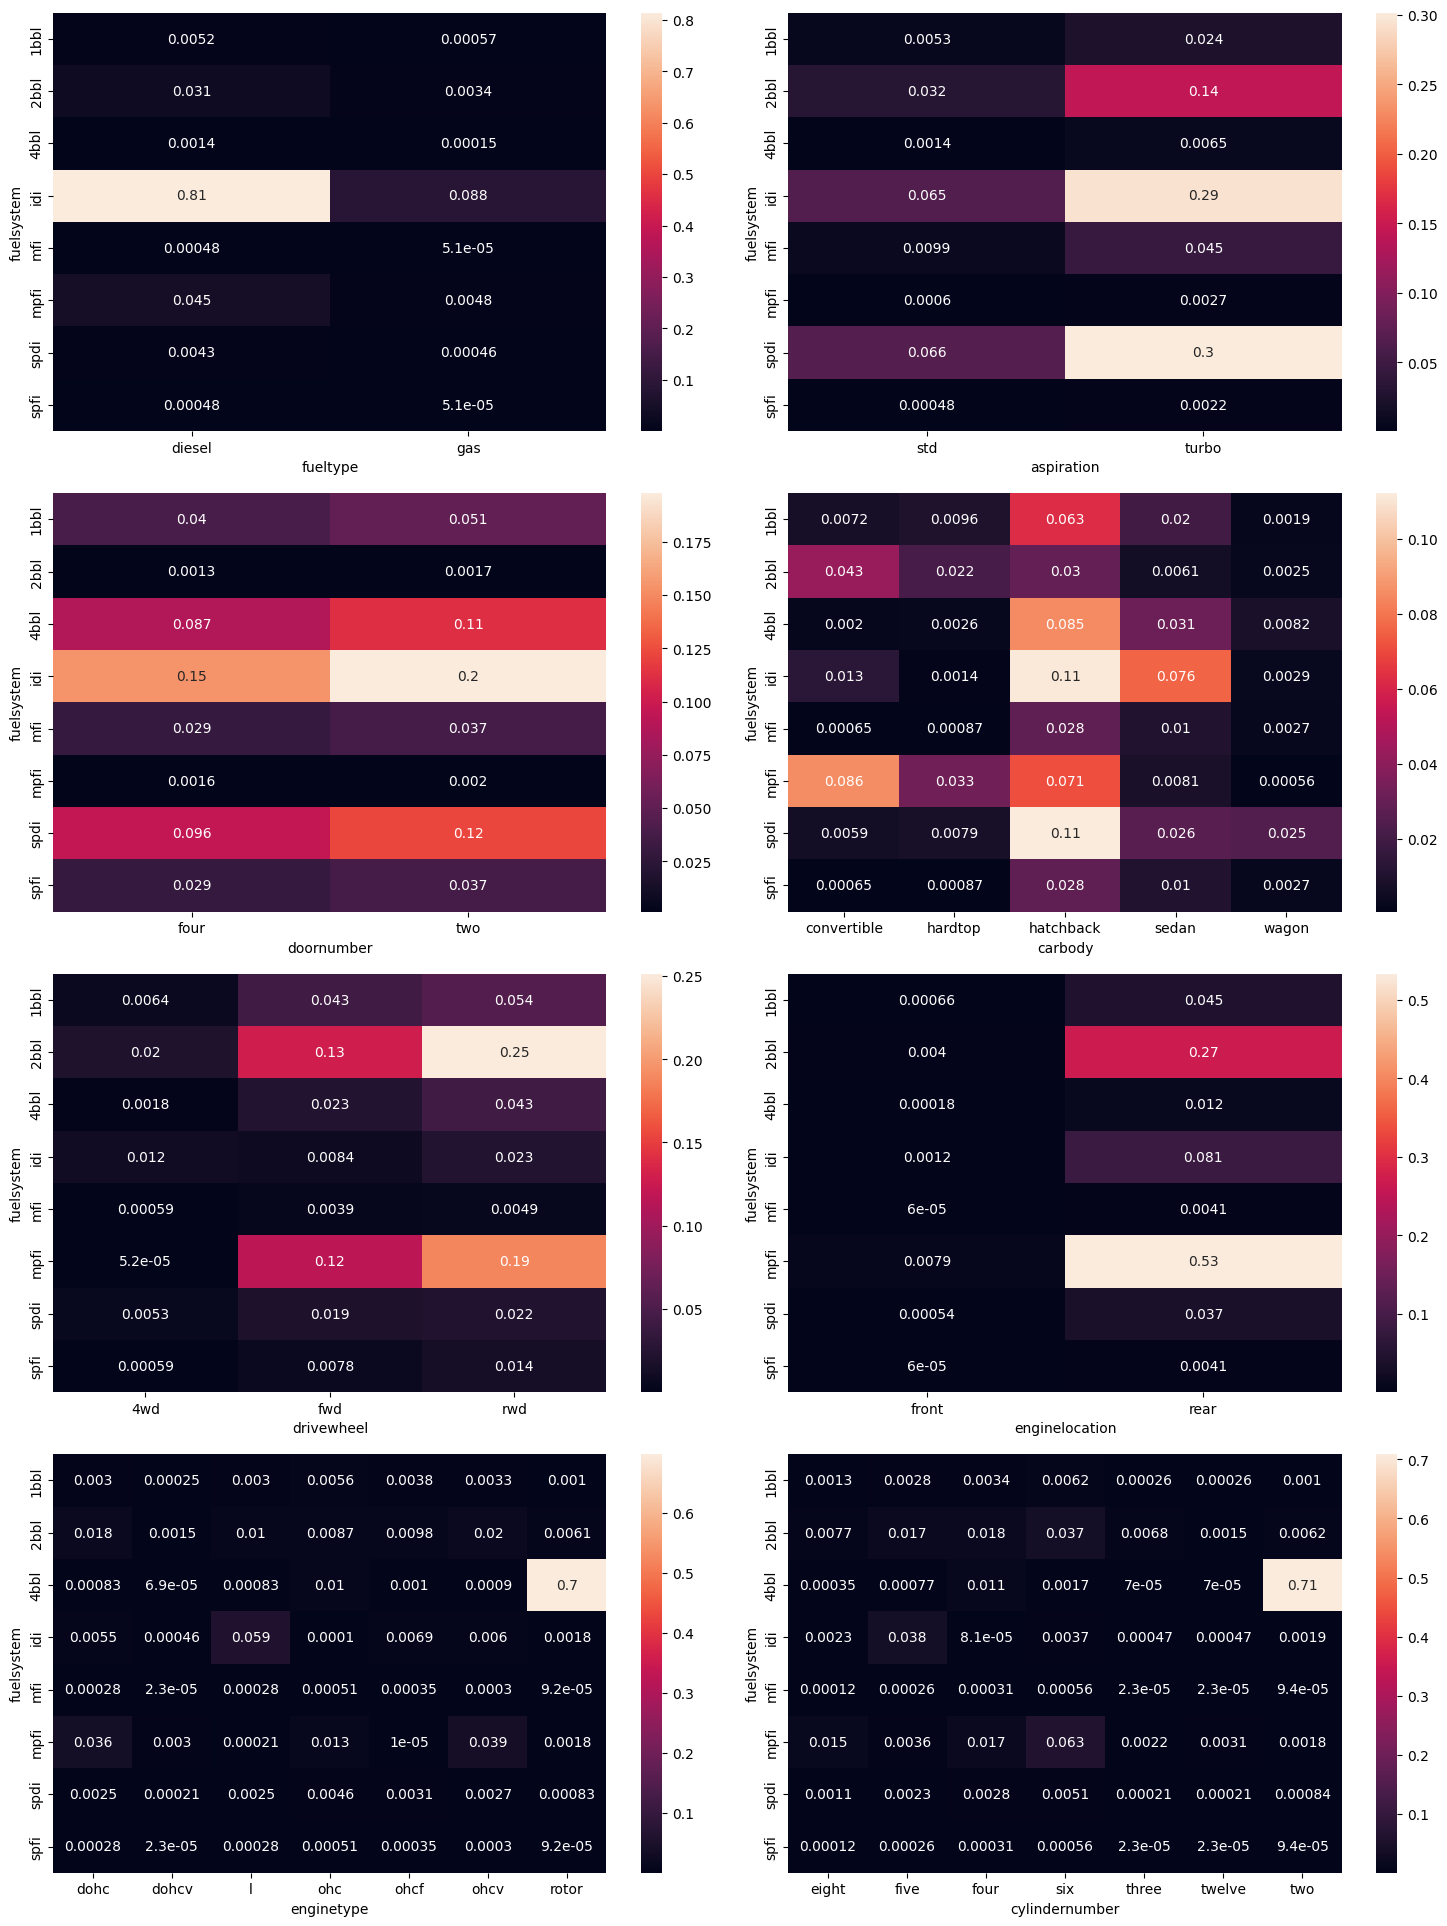



----------------------------------------------------------------------------------------------------




In [26]:
data.getHeatCorrelationCategorical(columns=variable_qualitatives, excludes=['CarName'])

<div class="alert alert-info" >On constate quelques corrélation entre les variables qualitatives. Avec plus de 75% de corrélation :
<ul>
    <li>fueltype diesel -> aspiration turbo</li>
<li>fueltype diesel -> enginelocation rear</li>
<li>fueltype diesel -> cylindernumber five</li>
<li>fueltype diesel -> fuelsystem idi</li>
<li>aspiration turbo -> enginelocation rear </li>
<li>enginelocation rear -> engintype ohcf</li>
<li>enginelocation rear -> cylindernumber six</li>
</ul></div>

## Preprocessing

Ajout de nouvelles variables:<br />
<ul>
    <li>"marque" qui la marque du véhicule</li>
    <li>"modele" qui représente le modèle du véhicule</li>
</ul>

In [27]:
import numpy as np

def replaceDoor(x):
    x = x.replace("two", "2")
    x = x.replace("four","4")
    return int(x)

def replaceCylinderNumber(x):
    x = x.replace("two", "2")
    x = x.replace("three", "3")
    x = x.replace("four","4")
    x = x.replace("five","5")
    x = x.replace("six","6")
    x = x.replace("eight","8")
    x = x.replace("twelve","12")    
    
    return int(x)

def getCountry(x):   
    if x in ["alfa-romero"]:
        return "italie"
    if x in ["audi", "bmw", "porsche", "porcshce", "vokswagen", "volkswagen", "vw"]:
        return "allemagne"
    if x in ["chevrolet", "dodge", "buick", "mercury"]:
        return "usa"
    if x in ["honda", "isuzu", "maxda", "mazda", "mitsubishi", "nissan","subaru", "toyota", "toyouta"]:
        return "japon"
    if x in ["jaguar", "plymouth"]:
        return "uk"
    if x in ["peugeot", "renault"]:
        return "france"
    if x in ["saab", "volvo"]:
        return "suede"
    return "unknown"

df1 = data.df.copy()
df1['marque'] = df1['CarName'].apply( lambda x: x.split(' ')[0].lower())
df1['modele'] = df1['CarName'].apply( lambda x: ' '.join(x.lower().split(' ')[1:]))
df1['doornumber'] = df1['doornumber'].apply( replaceDoor )
df1['cylindernumber'] = df1['cylindernumber'].apply( replaceCylinderNumber )

# Pour réduire le nombre de colonnes créée par le HOT-Encoding on utilise le pays du constructeur et non la marque ou le modèle
df1['country'] = df1['marque'].apply( getCountry )

df1['rapportPoidsPuissance'] = df1['horsepower'] / df1['curbweight']
df1['log_enginesize'] = np.log(df1['enginesize'] + 1)



df1 = df1.drop(['marque', 'modele', 'CarName'],axis=1)

w.remove_dataset('df1')
df1 = w.add_dataset('df1', df1)
df1.df.head()

car_ID  symboling fueltype aspiration  doornumber      carbody drivewheel  \
0       1          3      gas        std           2  convertible        rwd   
1       2          3      gas        std           2  convertible        rwd   
2       3          1      gas        std           2    hatchback        rwd   
3       4          2      gas        std           4        sedan        fwd   
4       5          2      gas        std           4        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc               4         130       mpfi       3.47    2.68   
1       dohc               4         130       mpfi       3.47    2.68   
2       ohcv               6         152       mpfi       2.68    3.47   
3        ohc               4         109       mpfi       3.19    3.40   
4        ohc               5         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

     country  rapportPoidsPuissance  log_enginesize  
0     italie               0.043564        4.875197  
1     italie               0.043564        4.875197  
2     italie               0.054552        5.030438  
3  allemagne               0.043646        4.700480  
4  allemagne               0.040722        4.919981

#### Encoder les variables qualitatives

In [28]:
# df1.df['country'].unique()
columns_to_hot = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'country']

In [29]:
df_encoded = df1.getCategoricalVariableEncoded(columns=columns_to_hot, excludes=[], encoder="one-hot")
df_encoded.head()

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0       1          3           2       88.6      168.8      64.1       48.8   
1       2          3           2       88.6      168.8      64.1       48.8   
2       3          1           2       94.5      171.2      65.5       52.4   
3       4          2           4       99.8      176.6      66.2       54.3   
4       5          2           4       99.4      176.6      66.4       54.3   

   curbweight  cylindernumber  enginesize  boreratio  stroke  \
0        2548               4         130       3.47    2.68   
1        2548               4         130       3.47    2.68   
2        2823               6         152       2.68    3.47   
3        2337               4         109       3.19    3.40   
4        2824               5         136       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

   rapportPoidsPuissance  log_enginesize  fueltype_diesel  fueltype_gas  \
0               0.043564        4.875197              0.0           1.0   
1               0.043564        4.875197              0.0           1.0   
2               0.054552        5.030438              0.0           1.0   
3               0.043646        4.700480              0.0           1.0   
4               0.040722        4.919981              0.0           1.0   

   aspiration_std  aspiration_turbo  carbody_convertible  carbody_hardtop  \
0             1.0               0.0                  1.0              0.0   
1             1.0               0.0                  1.0              0.0   
2             1.0               0.0                  0.0              0.0   
3             1.0               0.0                  0.0              0.0   
4             1.0               0.0                  0.0              0.0   

   carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_4wd  \
0                0.0            0.0            0.0             0.0   
1                0.0            0.0            0.0             0.0   
2                1.0            0.0            0.0             0.0   
3                0.0            1.0            0.0             0.0   
4                0.0            1.0            0.0             1.0   

   drivewheel_fwd  drivewheel_rwd  enginelocation_front  enginelocation_rear  \
0             0.0             1.0                   1.0                  0.0   
1             0.0             1.0                   1.0                  0.0   
2             0.0             1.0                   1.0                  0.0   
3             1.0             0.0                   1.0                  0.0   
4             0.0             0.0                   1.0                  0.0   

   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
0              1.0               0.0           0.0             0.0   
1              1.0               0.0           0.0             0.0   
2              0.0               0.0           0.0             0.0   
3              0.0               0.0           0.0             1.0   
4              0.0               0.0           0.0             1.0   

   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  fuelsystem_1bbl  \
0              0.0              0.0               0.0              0.0   
1              0.0              0.0               0.0              0.0   
2              0.0              1.0               0.0              0.0   
3              0.0              0.0               0.0              0.0   
4              0.0              0.0               0.0              0.0   

   fuelsystem_2b

In [30]:
w.remove_dataset('df_clean')
df_clean = w.add_dataset('df_clean', df_encoded)
df_clean.df.head()

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0       1          3           2       88.6      168.8      64.1       48.8   
1       2          3           2       88.6      168.8      64.1       48.8   
2       3          1           2       94.5      171.2      65.5       52.4   
3       4          2           4       99.8      176.6      66.2       54.3   
4       5          2           4       99.4      176.6      66.4       54.3   

   curbweight  cylindernumber  enginesize  boreratio  stroke  \
0        2548               4         130       3.47    2.68   
1        2548               4         130       3.47    2.68   
2        2823               6         152       2.68    3.47   
3        2337               4         109       3.19    3.40   
4        2824               5         136       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

   rapportPoidsPuissance  log_enginesize  fueltype_diesel  fueltype_gas  \
0               0.043564        4.875197              0.0           1.0   
1               0.043564        4.875197              0.0           1.0   
2               0.054552        5.030438              0.0           1.0   
3               0.043646        4.700480              0.0           1.0   
4               0.040722        4.919981              0.0           1.0   

   aspiration_std  aspiration_turbo  carbody_convertible  carbody_hardtop  \
0             1.0               0.0                  1.0              0.0   
1             1.0               0.0                  1.0              0.0   
2             1.0               0.0                  0.0              0.0   
3             1.0               0.0                  0.0              0.0   
4             1.0               0.0                  0.0              0.0   

   carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_4wd  \
0                0.0            0.0            0.0             0.0   
1                0.0            0.0            0.0             0.0   
2                1.0            0.0            0.0             0.0   
3                0.0            1.0            0.0             0.0   
4                0.0            1.0            0.0             1.0   

   drivewheel_fwd  drivewheel_rwd  enginelocation_front  enginelocation_rear  \
0             0.0             1.0                   1.0                  0.0   
1             0.0             1.0                   1.0                  0.0   
2             0.0             1.0                   1.0                  0.0   
3             1.0             0.0                   1.0                  0.0   
4             0.0             0.0                   1.0                  0.0   

   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
0              1.0               0.0           0.0             0.0   
1              1.0               0.0           0.0             0.0   
2              0.0               0.0           0.0             0.0   
3              0.0               0.0           0.0             1.0   
4              0.0               0.0           0.0             1.0   

   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  fuelsystem_1bbl  \
0              0.0              0.0               0.0              0.0   
1              0.0              0.0               0.0              0.0   
2              0.0              1.0               0.0              0.0   
3              0.0              0.0               0.0              0.0   
4              0.0              0.0               0.0              0.0   

   fuelsystem_2b

### Création des Trainset, Validationset et Testset

In [31]:
X_train, y_train, X_val, y_val, X_test, y_test = df_clean.split(target[0], verbose=1)

Ratio : size_train=0.6, size_val=0.15, size_test=0.25
Shape Trainset => X : (123, 55) y : (123,)
Shape Valset => X : (30, 55) y : (30,)
Shape Testset => X : (52, 55) y : (52,)


### Création d'un modèle de base

In [32]:
pipeline = nnz.make_pipeline(nnz.StandardScaler(), nnz.LinearRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### Evaluation du modèle de base

Evaluation sur le Validation Set

R2: 0.8428359163093844
MSE: 5209550.390828699
RMSE: 2282.4439513006005
MAE: 1877.1011673754904
Spearman: 0.818020022246941
Pearson: 0.9185716369204243
Variance: 0.8428431196582594
Score: 0.8428359163093844


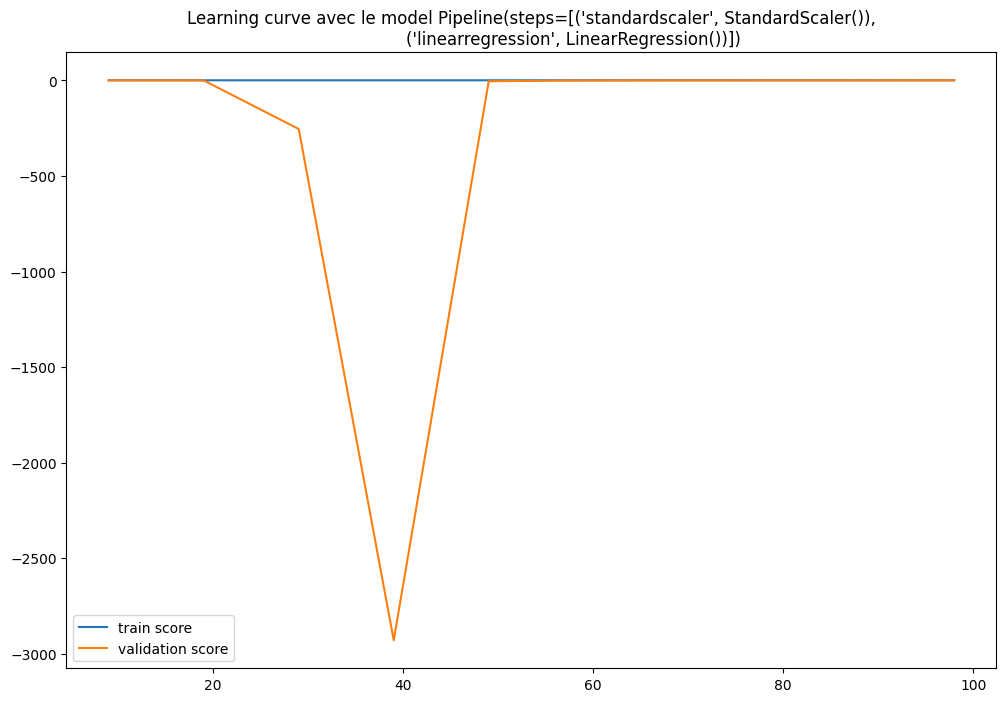

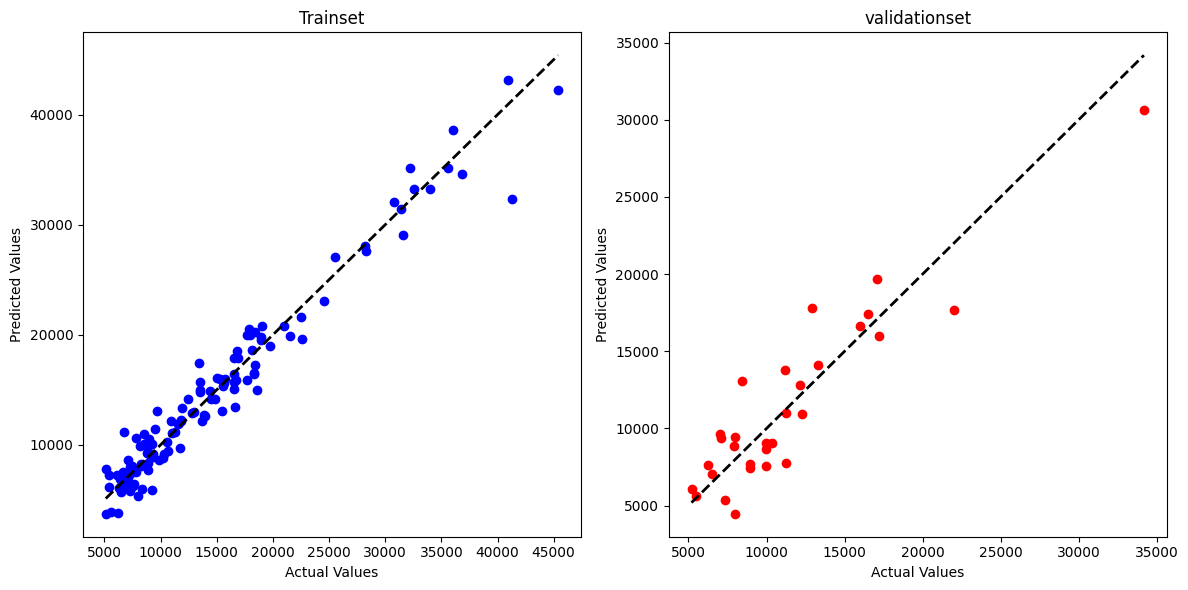

In [33]:
print("Evaluation sur le Validation Set\n")
y_pred = pipeline.predict(X_val)
w.evaluateRegression(pipeline, X_val, y_val, y_pred)
w.learning_curve(pipeline, X_train, y_train)
w.showGraphPrediction([ [ y_train, pipeline.predict(X_train), "blue", "Trainset" ], [y_val, y_pred, "red", "validationset"] ])

#### Test du modèle de base sur des données inconnues

Evaluation sur le Test Set

R2: 0.8833320334967212
MSE: 4850525.815556831
RMSE: 2202.3909315915807
MAE: 1632.1046699806648
Spearman: 0.8510992537104152
Pearson: 0.940179566726859
Variance: 0.8833694934234227
Score: 0.8833320334967212


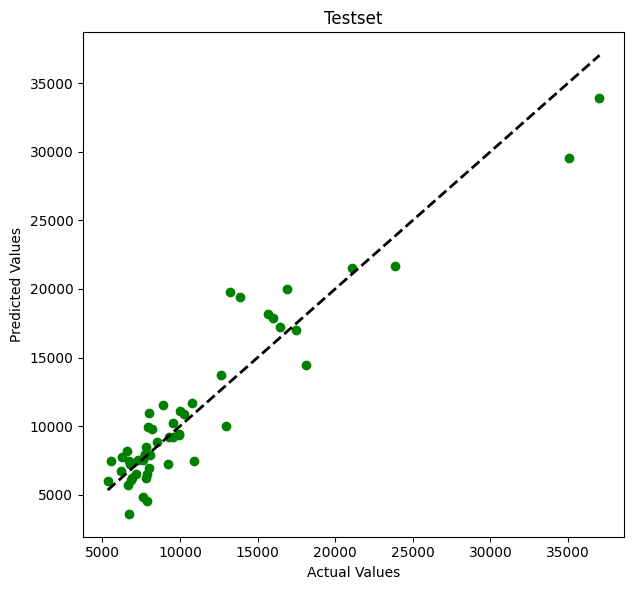

In [34]:
print("Evaluation sur le Test Set\n")
y_pred = pipeline.predict(X_test)
w.evaluateRegression(pipeline, X_test, y_test, y_pred)
w.showGraphPrediction([ [ y_test, y_pred, "green", "Testset"] ])

#### Recherche du meilleur modèle

Pour rappel nous avons obtenu le score de <b>88%</b> avec une Régression Linaire.

[*] - Model : linear
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[*] - Saving grid result to ./runtime/results_grid_csv_linear.csv


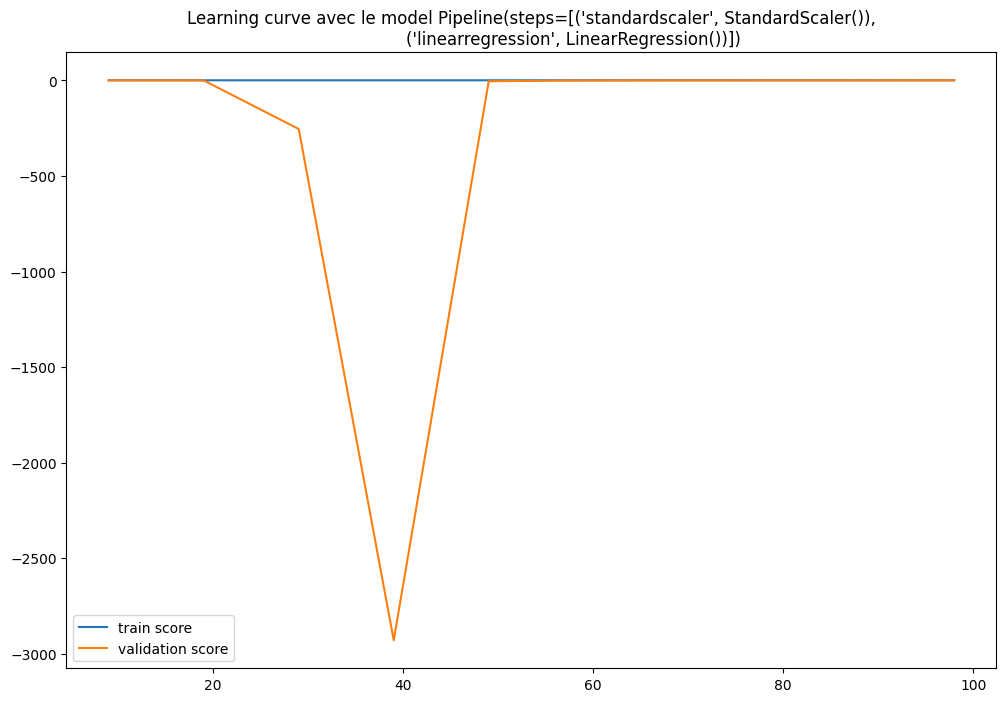



[*] - Model : random_forest
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=23))])
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[*] - Saving grid result to ./runtime/results_grid_csv_random_forest.csv


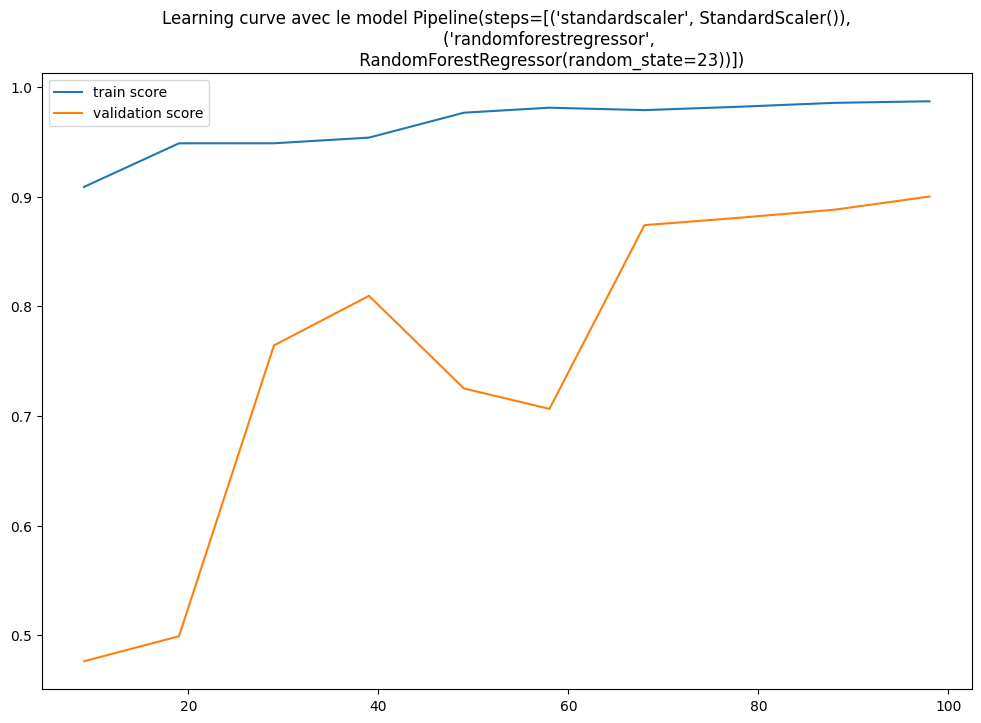



[*] - Model : gradient_boosting
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=23))])
Fitting 5 folds for each of 160 candidates, totalling 800 fits
[*] - Saving grid result to ./runtime/results_grid_csv_gradient_boosting.csv


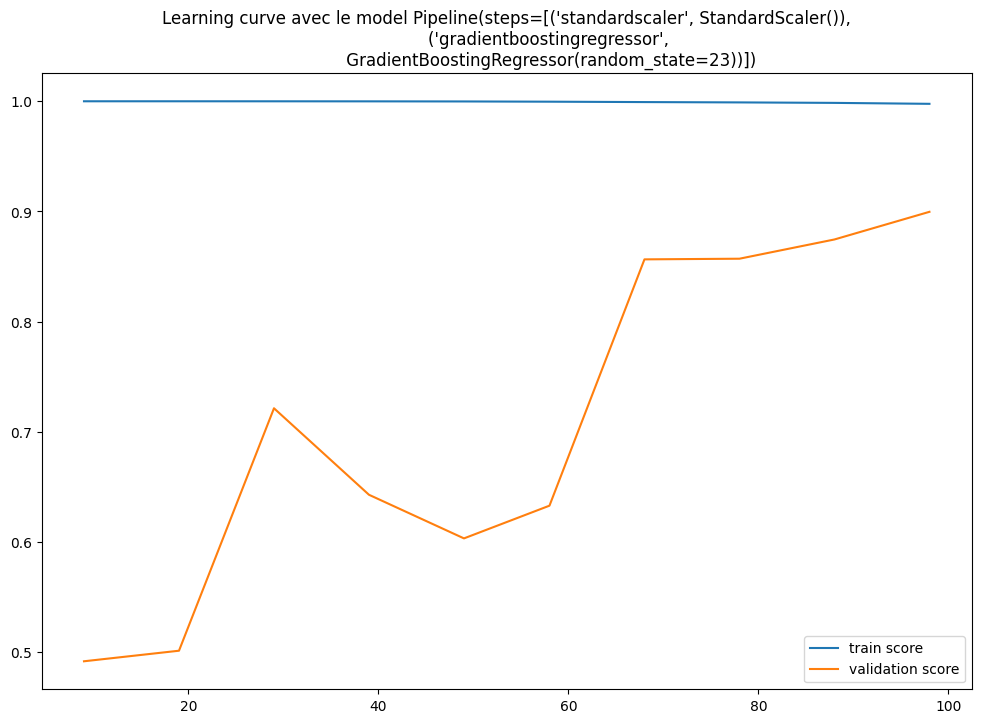



[*] - Model : xgb
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, 

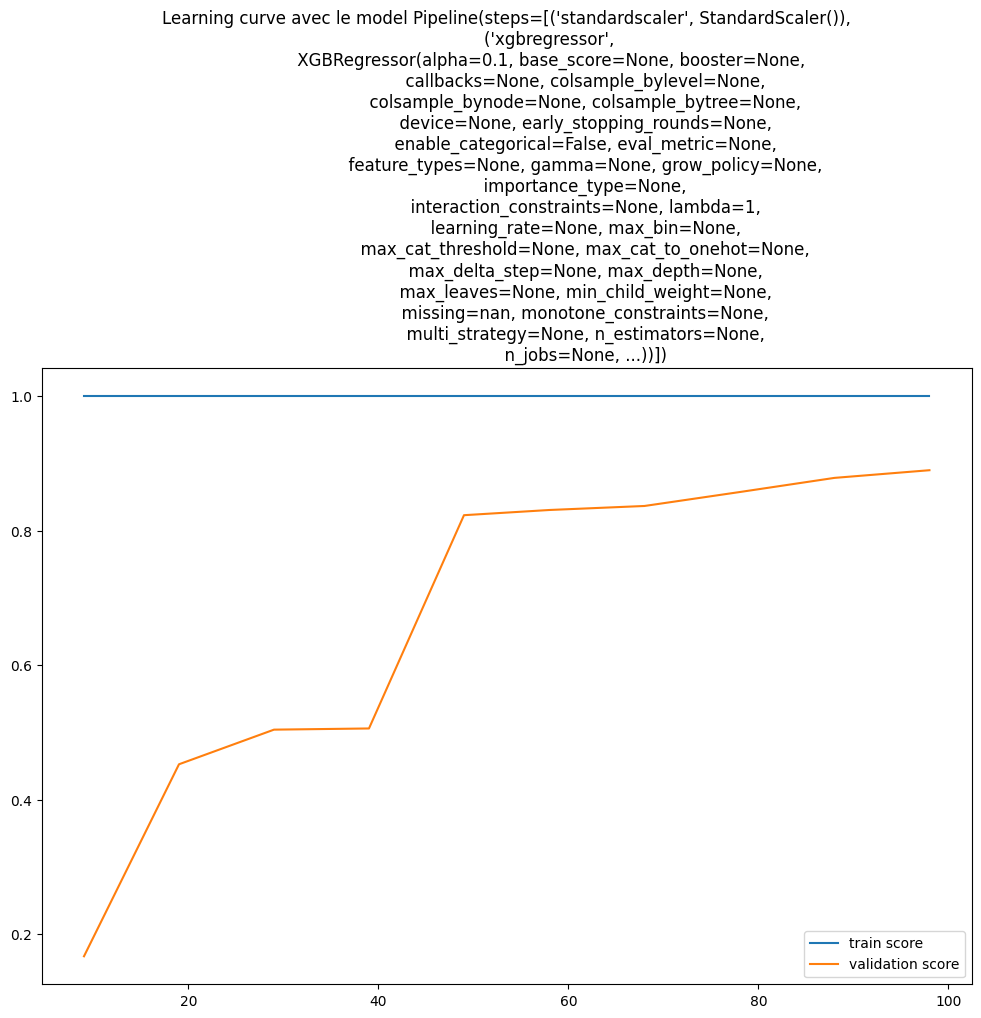



[*] - Model : svr
Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[*] - Saving grid result to ./runtime/results_grid_csv_svr.csv


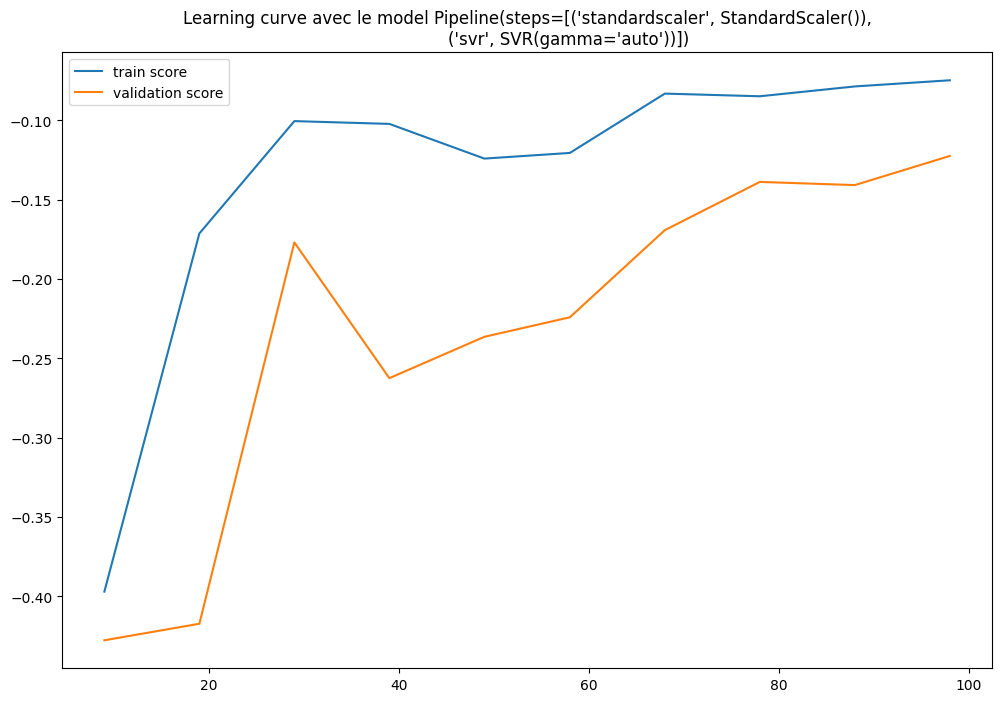



[*] - Done.
[*] - Saving model to ./runtime/best_model_22_05_2024_09_26_11.model


model  best_score  \
1      random_forest    0.900791   
2  gradient_boosting    0.899486   
3                xgb    0.883225   
0             linear    0.792295   
4                svr   -0.123392   

                                                                                                                                                                                                     best_params  
1                                                                                                                                                                   {'randomforestregressor__n_estimators': 100}  
2  {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__loss': 'squared_error', 'gradientboostingregressor__n_estimators': 100}  
3                                                                                                                                                        {'xgbregressor__alpha': 0.1, 'xgbregressor__lambda': 1}  
0                                                                                                                                                                          {'linearregression__positive': False}  
4                                                                                                                                                                    {'svr__epsilon': 0.1, 'svr__gamma': 'auto'}

In [35]:
rs = 23
model_params = {
    'linear': {
        'model': nnz.LinearRegression(),
        'params' : {
            'linearregression__positive': [True,False]
        },
        "show_learning_curve" : True
    },
    'random_forest': {
        'model': nnz.RandomForestRegressor(random_state=rs),
        'params' : {
            'randomforestregressor__n_estimators': [1,5,10,20,100]
        },
        "show_learning_curve" : True
    },
    'gradient_boosting' : {
        'model': nnz.GradientBoostingRegressor(random_state=rs),
        'params': {
            'gradientboostingregressor__loss' : ['squared_error','absolute_error','huber','quantile'],
            'gradientboostingregressor__learning_rate' : [0.1, 0.01, 0.001, 0.0001 ],
            'gradientboostingregressor__n_estimators': [1,5,10,20,100],
            'gradientboostingregressor__criterion' : ['friedman_mse','squared_error']
        },
        "show_learning_curve" : True
    },
    'xgb' : {
        'model': nnz.XGBRegressor(random_state=rs),
        'params': {
            'xgbregressor__lambda' : [0,0.1,0.5,1,1.5,2],
            'xgbregressor__alpha' : [0.1, 0.01, 0.001, 0.0001 ],
        },
        "show_learning_curve" : True
    },
    'svr' : {
        'model': nnz.SVR(),
        'params': {
            # 'kernel' : ['linear','poly', 'rbf', 'sigmoid', 'precomputed'],
            'svr__gamma': ['scale', 'auto'],
            'svr__epsilon' : [0.1,0.01,0.001,0.0001]
        },
        "show_learning_curve" : True
    }
}
pipeline = [nnz.StandardScaler()]

path_model, best_model, df_scores = w.getBestModel(pipeline, model_params, X_train, y_train, verbose=1)
df_scores

In [36]:
print("Evaluation sur le Test Set\n")
best_model = w.loadModel(path_model)
y_pred = best_model.predict(X_test)
w.evaluateRegression(best_model, X_test, y_test, y_pred)

Evaluation sur le Test Set

R2: 0.9387559839657205
MSE: 2546248.895272384
RMSE: 1595.6969935650013
MAE: 1118.3009925000001
Spearman: 0.9468089656439431
Pearson: 0.9728118943098507
Variance: 0.9397239356421967
Score: 0.9387559839657205


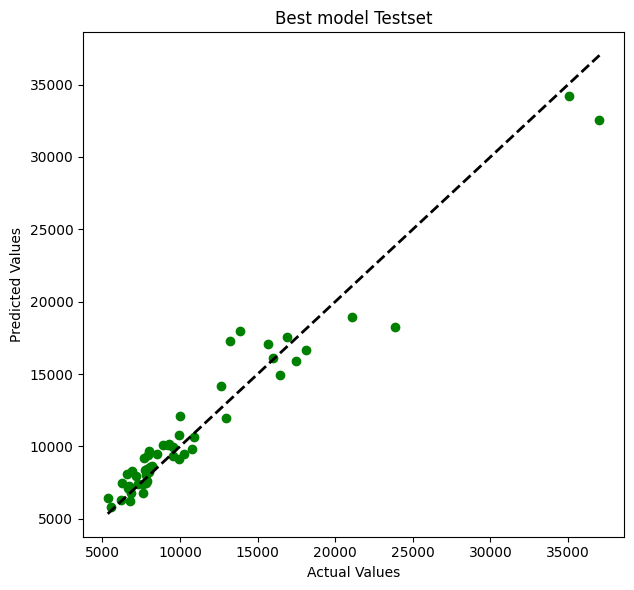

In [37]:
w.showGraphPrediction([ [ y_test, y_pred, "green", "Best model Testset"] ])

Le modèle <b>random_forest</b> permet donc d'obtenir un score de <b>94%</b>.